In [1]:
import koreanize_matplotlib # To visualize Korean in plot
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns

# Load preprocessed dataset

In [2]:
df_eda = pd.read_csv("df_eda.csv")

# EDA

### EDA : structure of the dataframe

In [3]:
df_eda.columns

Index(['prod', 'insp', 'date', 'buydate', 'ingr_A', 'ingr_B', 'ingr_C', 'wtcd',
       'gram', 'origin', 'label', 'A_P', 'B_P', 'C_P', 'ingr_extra', 'extra_P',
       'duration', 'date_month', 'buydate_month', 'buydate_season',
       'buydate_year'],
      dtype='object')

In [4]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   prod            9989 non-null   object 
 1   insp            9989 non-null   object 
 2   date            9989 non-null   object 
 3   buydate         9989 non-null   object 
 4   ingr_A          9989 non-null   float64
 5   ingr_B          9989 non-null   float64
 6   ingr_C          9989 non-null   float64
 7   wtcd            9989 non-null   object 
 8   gram            9989 non-null   float64
 9   origin          9989 non-null   object 
 10  label           9989 non-null   int64  
 11  A_P             9989 non-null   float64
 12  B_P             9989 non-null   float64
 13  C_P             9989 non-null   float64
 14  ingr_extra      9989 non-null   float64
 15  extra_P         9989 non-null   float64
 16  duration        9989 non-null   int64  
 17  date_month      9989 non-null   i

##### Imbalanced Dataset

In [5]:
df_eda['label'].value_counts()

label
0    7781
1    2208
Name: count, dtype: int64

##### insp : inspector ID (5 inspectors)

In [6]:
df_eda['insp'].value_counts()

insp
L    3021
C    2491
K    2440
Y    1538
P     499
Name: count, dtype: int64

##### date & buydate : Date of inspection & purchase

In [7]:
print('Inspection Date Range :', df_eda['date'].min(), '~', df_eda['date'].max())
print('Purchase Date Range :', df_eda['buydate'].min(), '~', df_eda['buydate'].max())

Inspection Date Range : 2023-04-01 ~ 2023-06-29
Purchase Date Range : 2023-04-02 ~ 2024-08-29


##### wtcd : water code (water supply source)

In [8]:
df_eda['wtcd'].value_counts()

wtcd
F3    6851
F2    2170
F1     968
Name: count, dtype: int64

### EDA : focus on 'prod' 

In [9]:
prod_count = df_eda['prod'].value_counts()
prod_count

prod
KCMD    5474
JJBB    2137
GBMD    1792
GGMD     586
Name: count, dtype: int64

##### Each product has different count/ratio of defection
- Count : KCMD > JJBB > GBMD > GGMD
- Ratio : GGMD > GBMD > KCMD > JJBB

In [10]:
prod_defect_count = df_eda.groupby('prod')['label'].sum()
prod_defect_count

prod
GBMD     400
GGMD     137
JJBB     464
KCMD    1207
Name: label, dtype: int64

In [11]:
prod_label_ratio = df_eda.groupby('prod')['label'].mean()
prod_label_ratio

prod
GBMD    0.223214
GGMD    0.233788
JJBB    0.217127
KCMD    0.220497
Name: label, dtype: float64

##### The products' ratio of ingredients per each
    - GBMD : nearly 2/3 is consisted of extra ingr
    - GGMD : mostly consisted of extra ingr
    - KCMD : it consists of extra & A ingr mostly (56% + 41%)
    - JJBB : mostly consisted of extra_ingr

In [12]:
prod_means = df_eda.groupby('prod')[['A_P', 'B_P', 'C_P', 'extra_P']].mean()
prod_means

A_P       B_P       C_P   extra_P
prod                                        
GBMD  0.307794  0.007372  0.007276  0.677558
GGMD  0.106365  0.002403  0.002396  0.888836
JJBB  0.142769  0.003275  0.003233  0.850723
KCMD  0.413704  0.009959  0.009795  0.566541

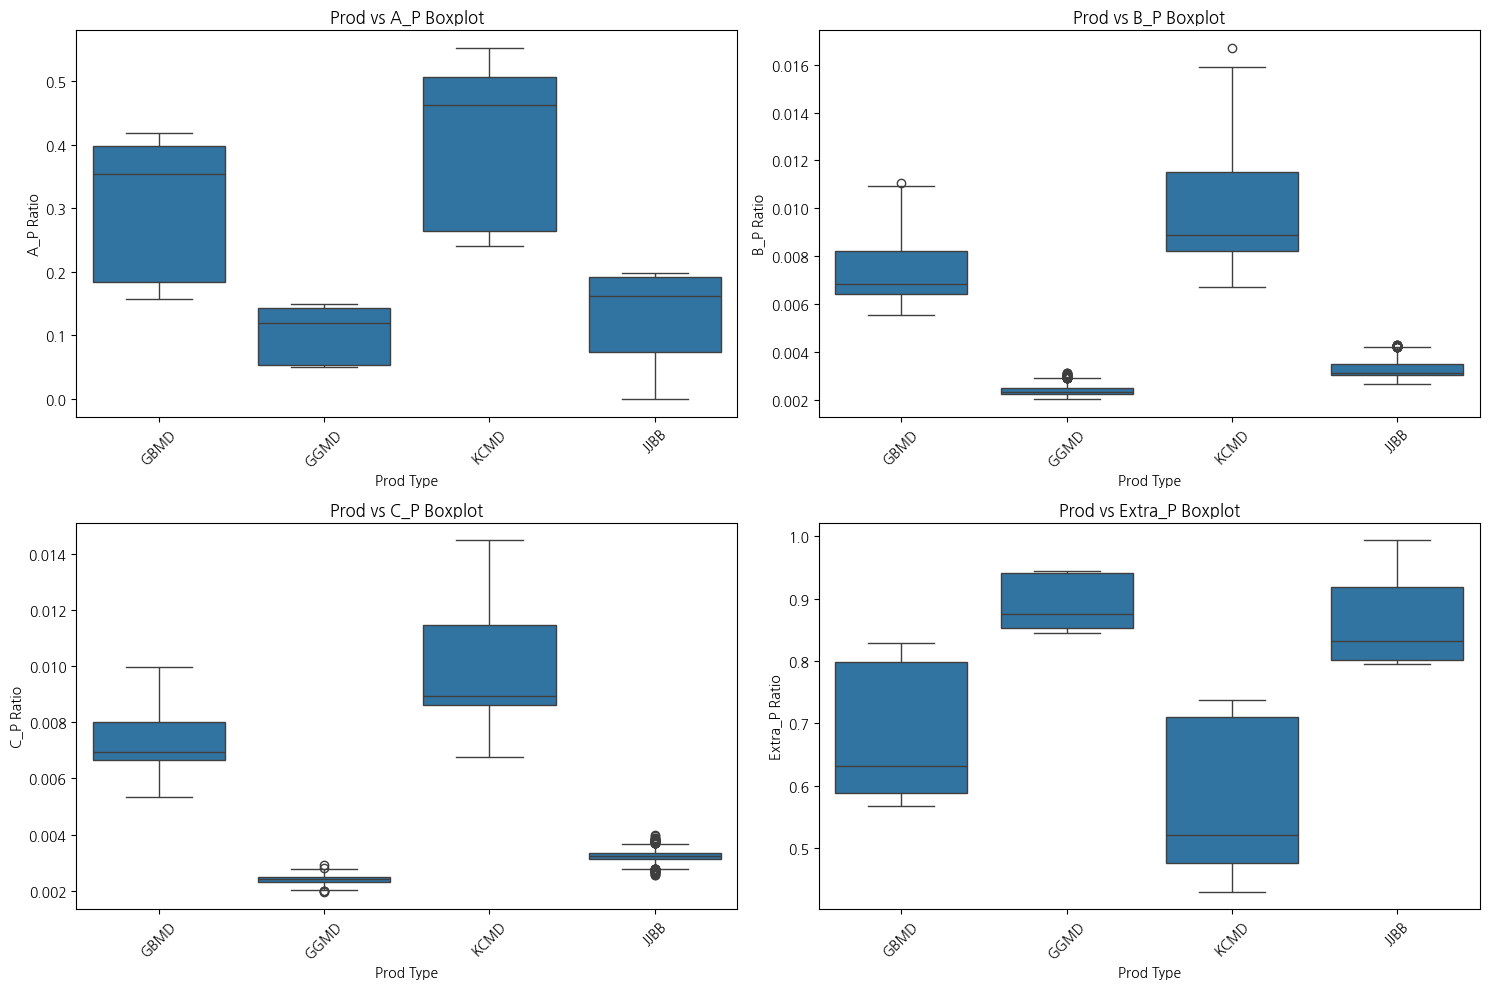

In [13]:
plt.figure(figsize=(15, 10))

# A_P boxplot
plt.subplot(2, 2, 1)
sns.boxplot(x='prod', y='A_P', data=df_eda)
plt.title('Prod vs A_P Boxplot')
plt.xlabel('Prod Type')
plt.ylabel('A_P Ratio')
plt.xticks(rotation=45)

# B_P boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x='prod', y='B_P', data=df_eda)
plt.title('Prod vs B_P Boxplot')
plt.xlabel('Prod Type')
plt.ylabel('B_P Ratio')
plt.xticks(rotation=45)

# C_P boxplot
plt.subplot(2, 2, 3)
sns.boxplot(x='prod', y='C_P', data=df_eda)
plt.title('Prod vs C_P Boxplot')
plt.xlabel('Prod Type')
plt.ylabel('C_P Ratio')
plt.xticks(rotation=45)

# extra_P boxplot
plt.subplot(2, 2, 4)
sns.boxplot(x='prod', y='extra_P', data=df_eda)
plt.title('Prod vs Extra_P Boxplot')
plt.xlabel('Prod Type')
plt.ylabel('Extra_P Ratio')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


##### There is no specific preference of the product to customers
    - The 'duration' is similar for each product

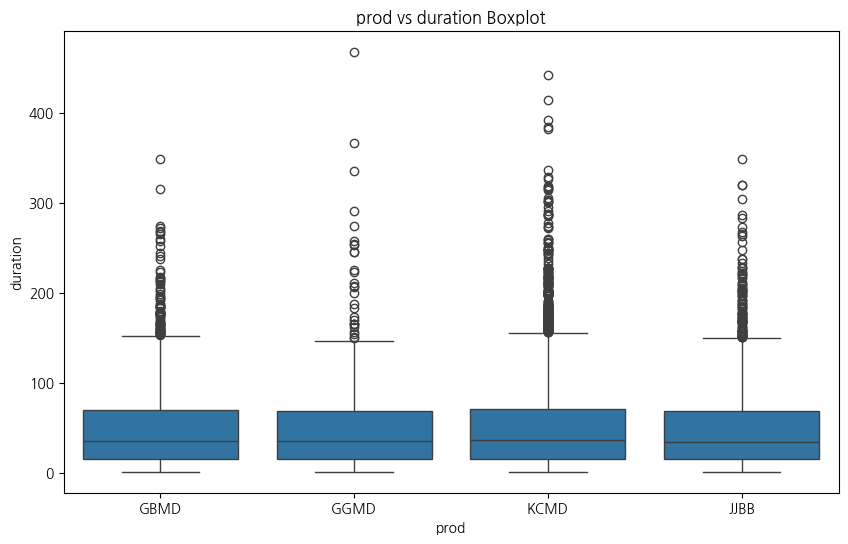

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='prod', y='duration', data=df_eda)
plt.title('prod vs duration Boxplot')
plt.show()

##### Can observe that location might cause defection
- Big portion of the product JJBB, with the second biggest defection count, is produced in '수성'
- Great portion of the product GGMD, with the biggest defection rate, is produced in 2 particular locations

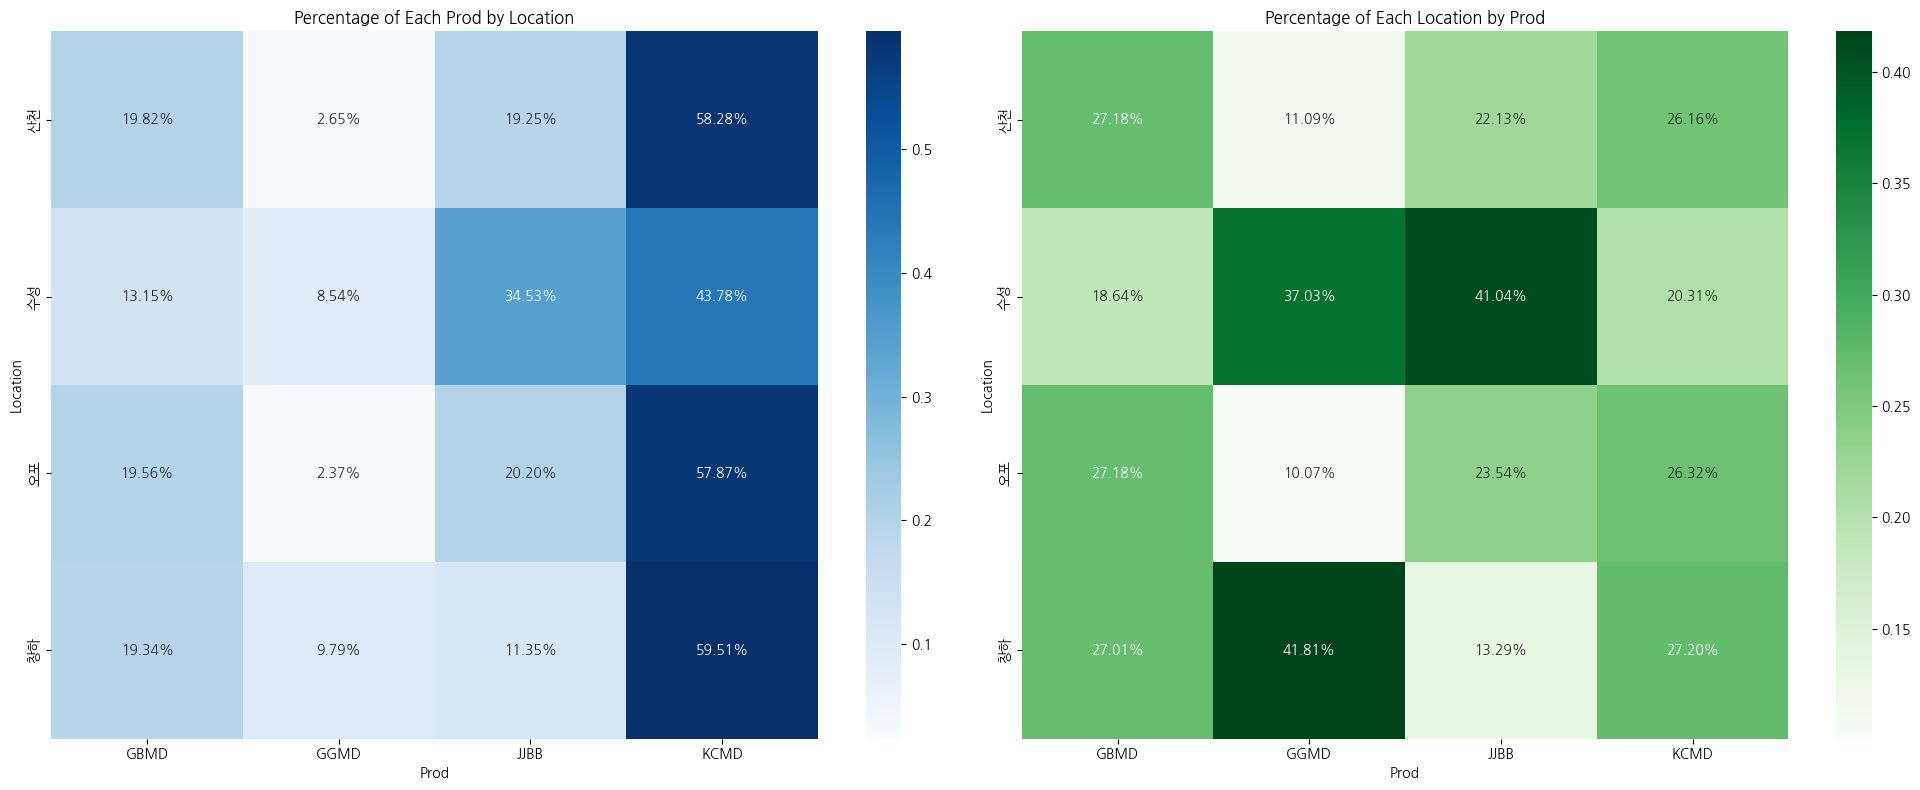

In [15]:
prod_by_location = df_eda.groupby(['origin', 'prod']).size().unstack(fill_value=0)

# The portion of the products inside the specific location
prod_by_location_percentage = prod_by_location.div(prod_by_location.sum(axis=1), axis=0)

# Percentage of each location for the respective product
location_by_prod_percentage = prod_by_location.T.div(prod_by_location.T.sum(axis=1), axis=0).T

# Visualization setup
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Visualizing the percentage of products by location
sns.heatmap(prod_by_location_percentage, annot=True, fmt='.2%', cmap='Blues', ax=ax[0])
ax[0].set_title('Percentage of Each Prod by Location')
ax[0].set_xlabel('Prod')
ax[0].set_ylabel('Location')

# Visualizing the percentage of locations by product
sns.heatmap(location_by_prod_percentage, annot=True, fmt='.2%', cmap='Greens', ax=ax[1])
ax[1].set_title('Percentage of Each Location by Prod')
ax[1].set_xlabel('Prod')
ax[1].set_ylabel('Location')

plt.tight_layout()
plt.show()

##### 'Count' counts more than 'Ratio'
- Even though the ratio is around 20 %, there is a significant difference in 'count'
- Detecting KCMD (biggest defection count;1207) might be more valuable than detecting GGMD (biggest defection ratio;137)
- Considering the fact that there are significant amount of people purchasing KCMD, it is more meaningful to detect focusing on 'Count'-wise

##### Still unsure whether KCMD is genuinely popular, or if it just appears that way due to its already large market share

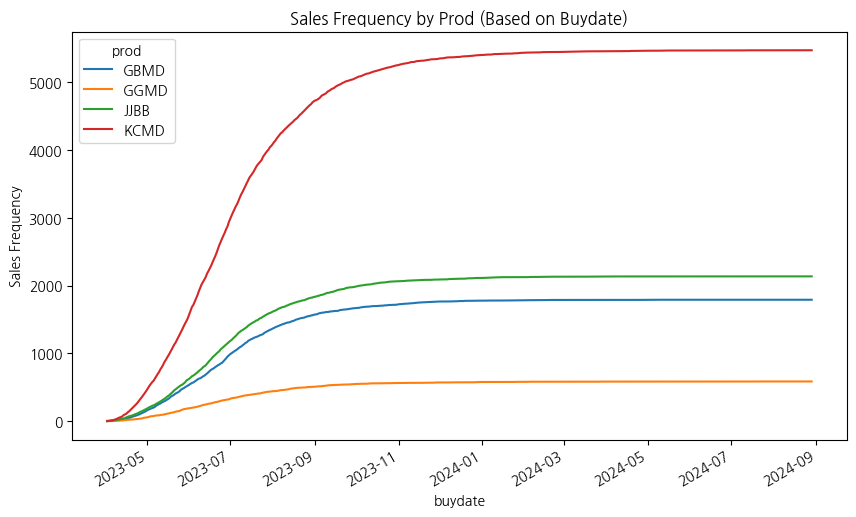

In [16]:
df_eda['buydate'] = pd.to_datetime(df_eda['buydate'])
sales_freq = df_eda.groupby(['buydate', 'prod']).size().unstack(fill_value=0).cumsum()
sales_freq.plot(figsize=(10, 6))
plt.title('Sales Frequency by Prod (Based on Buydate)')
plt.ylabel('Sales Frequency')
plt.show()

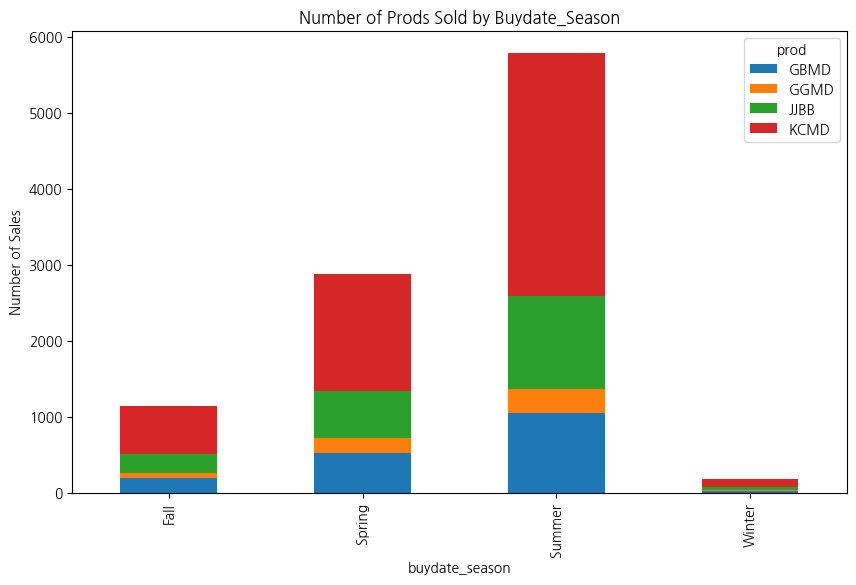

In [17]:
# Prods that sell better in specific buydate_season
seasonal_sales = df_eda.groupby(['buydate_season', 'prod']).size().unstack(fill_value=0)

# Sales of prods that sell better in specific buydate_season (number of prods per buydate_season)
seasonal_sales.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Prods Sold by Buydate_Season')
plt.ylabel('Number of Sales')
plt.show()


### EDA : focus on 'insp'

In [18]:
df_eda['insp'].value_counts()

insp
L    3021
C    2491
K    2440
Y    1538
P     499
Name: count, dtype: int64

##### Number of inspections per inspector for each date_month

In [19]:
insp_by_month = df_eda.groupby(['date_month', 'insp']).size().unstack(fill_value = 0)
insp_by_month

insp          C    K     L    P    Y
date_month                          
4           830  783  1041  162  511
5           828  843   961  166  448
6           833  814  1019  171  579

##### Number of inspections per inspector for each origin

In [20]:
insp_by_location = df_eda.groupby(['origin', 'insp']).size().unstack(fill_value=0)
insp_by_location

insp      C    K    L    P    Y
origin                         
산천      607  606  749  121  374
수성      626  620  777  121  396
오포      610  603  744  128  405
창하      648  611  751  129  363

##### Can confirm that the misclassification rates vary across inspectors and that these differences are statistically significant

##### However, the heatmap shows distribution difference exactly same as number of defections in each products
- This relation might not be statistically significant 

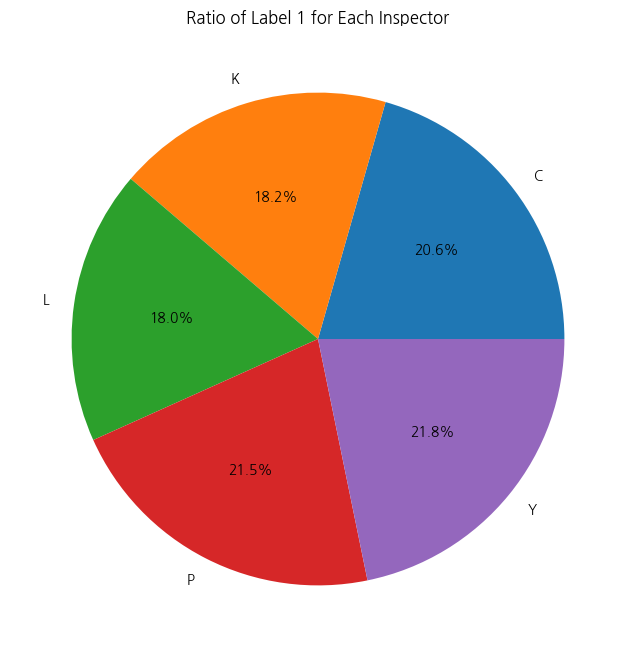

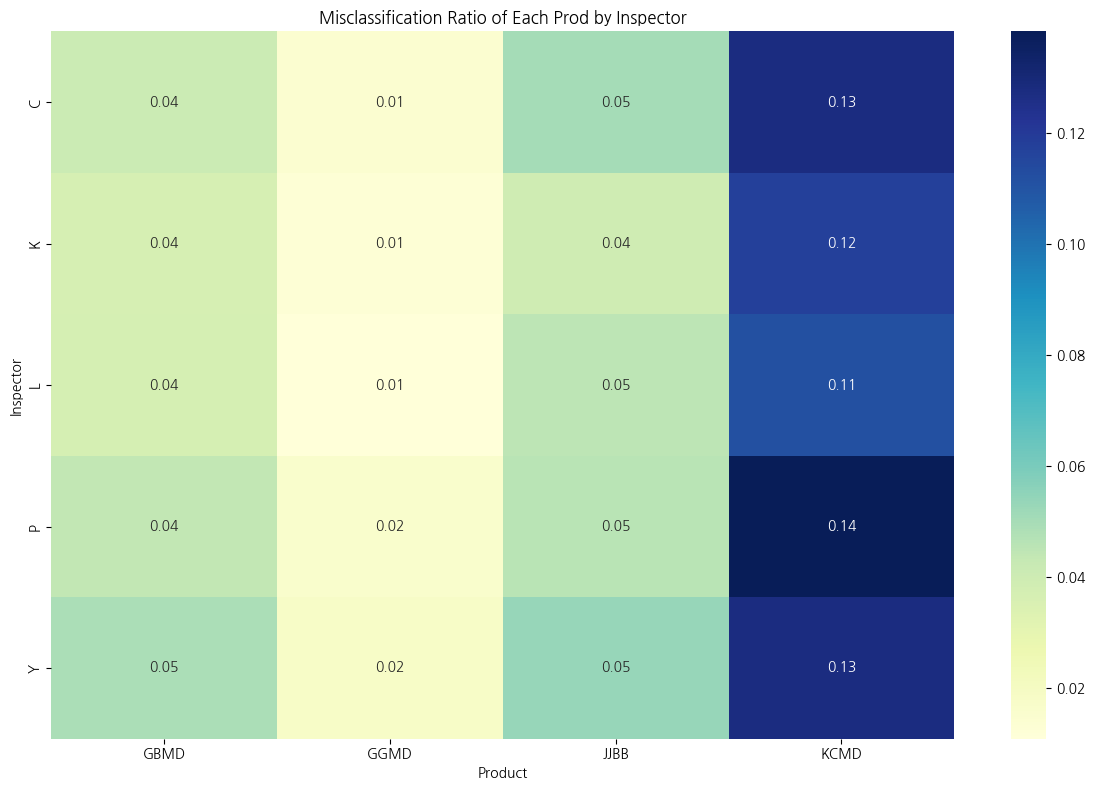

In [21]:
# Ratio of label 1 for each inspector out of all the products they handled
insp_label1_ratio = df_eda[df_eda['label'] == 1].groupby('insp').size() / df_eda.groupby('insp').size()

# Misclassification ratio for each inspector per product (label 1 out of all products)
insp_prod_misclass = df_eda[df_eda['label'] == 1].groupby(['insp', 'prod']).size() / df_eda.groupby('insp').size()
insp_prod_misclass = insp_prod_misclass.unstack(fill_value=0)

# Plotting pie chart for item 3
plt.figure(figsize=(8, 8))
insp_label1_ratio.plot(kind='pie', autopct='%1.1f%%')
plt.title('Ratio of Label 1 for Each Inspector')
plt.ylabel('')  # Removing y-label as it's unnecessary

# Plotting visualization for item 4
plt.figure(figsize=(12, 8))
sns.heatmap(insp_prod_misclass, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Misclassification Ratio of Each Prod by Inspector')
plt.xlabel('Product')
plt.ylabel('Inspector')

plt.tight_layout()
plt.show()


### EDA : focus on 'date'

##### There is an anomaly where defective products sharply increase from the end of May to the beginning of June

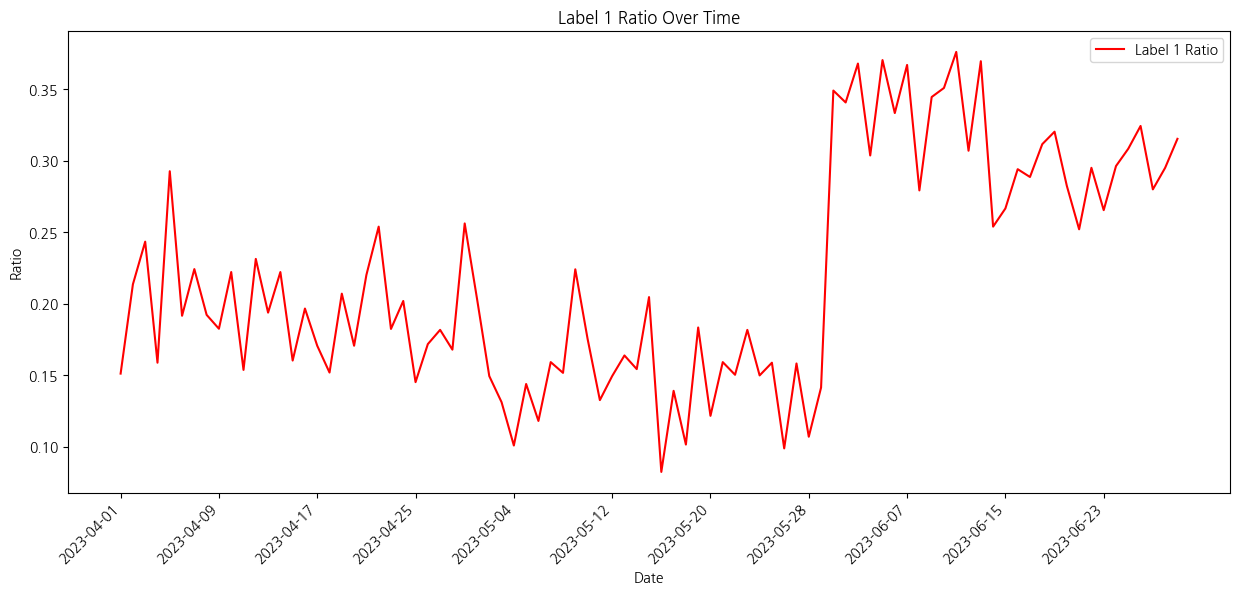

In [22]:
label_counts = df_eda.groupby('date')['label'].value_counts().unstack(fill_value=0)
label_ratio = label_counts[1] / label_counts.sum(axis=1)

plt.figure(figsize=(15, 6))
plt.plot(label_counts.index, label_ratio, color='red', label='Label 1 Ratio')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Label 1 Ratio Over Time')
plt.xticks(rotation=45, ha='right', ticks=label_counts.index[::len(label_counts)//10])
plt.legend(loc='upper right')
plt.show()

##### Found out that Inspection count doesn't change dramatically as defective products during end of May to the beginning of June

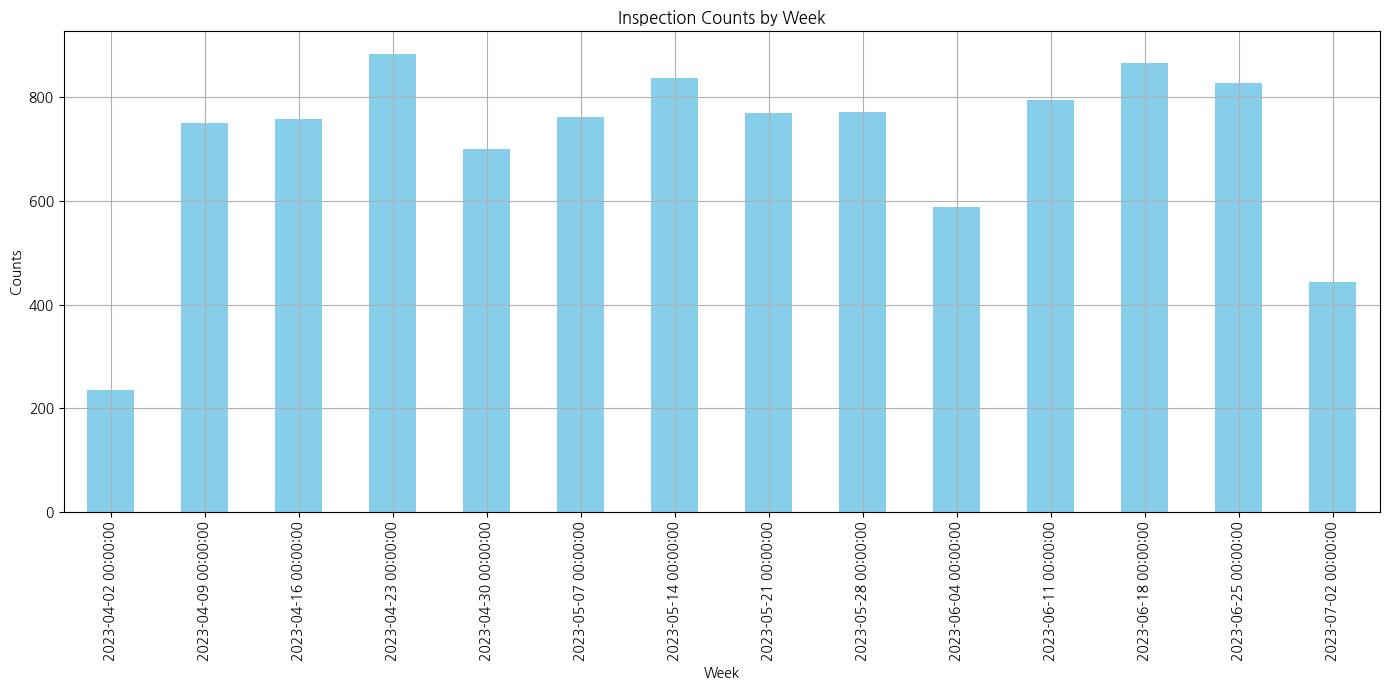

In [23]:
# Convert 'date' column to datetime format (skip if it's already in datetime format)
df_eda['date'] = pd.to_datetime(df_eda['date'])

# Group by week and count the number of inspections
inspection_counts = df_eda.resample('W', on='date').size()

# Visualize with a bar plot
plt.figure(figsize=(14, 7))
inspection_counts.plot(kind='bar', color='skyblue')  # Convert to a bar plot
plt.title('Inspection Counts by Week')
plt.xlabel('Week')
plt.ylabel('Counts')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate date labels to prevent overlap
plt.tight_layout()
plt.show()

##### Misclassification Rate by Date for each insp
- The misclassification rates of inspectors C, K, and L are similar in pattern and proportion to the overall misclassification rate

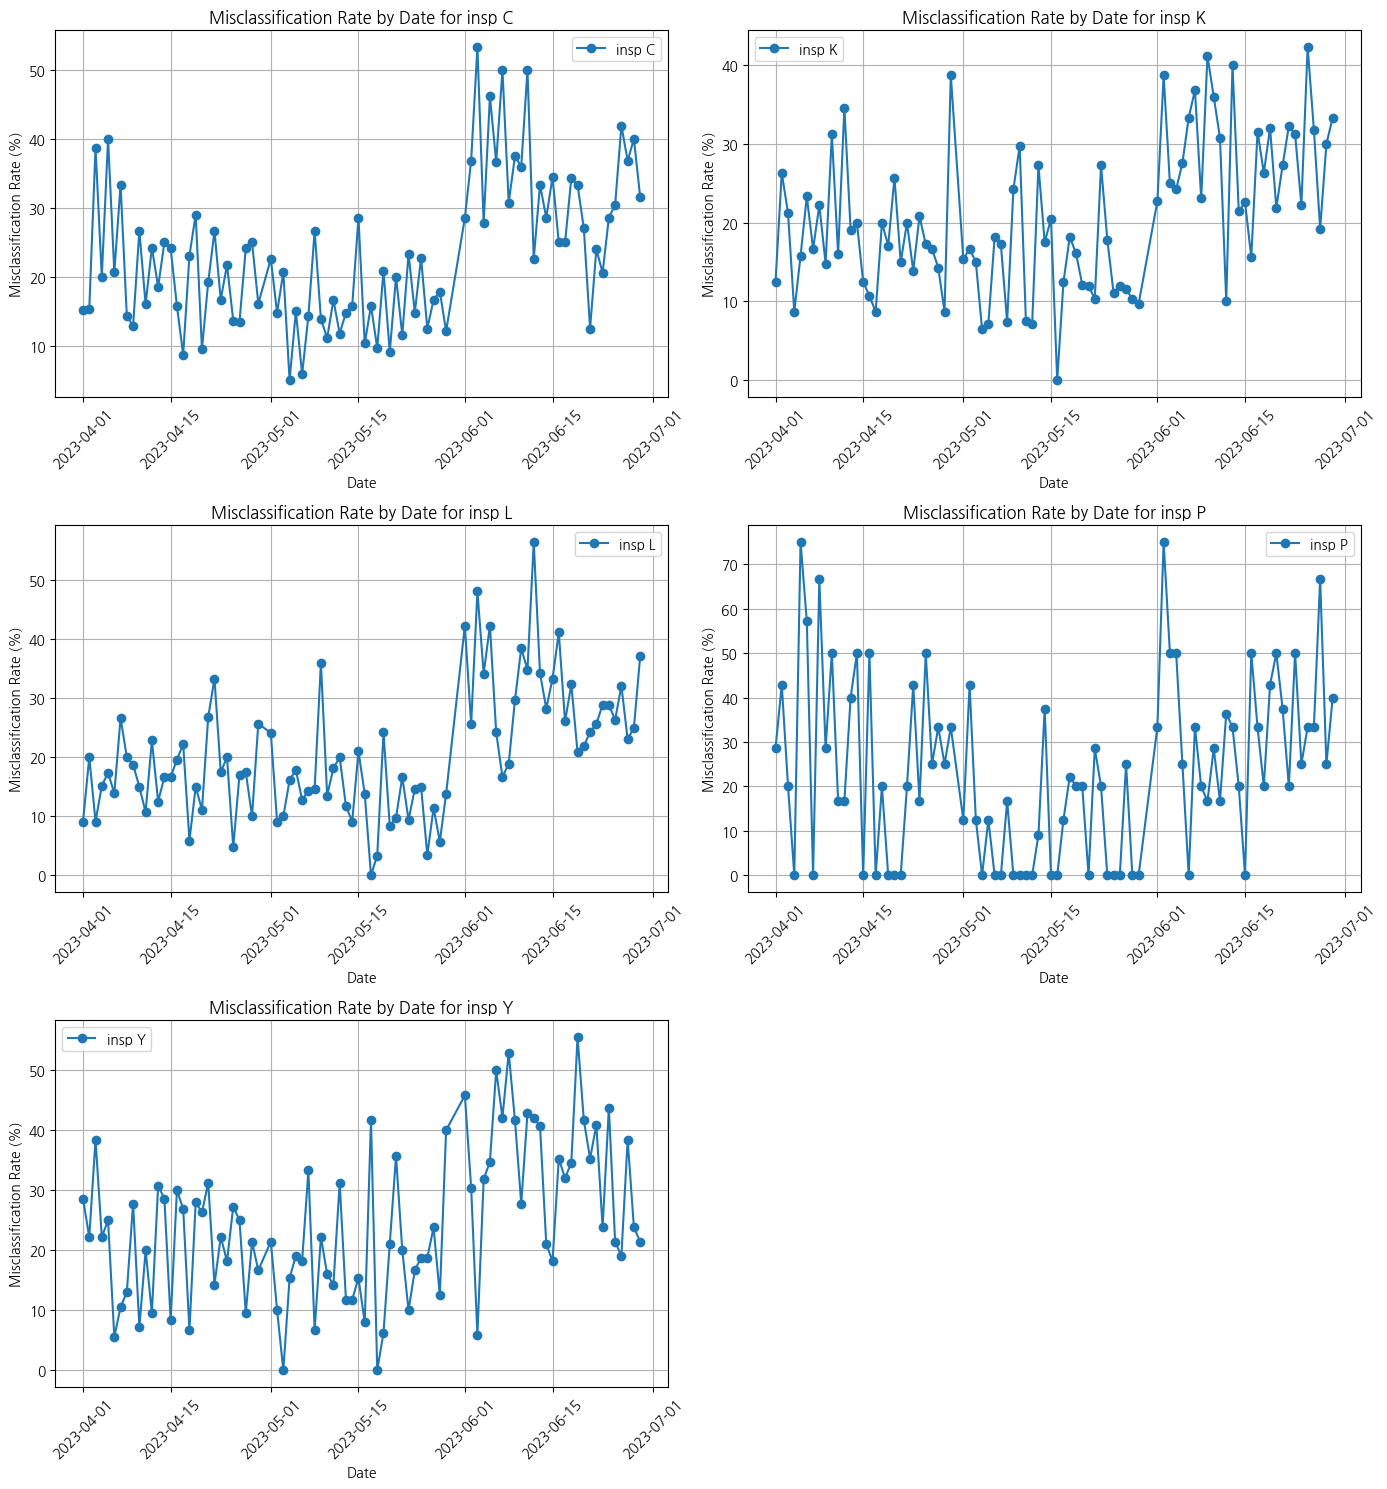

In [24]:
# Line plot of misclassification rates by date for each inspector
# Group by 'insp' and 'date' and calculate the misclassification rate (percentage of label 1)
misclass_rates = df_eda.groupby(['insp', 'date'])['label'].mean().reset_index()

# Convert misclassification rate to percentage
misclass_rates['misclassification_rate'] = misclass_rates['label'] * 100

# Create a pivot table to make it easier to visualize misclassification rates by date for each inspector
misclass_pivot = misclass_rates.pivot(index='date', columns='insp', values='misclassification_rate')

# Create subplots for each 'insp'
num_insp = misclass_pivot.columns.size
num_rows = num_insp // 2 + num_insp % 2  # Calculate the number of subplot rows for two columns

plt.figure(figsize=(14, num_rows * 5))

for idx, insp in enumerate(misclass_pivot.columns, start=1):
    plt.subplot(num_rows, 2, idx)
    plt.plot(misclass_pivot.index, misclass_pivot[insp], marker='o', label=f'insp {insp}')
    plt.title(f'Misclassification Rate by Date for insp {insp}')
    plt.xlabel('Date')
    plt.ylabel('Misclassification Rate (%)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


##### Observing inspector specifically
- insp C : except for GBMD, misclassification increased during end of May through the beginning of June
- insp K : except for JJBB, misclassification increased during end of May through the beginning of June
- insp L : every products' misclassification increased during end of May through the beginning of June
- insp P : every products' misclassification increased during end of May through the beginning of June
- insp Y : except for JJBB, GBMD, misclassification increased during end of May through the beginning of June

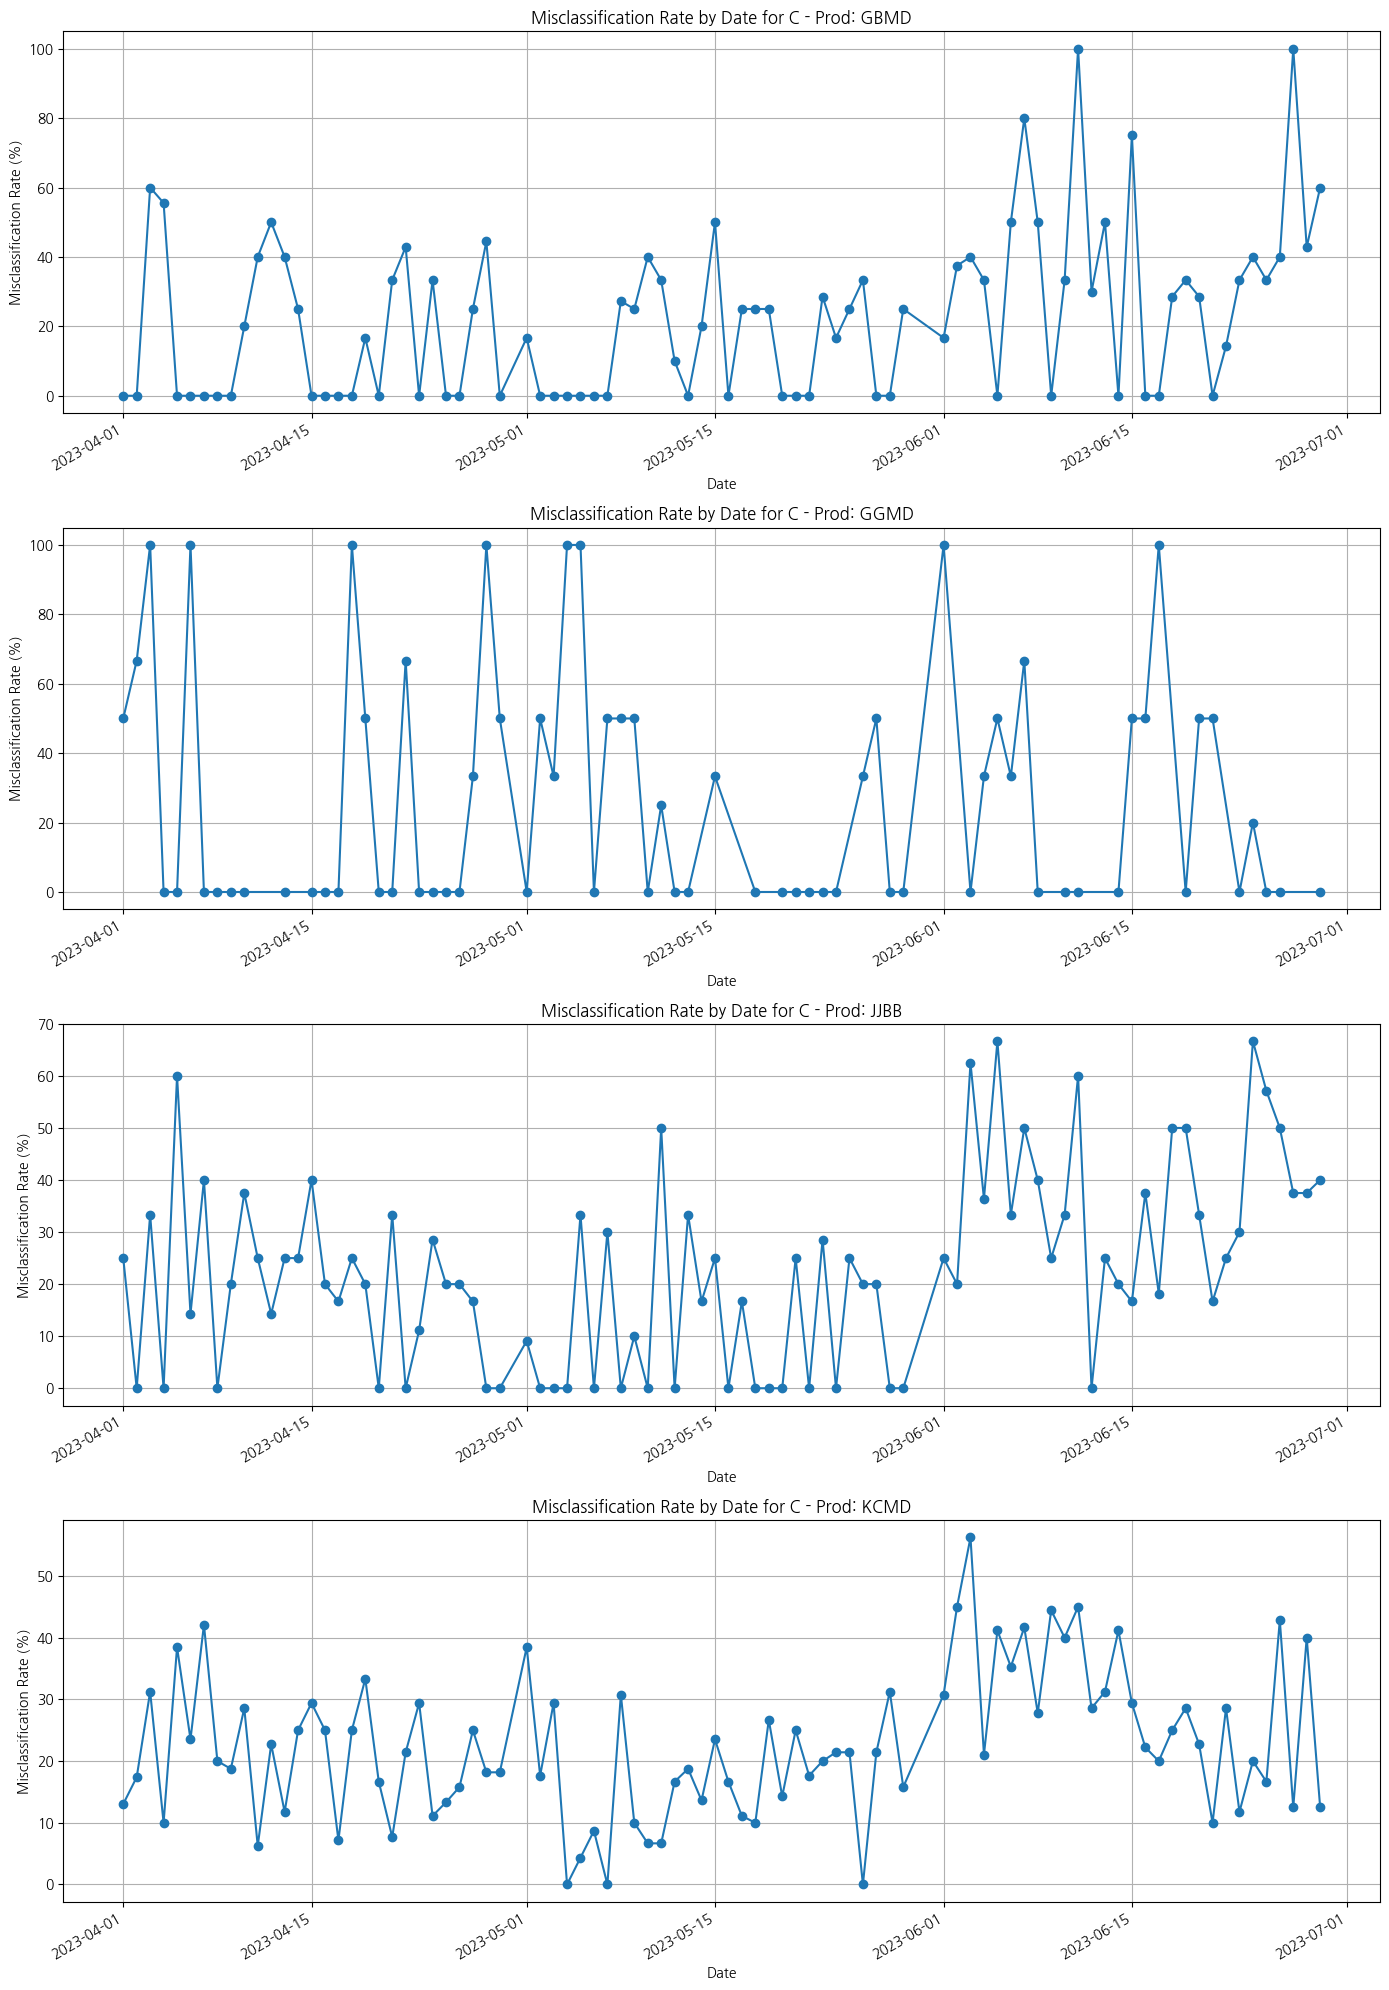

In [25]:
# Group by 'insp', 'date', and 'prod' to calculate the misclassification rate (percentage of label 1)
misclass_rates_prod = df_eda.groupby(['insp', 'date', 'prod'])['label'].mean().reset_index()

# Convert misclassification rate to percentage
misclass_rates_prod['misclassification_rate'] = misclass_rates_prod['label'] * 100

# Select one 'insp' (e.g., the first 'insp')
selected_insp = misclass_rates_prod['insp'].unique()[0]

# Filter data for the selected 'insp'
selected_insp_data = misclass_rates_prod[misclass_rates_prod['insp'] == selected_insp]

# Create subplots for each 'prod'
num_prod = len(selected_insp_data['prod'].unique())
plt.figure(figsize=(14, num_prod * 5))

for idx, prod in enumerate(selected_insp_data['prod'].unique()):
    ax = plt.subplot(num_prod, 1, idx+1)
    # Filter data by 'prod'
    prod_data = selected_insp_data[selected_insp_data['prod'] == prod]

    # Create a pivot table to make it easier to visualize misclassification rates by date for each 'prod'
    prod_pivot = prod_data.pivot(index='date', columns='prod', values='misclassification_rate')

    # Plot the graph
    prod_pivot.plot(ax=ax, kind='line', marker='o')
    ax.set_title(f'Misclassification Rate by Date for {selected_insp} - Prod: {prod}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Misclassification Rate (%)')
    ax.legend().set_visible(False)
    ax.grid(True)

plt.tight_layout()
plt.show()


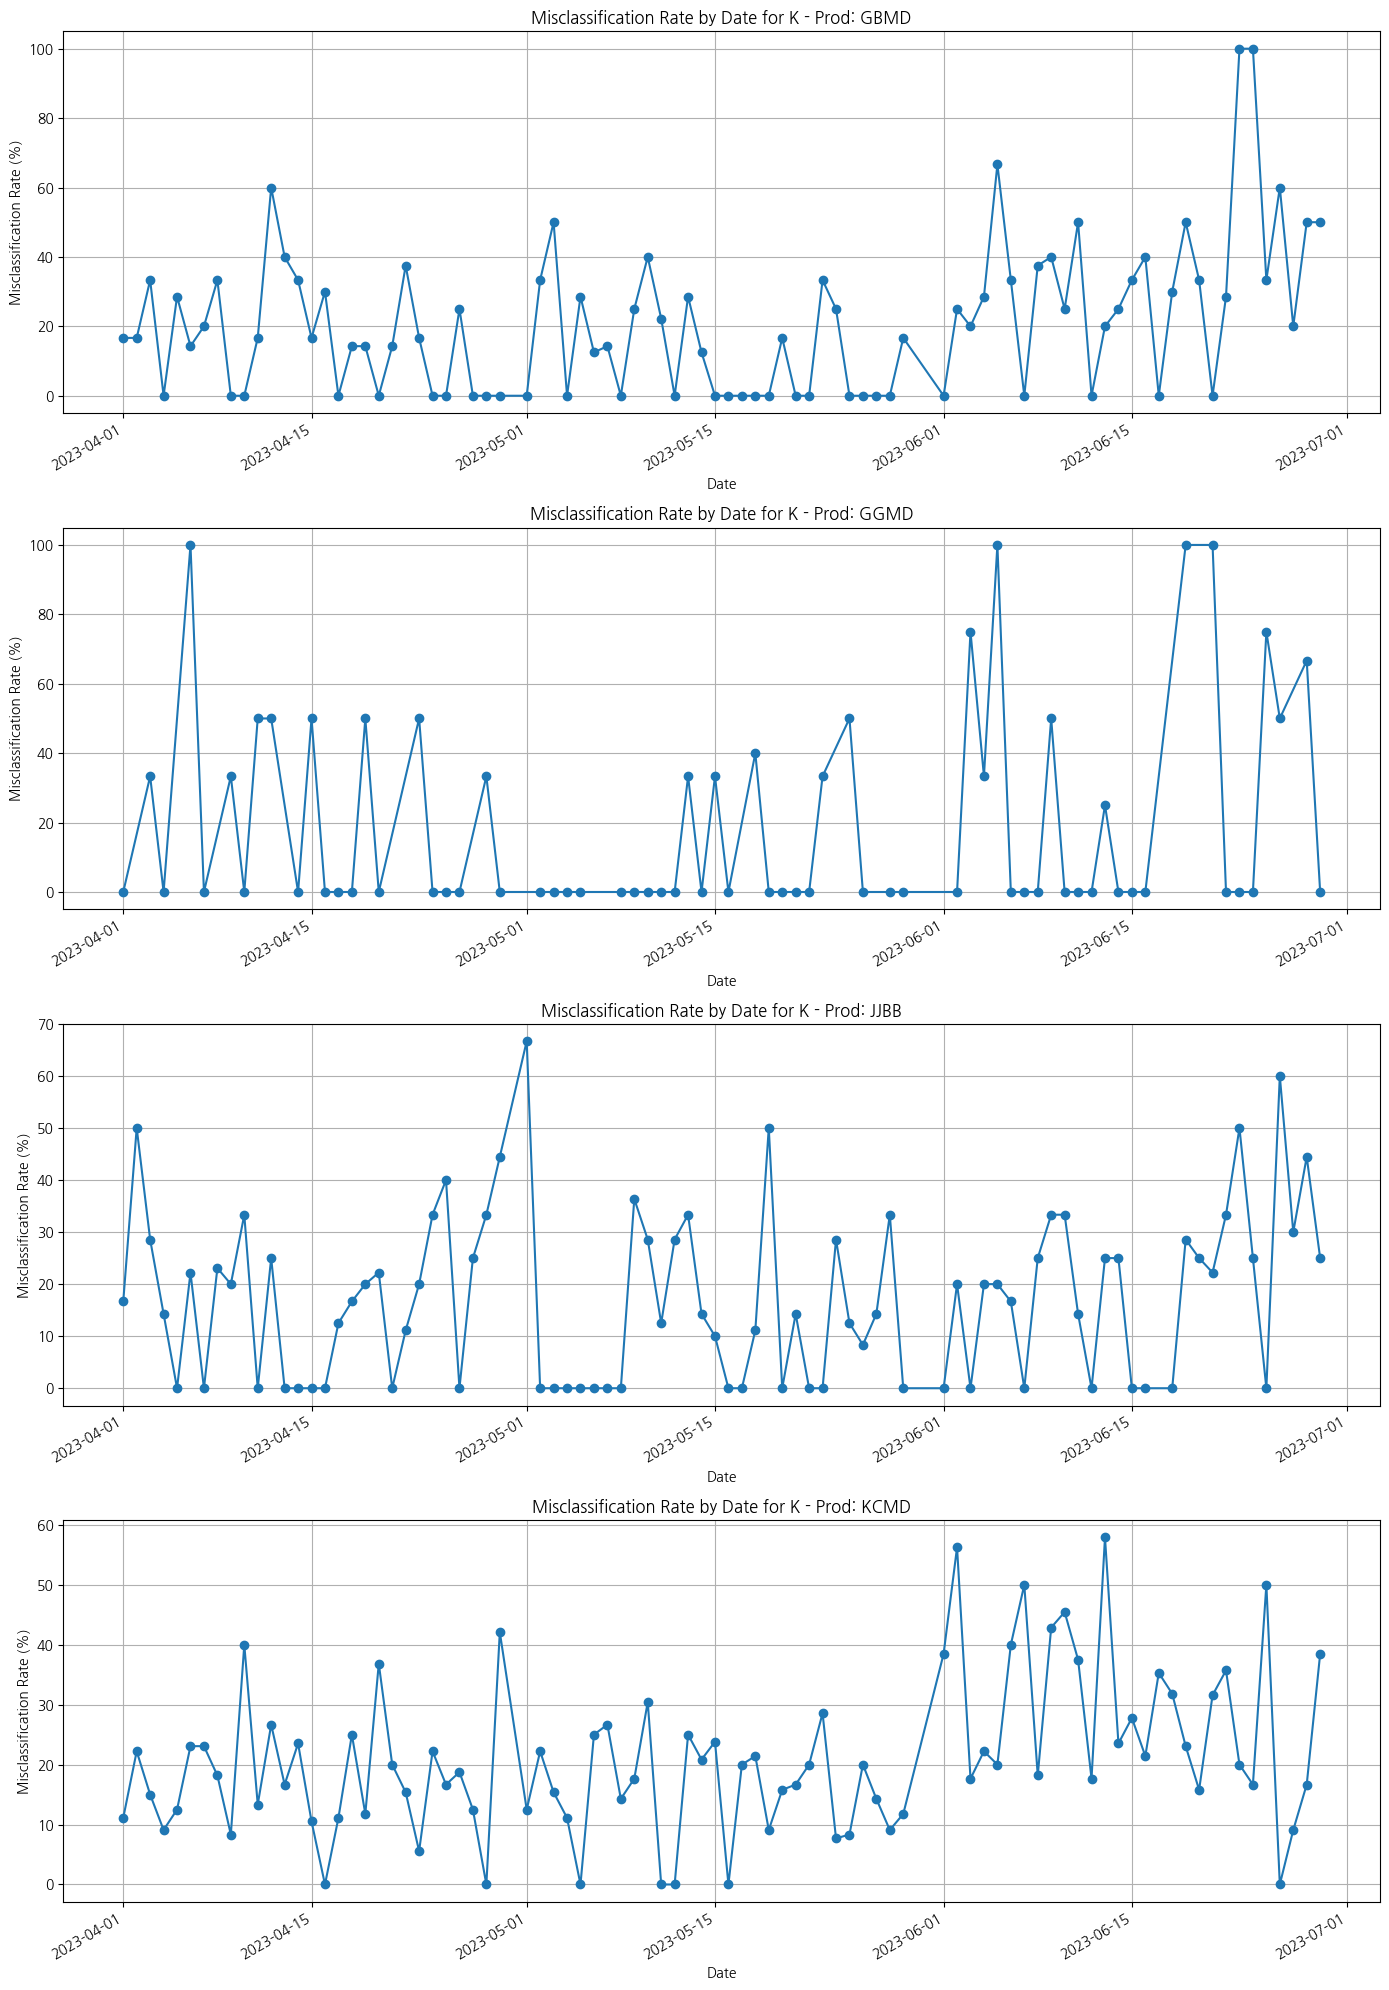

In [26]:
# Group by 'insp', 'date', and 'prod' to calculate the misclassification rate (percentage of label 1)
misclass_rates_prod = df_eda.groupby(['insp', 'date', 'prod'])['label'].mean().reset_index()

# Convert misclassification rate to percentage
misclass_rates_prod['misclassification_rate'] = misclass_rates_prod['label'] * 100

# Select one 'insp' (e.g., the second 'insp')
selected_insp = misclass_rates_prod['insp'].unique()[1]

# Filter data for the selected 'insp'
selected_insp_data = misclass_rates_prod[misclass_rates_prod['insp'] == selected_insp]

# Create subplots for each 'prod'
num_prod = len(selected_insp_data['prod'].unique())
plt.figure(figsize=(14, num_prod * 5))

for idx, prod in enumerate(selected_insp_data['prod'].unique()):
    ax = plt.subplot(num_prod, 1, idx+1)
    # Filter data by 'prod'
    prod_data = selected_insp_data[selected_insp_data['prod'] == prod]

    # Create a pivot table to make it easier to visualize misclassification rates by date for each 'prod'
    prod_pivot = prod_data.pivot(index='date', columns='prod', values='misclassification_rate')

    # Plot the graph
    prod_pivot.plot(ax=ax, kind='line', marker='o')
    ax.set_title(f'Misclassification Rate by Date for {selected_insp} - Prod: {prod}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Misclassification Rate (%)')
    ax.legend().set_visible(False)
    ax.grid(True)

plt.tight_layout()
plt.show()


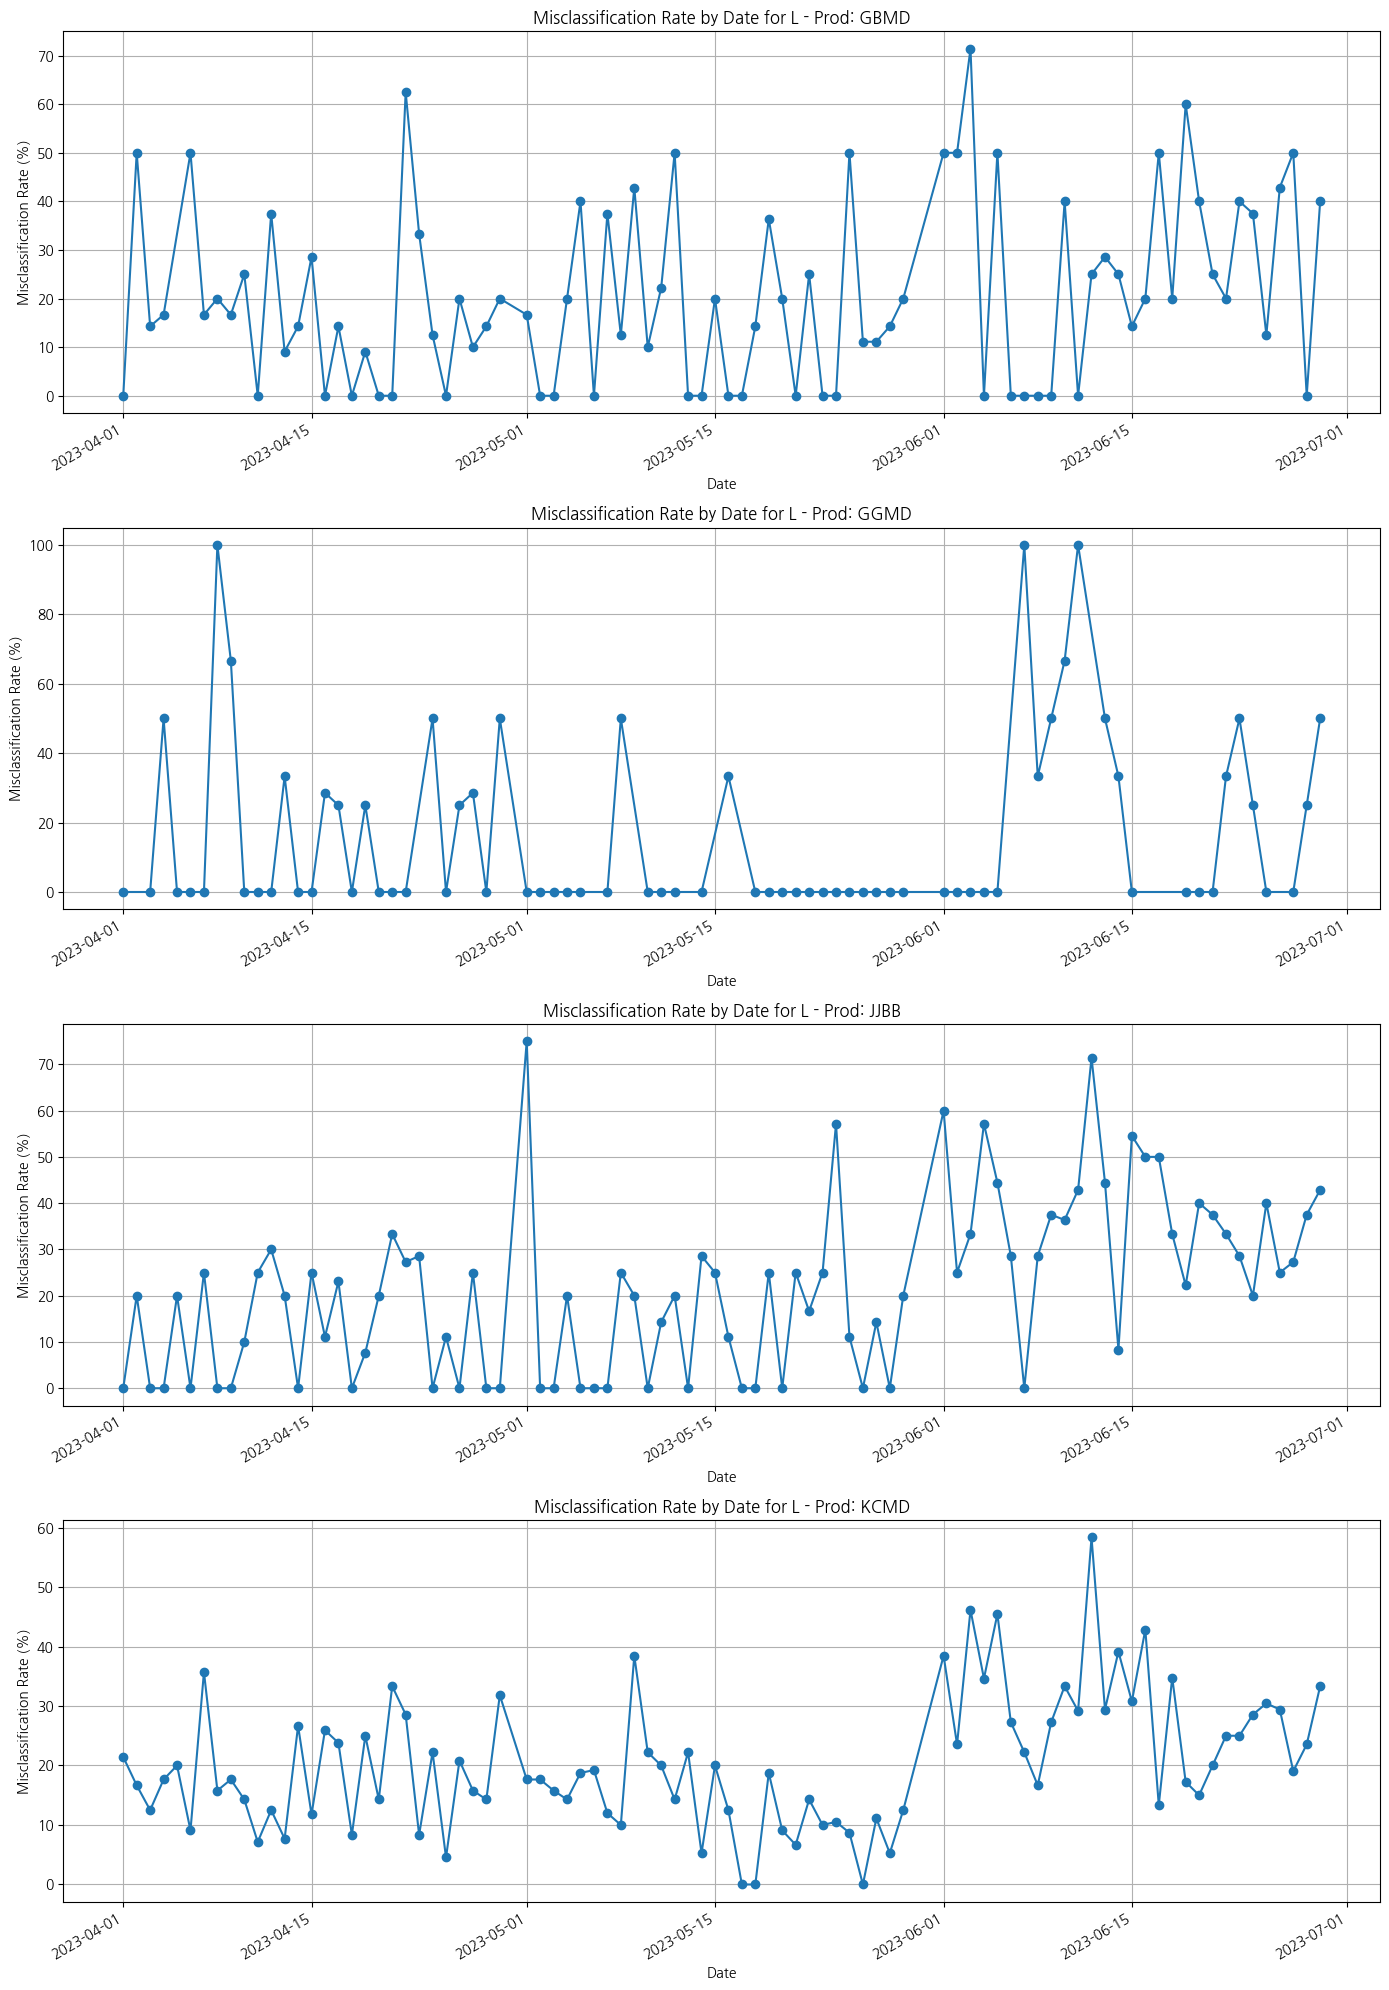

In [27]:
# Calculate the misclassification rate (percentage of label 1) by grouping 'insp', 'date', and 'prod'
misclass_rates_prod = df_eda.groupby(['insp', 'date', 'prod'])['label'].mean().reset_index()

# Convert misclassification rate to percentage
misclass_rates_prod['misclassification_rate'] = misclass_rates_prod['label'] * 100

# Select one 'insp' (e.g., the third 'insp')
selected_insp = misclass_rates_prod['insp'].unique()[2]

# Filter data for the selected 'insp'
selected_insp_data = misclass_rates_prod[misclass_rates_prod['insp'] == selected_insp]

# Create subplots for each 'prod'
num_prod = len(selected_insp_data['prod'].unique())
plt.figure(figsize=(14, num_prod * 5))

for idx, prod in enumerate(selected_insp_data['prod'].unique()):
    ax = plt.subplot(num_prod, 1, idx+1)
    # Filter data by 'prod'
    prod_data = selected_insp_data[selected_insp_data['prod'] == prod]

    # Create a pivot table to make it easier to visualize misclassification rates by date for each 'prod'
    prod_pivot = prod_data.pivot(index='date', columns='prod', values='misclassification_rate')

    # Plot the graph
    prod_pivot.plot(ax=ax, kind='line', marker='o')
    ax.set_title(f'Misclassification Rate by Date for {selected_insp} - Prod: {prod}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Misclassification Rate (%)')
    ax.legend().set_visible(False)
    ax.grid(True)

plt.tight_layout()
plt.show()


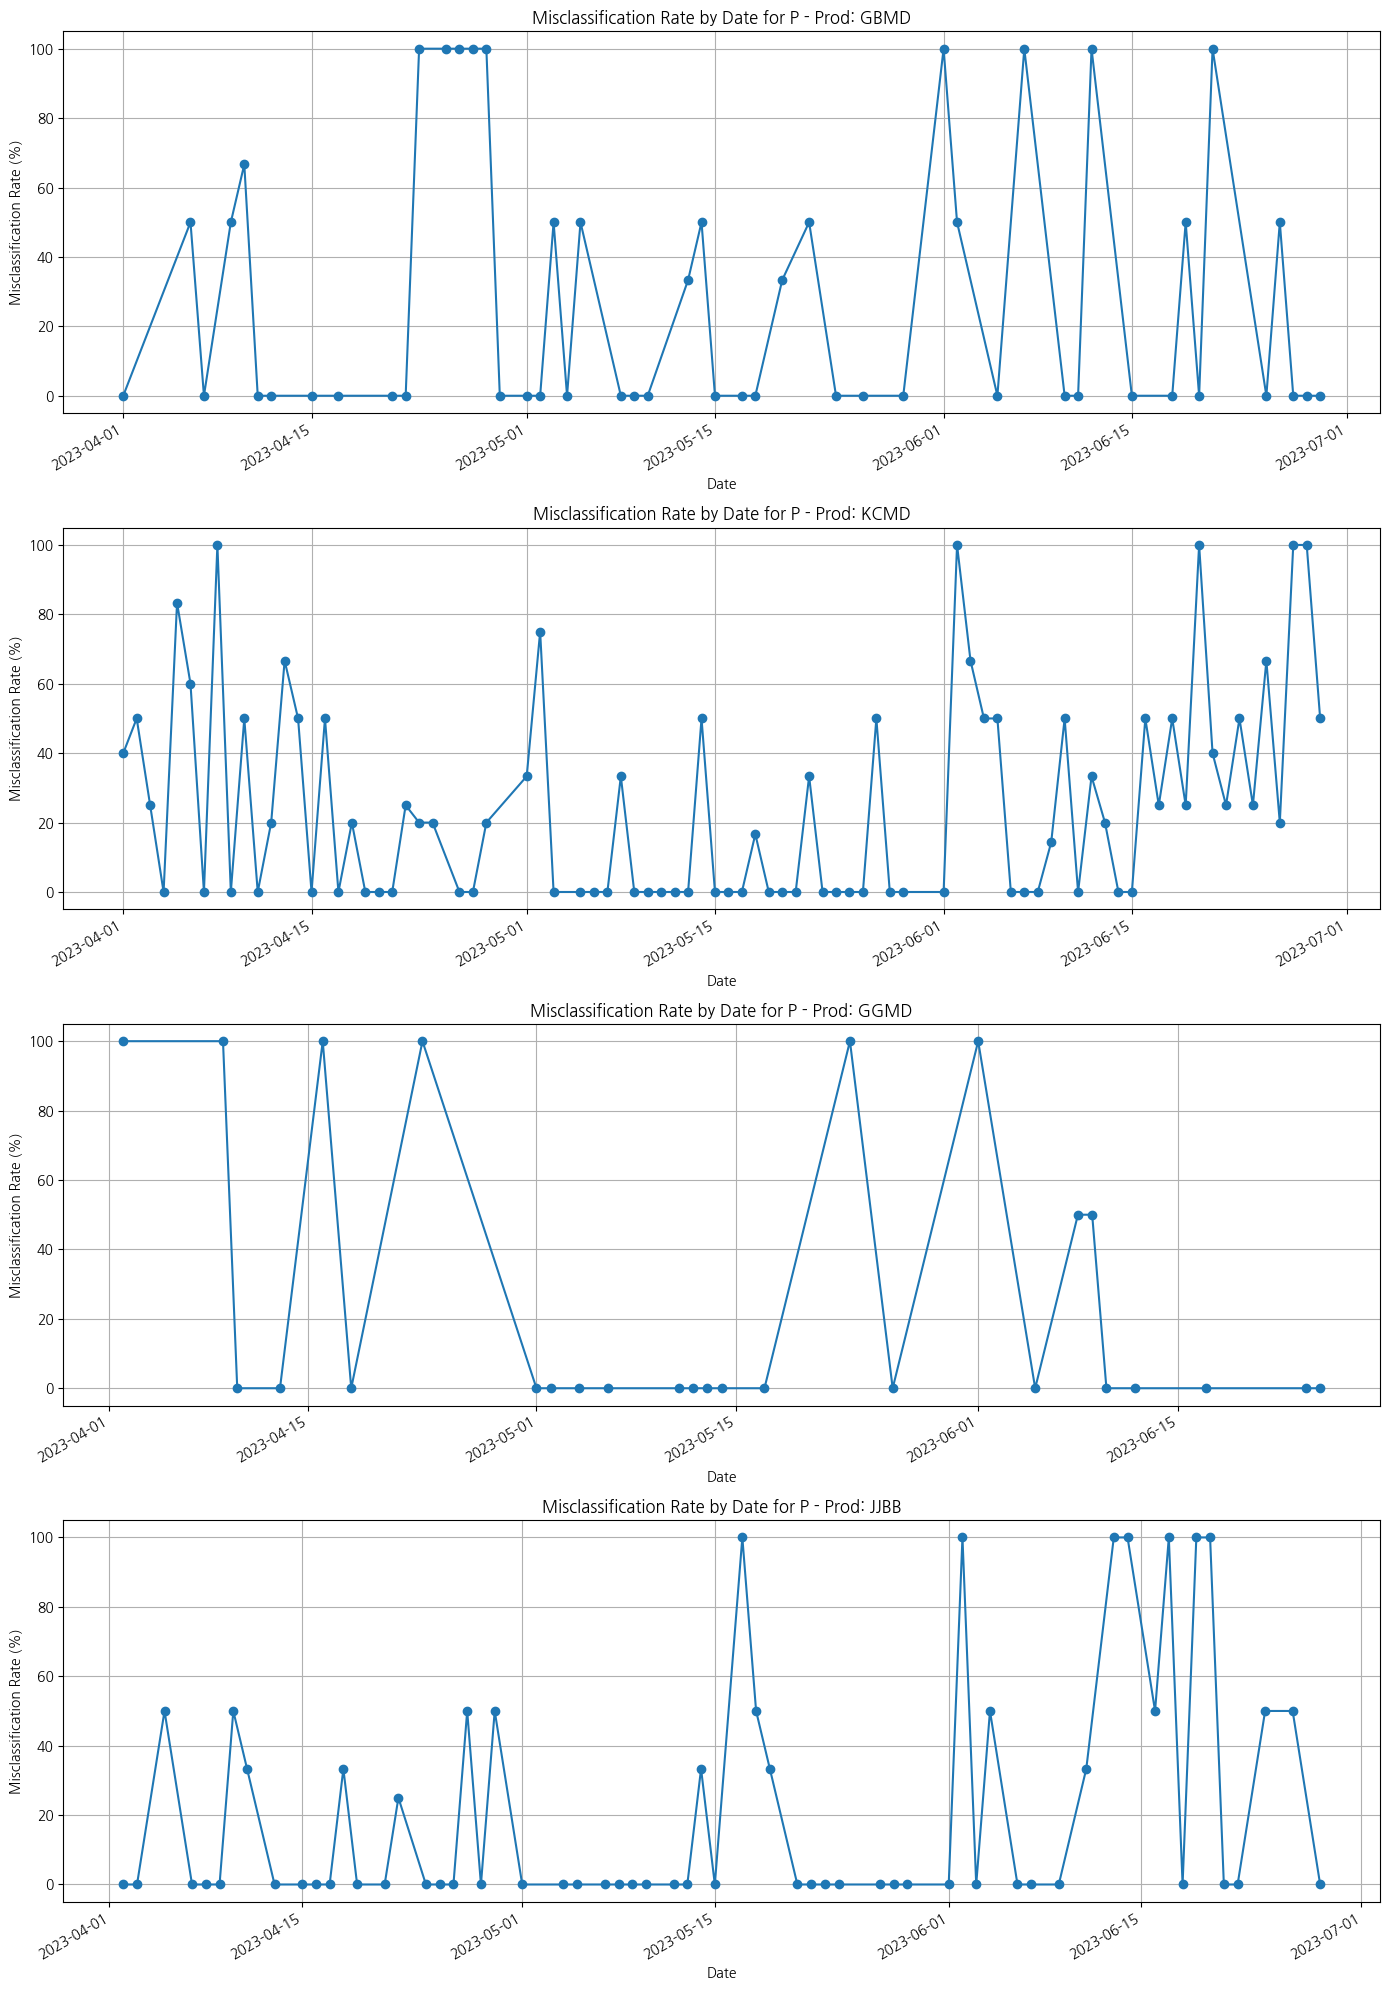

In [28]:
# Calculate the misclassification rate (percentage of label 1) by grouping 'insp', 'date', and 'prod'
misclass_rates_prod = df_eda.groupby(['insp', 'date', 'prod'])['label'].mean().reset_index()

# Convert misclassification rate to percentage
misclass_rates_prod['misclassification_rate'] = misclass_rates_prod['label'] * 100

# Select one 'insp' (e.g., the fourth 'insp')
selected_insp = misclass_rates_prod['insp'].unique()[3]

# Filter data for the selected 'insp'
selected_insp_data = misclass_rates_prod[misclass_rates_prod['insp'] == selected_insp]

# Create subplots for each 'prod'
num_prod = len(selected_insp_data['prod'].unique())
plt.figure(figsize=(14, num_prod * 5))

for idx, prod in enumerate(selected_insp_data['prod'].unique()):
    ax = plt.subplot(num_prod, 1, idx+1)
    # Filter data by 'prod'
    prod_data = selected_insp_data[selected_insp_data['prod'] == prod]

    # Create a pivot table to make it easier to visualize misclassification rates by date for each 'prod'
    prod_pivot = prod_data.pivot(index='date', columns='prod', values='misclassification_rate')

    # Plot the graph
    prod_pivot.plot(ax=ax, kind='line', marker='o')
    ax.set_title(f'Misclassification Rate by Date for {selected_insp} - Prod: {prod}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Misclassification Rate (%)')
    ax.legend().set_visible(False)
    ax.grid(True)

plt.tight_layout()
plt.show()


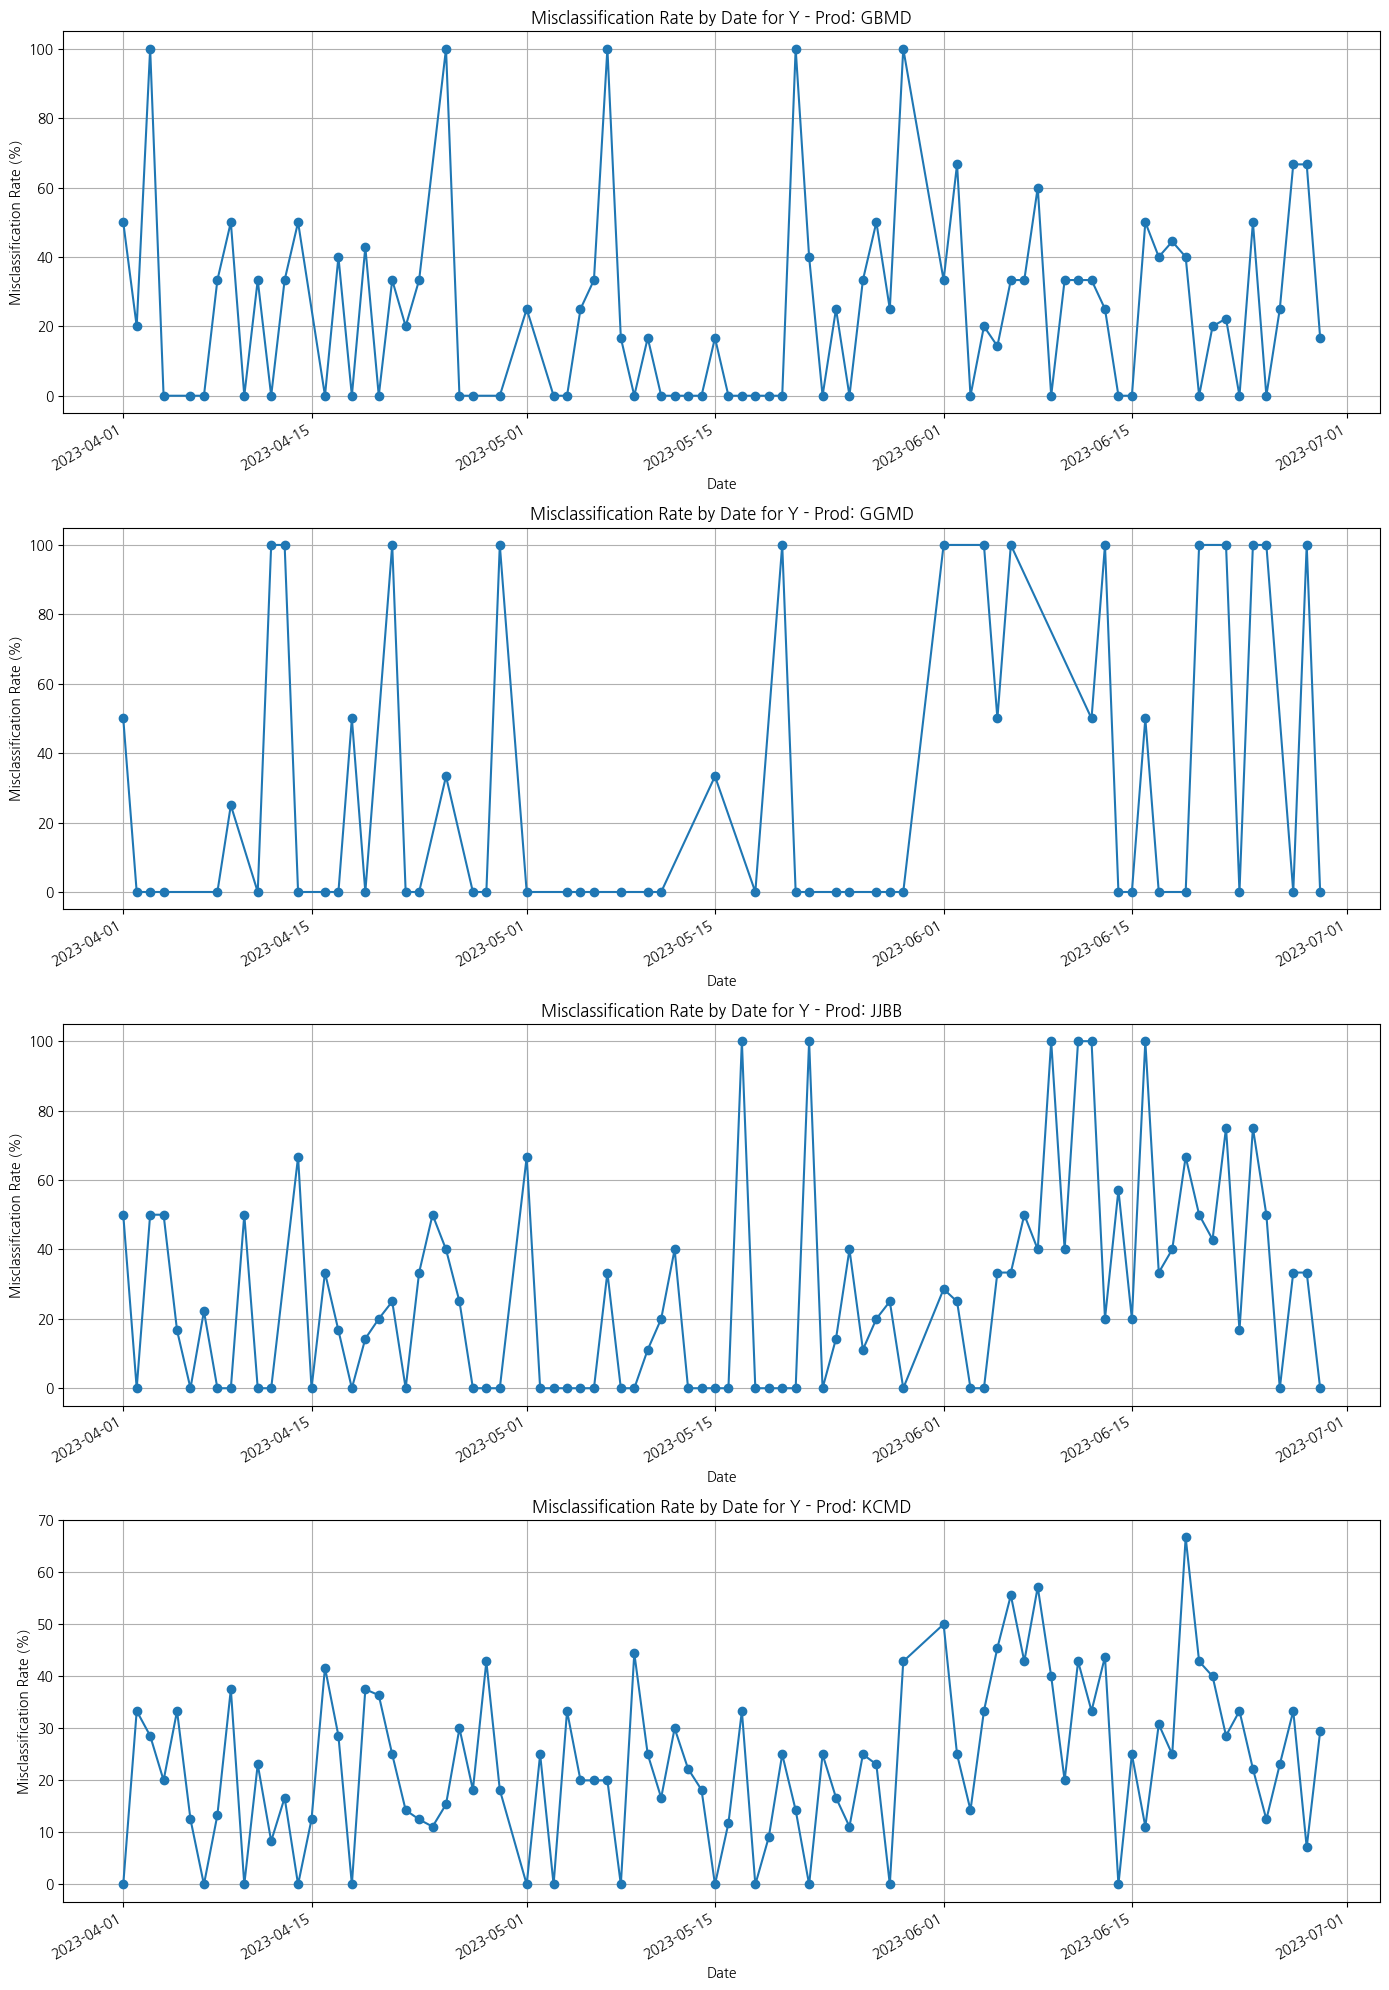

In [29]:
# Calculate the misclassification rate (percentage of label 1) by grouping 'insp', 'date', and 'prod'
misclass_rates_prod = df_eda.groupby(['insp', 'date', 'prod'])['label'].mean().reset_index()

# Convert misclassification rate to percentage
misclass_rates_prod['misclassification_rate'] = misclass_rates_prod['label'] * 100

# Select one 'insp' (e.g., the fifth 'insp')
selected_insp = misclass_rates_prod['insp'].unique()[4]

# Filter data for the selected 'insp'
selected_insp_data = misclass_rates_prod[misclass_rates_prod['insp'] == selected_insp]

# Create subplots for each 'prod'
num_prod = len(selected_insp_data['prod'].unique())
plt.figure(figsize=(14, num_prod * 5))

for idx, prod in enumerate(selected_insp_data['prod'].unique()):
    ax = plt.subplot(num_prod, 1, idx+1)
    # Filter data by 'prod'
    prod_data = selected_insp_data[selected_insp_data['prod'] == prod]

    # Create a pivot table to make it easier to visualize misclassification rates by date for each 'prod'
    prod_pivot = prod_data.pivot(index='date', columns='prod', values='misclassification_rate')

    # Plot the graph
    prod_pivot.plot(ax=ax, kind='line', marker='o')
    ax.set_title(f'Misclassification Rate by Date for {selected_insp} - Prod: {prod}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Misclassification Rate (%)')
    ax.legend().set_visible(False)
    ax.grid(True)

plt.tight_layout()
plt.show()


##### Observing specific product over time

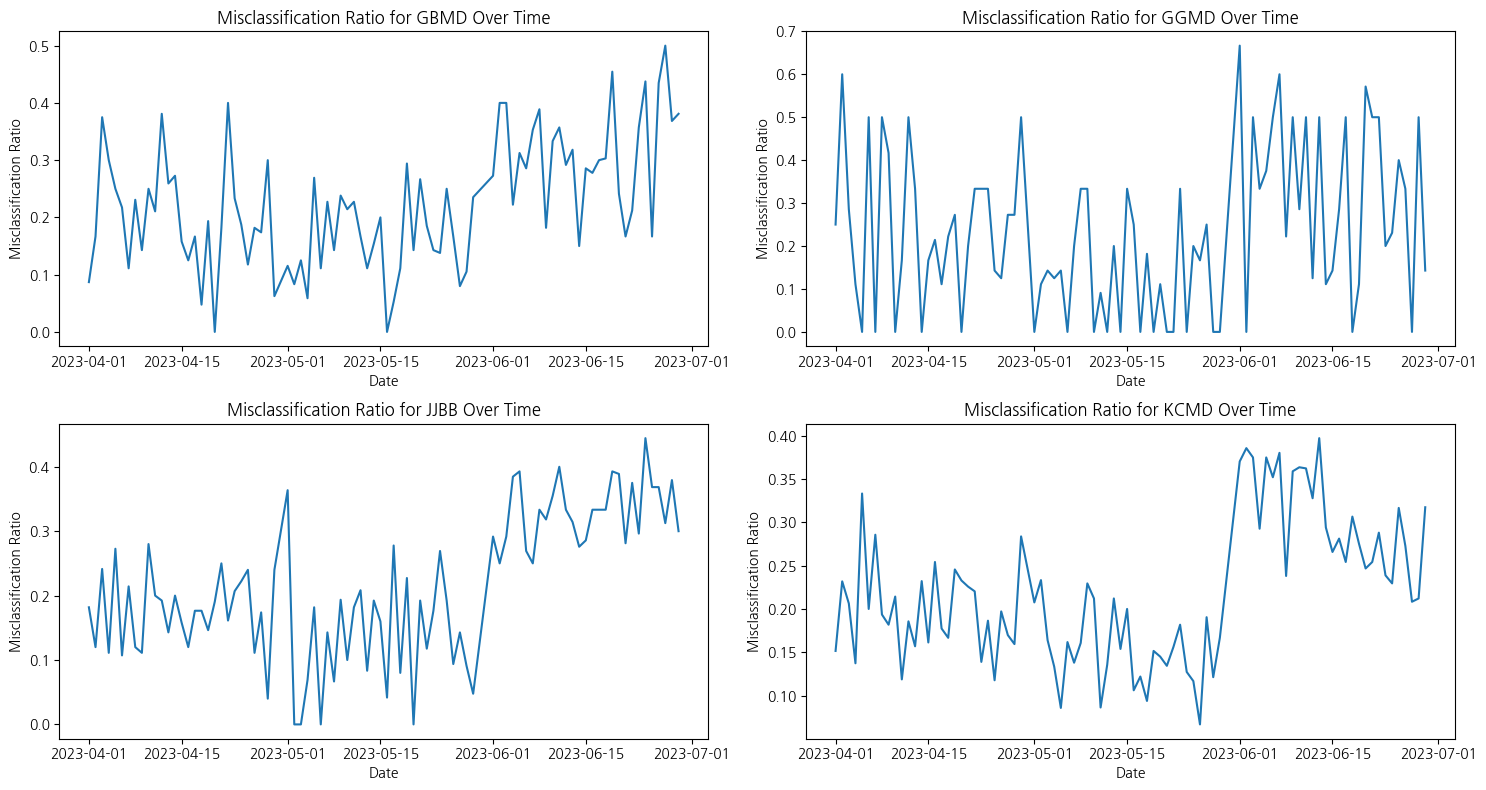

In [53]:
prod_label_ratio = df_eda.groupby(['date', 'prod'])['label'].mean().unstack(fill_value=0)

# Create subplots based on the number of products
n_prods = len(prod_label_ratio.columns)
n_rows = int(np.ceil(n_prods / 2))
fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 4))

# Plot the graph for each product
for i, prod in enumerate(prod_label_ratio.columns):
    ax = axes[i // 2, i % 2]
    sns.lineplot(x=prod_label_ratio.index, y=prod_label_ratio[prod], ax=ax)
    ax.set_title(f'Misclassification Ratio for {prod} Over Time')
    ax.set_ylabel('Misclassification Ratio')
    ax.set_xlabel('Date')

# Remove the empty subplot if the number of products is odd
if n_prods % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()


###  EDA : focus on 'buydate'

##### Total sales by Month

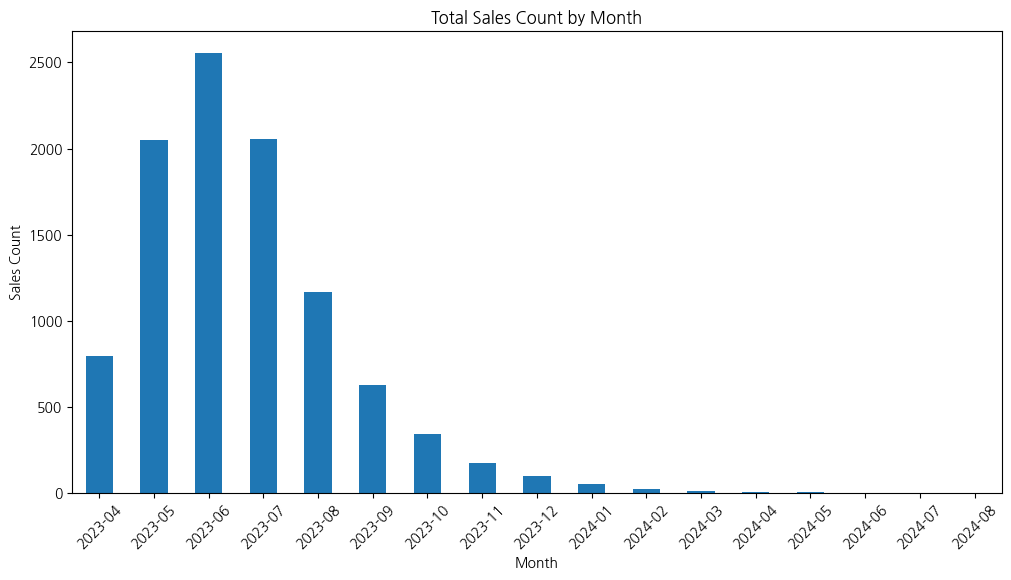

In [30]:
df_eda['buydate'] = pd.to_datetime(df_eda['buydate'])
monthly_sales_count = df_eda.groupby(df_eda['buydate'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
monthly_sales_count.plot(kind='bar')
plt.title('Total Sales Count by Month')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.show()

##### Each product shows similar aspect of sales

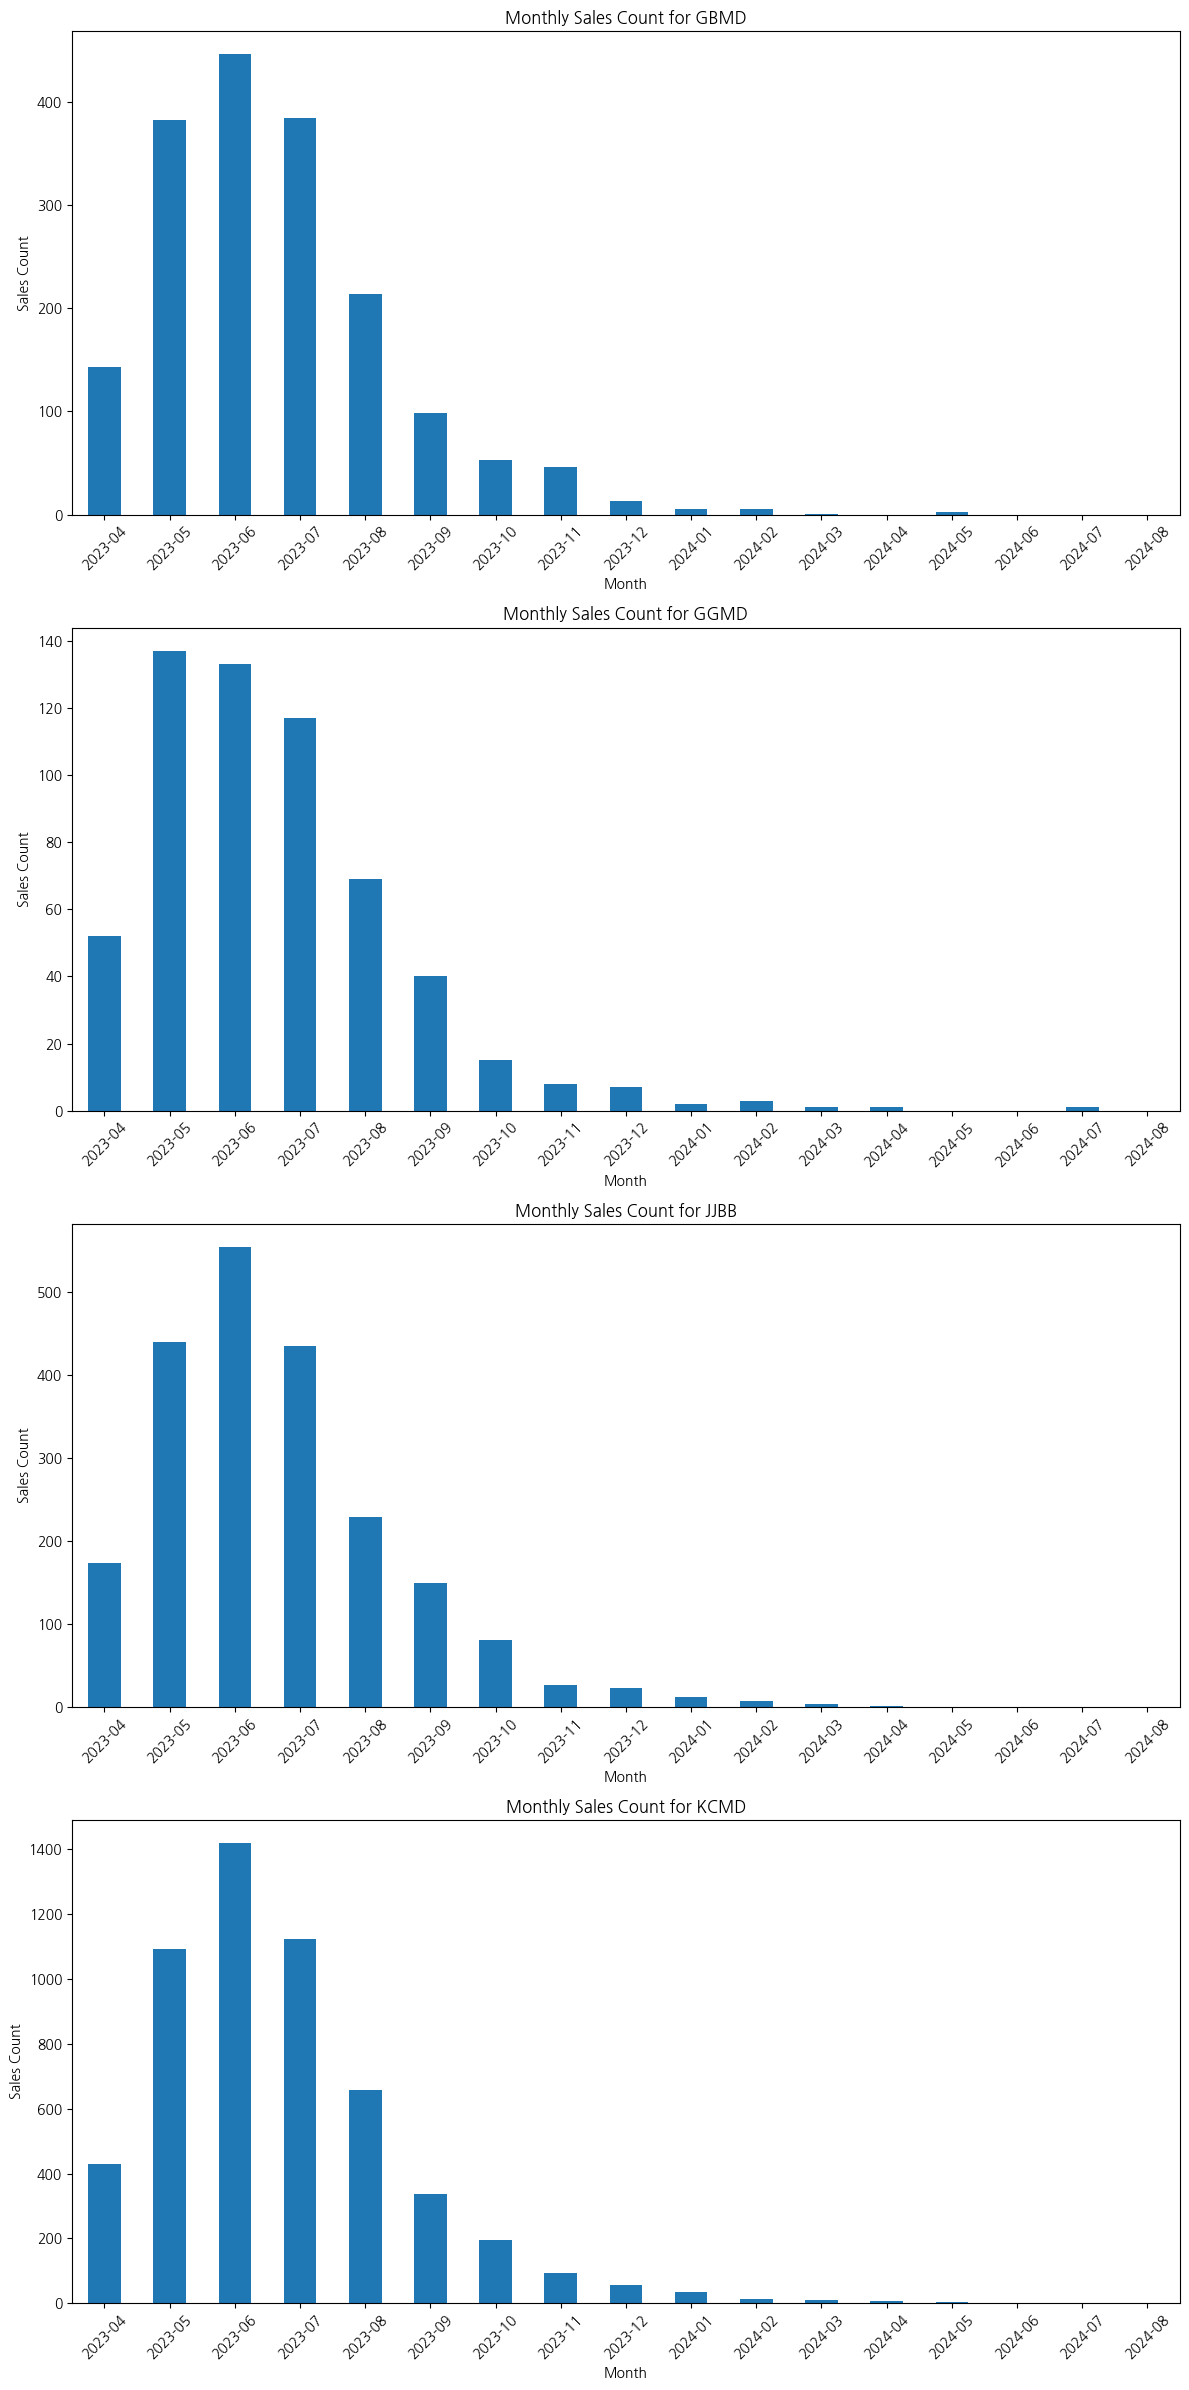

In [31]:
# Convert to datetime format
df_eda['buydate'] = pd.to_datetime(df_eda['buydate'])

# Calculate the number of sales by month and product
monthly_prod_sales = df_eda.groupby([df_eda['buydate'].dt.to_period('M'), 'prod']).size().unstack(fill_value=0)

# Plot the monthly sales count histogram for each product
n_prods = len(monthly_prod_sales.columns)
fig, axes = plt.subplots(n_prods, 1, figsize=(12, 6 * n_prods))

for i, prod in enumerate(monthly_prod_sales.columns):
    monthly_prod_sales[prod].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Monthly Sales Count for {prod}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Sales Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### EDA : focus on ingr_A/B/C/extra

##### Each products differ in amount of ingr_C and ingr_extra

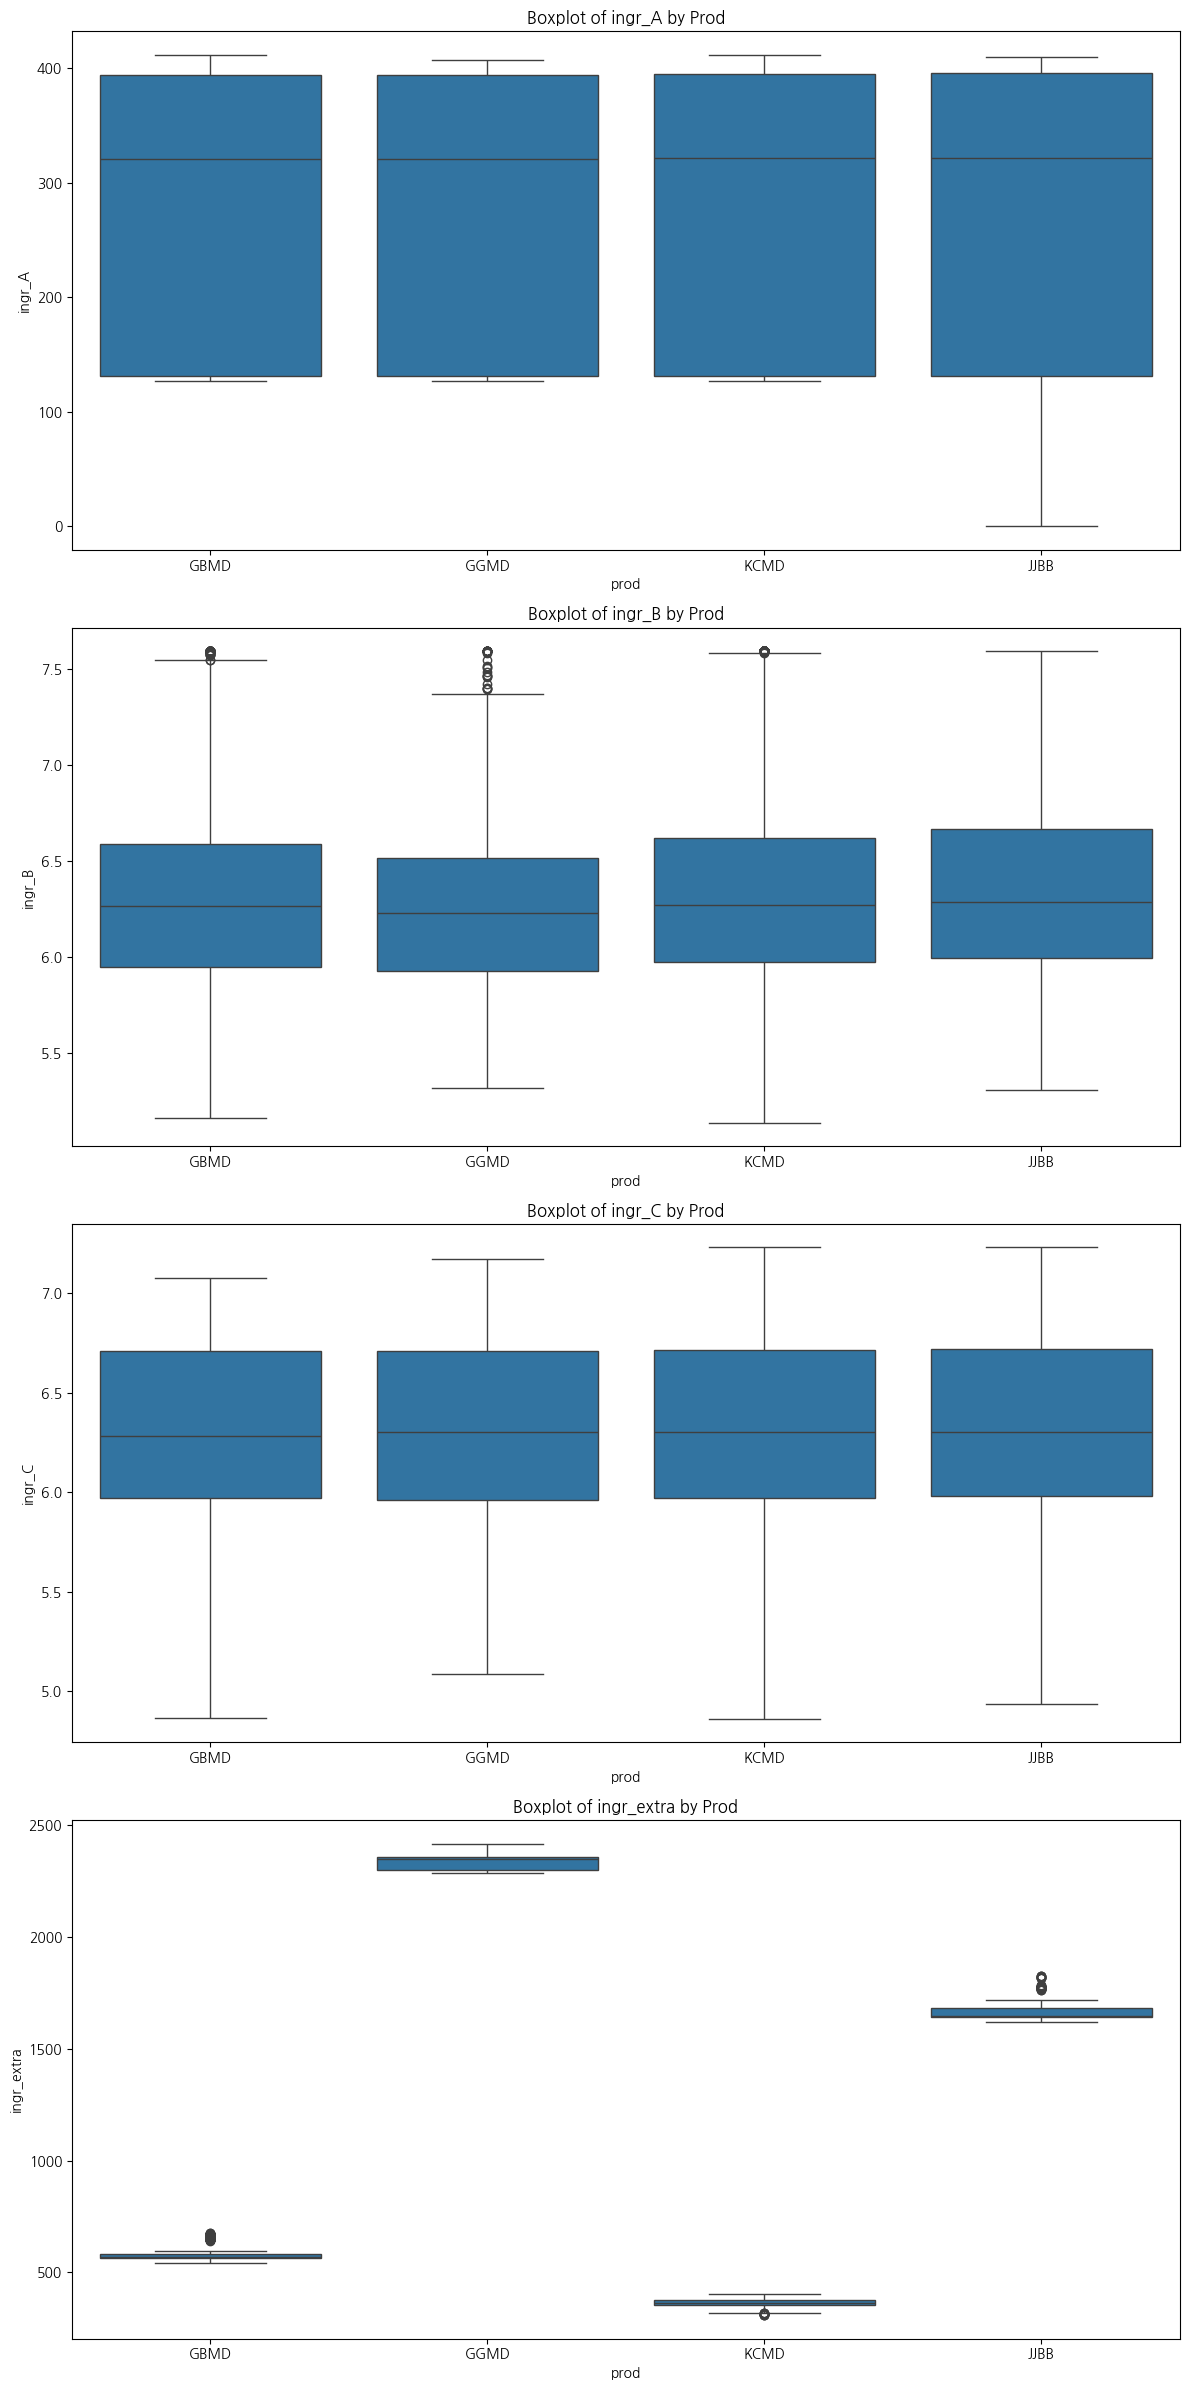

In [56]:
fig, axes = plt.subplots(4, 1, figsize=(12, 24))

# Boxplot of ingr_A
sns.boxplot(x='prod', y='ingr_A', data=df_eda, ax=axes[0])
axes[0].set_title('Boxplot of ingr_A by Prod')

# Boxplot of ingr_B
sns.boxplot(x='prod', y='ingr_B', data=df_eda, ax=axes[1])
axes[1].set_title('Boxplot of ingr_B by Prod')

# Boxplot of ingr_C
sns.boxplot(x='prod', y='ingr_C', data=df_eda, ax=axes[2])
axes[2].set_title('Boxplot of ingr_C by Prod')

# Boxplot of ingr_extra
sns.boxplot(x='prod', y='ingr_extra', data=df_eda, ax=axes[3])
axes[3].set_title('Boxplot of ingr_extra by Prod')

plt.tight_layout()

##### Each wtcd shows similar aspects in every ingr

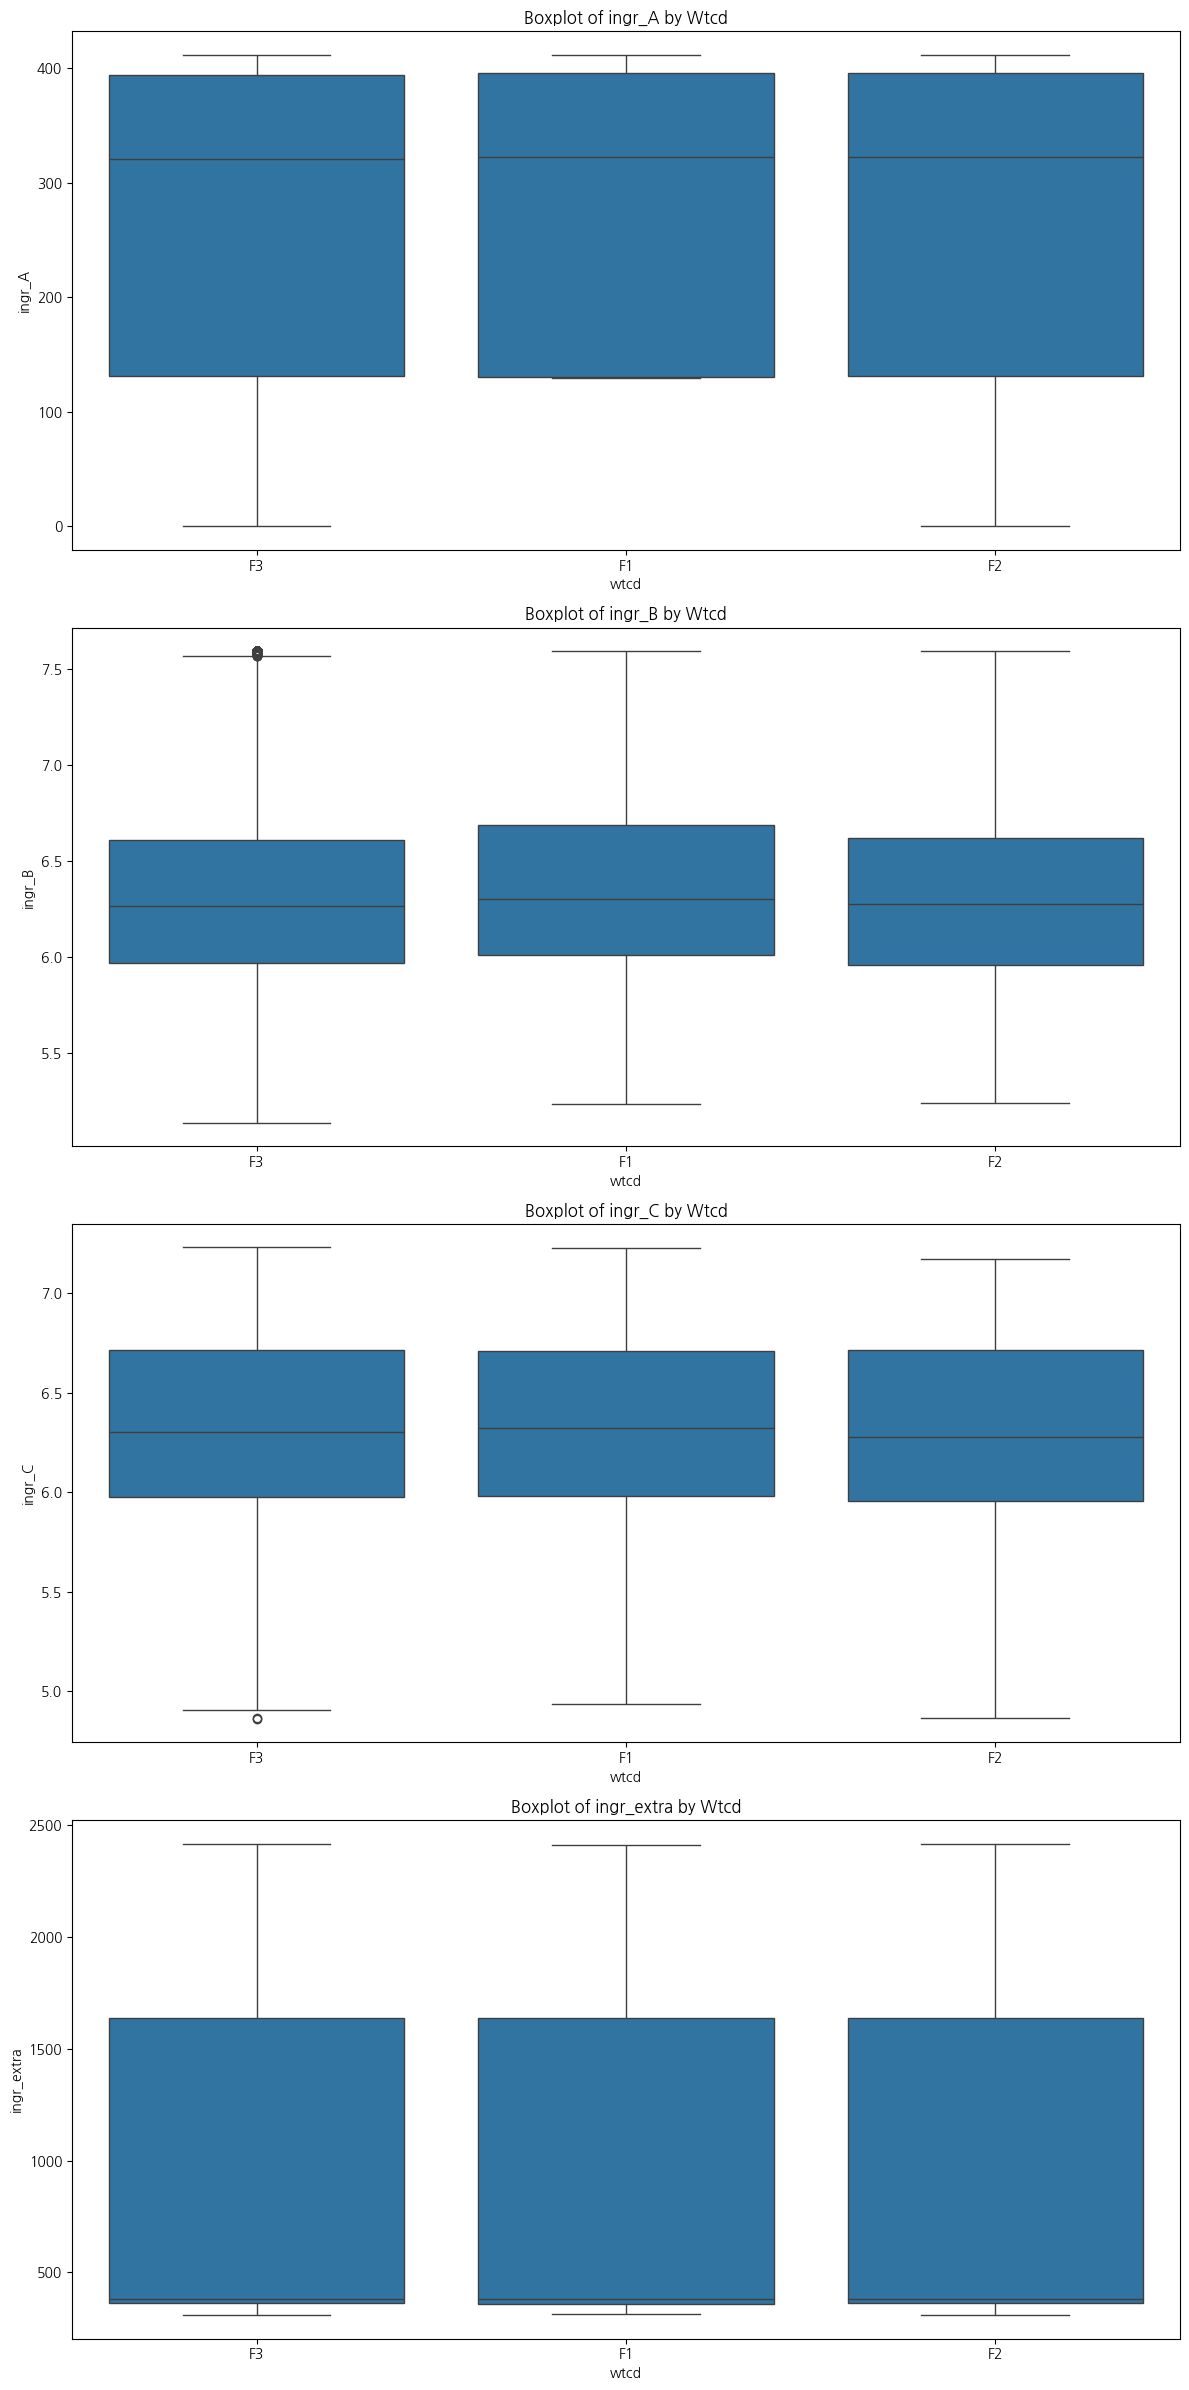

In [32]:
fig, axes = plt.subplots(4, 1, figsize=(12, 24))

# Boxplot of ingr_A by Wtcd
sns.boxplot(x='wtcd', y='ingr_A', data=df_eda, ax=axes[0])
axes[0].set_title('Boxplot of ingr_A by Wtcd')

# Boxplot of ingr_B by Wtcd
sns.boxplot(x='wtcd', y='ingr_B', data=df_eda, ax=axes[1])
axes[1].set_title('Boxplot of ingr_B by Wtcd')

# Boxplot of ingr_C by Wtcd
sns.boxplot(x='wtcd', y='ingr_C', data=df_eda, ax=axes[2])
axes[2].set_title('Boxplot of ingr_C by Wtcd')

# Boxplot of ingr_extra by Wtcd
sns.boxplot(x='wtcd', y='ingr_extra', data=df_eda, ax=axes[3])
axes[3].set_title('Boxplot of ingr_extra by Wtcd')

plt.tight_layout()

##### The ingr_extra differs depending on the place of production(origin)

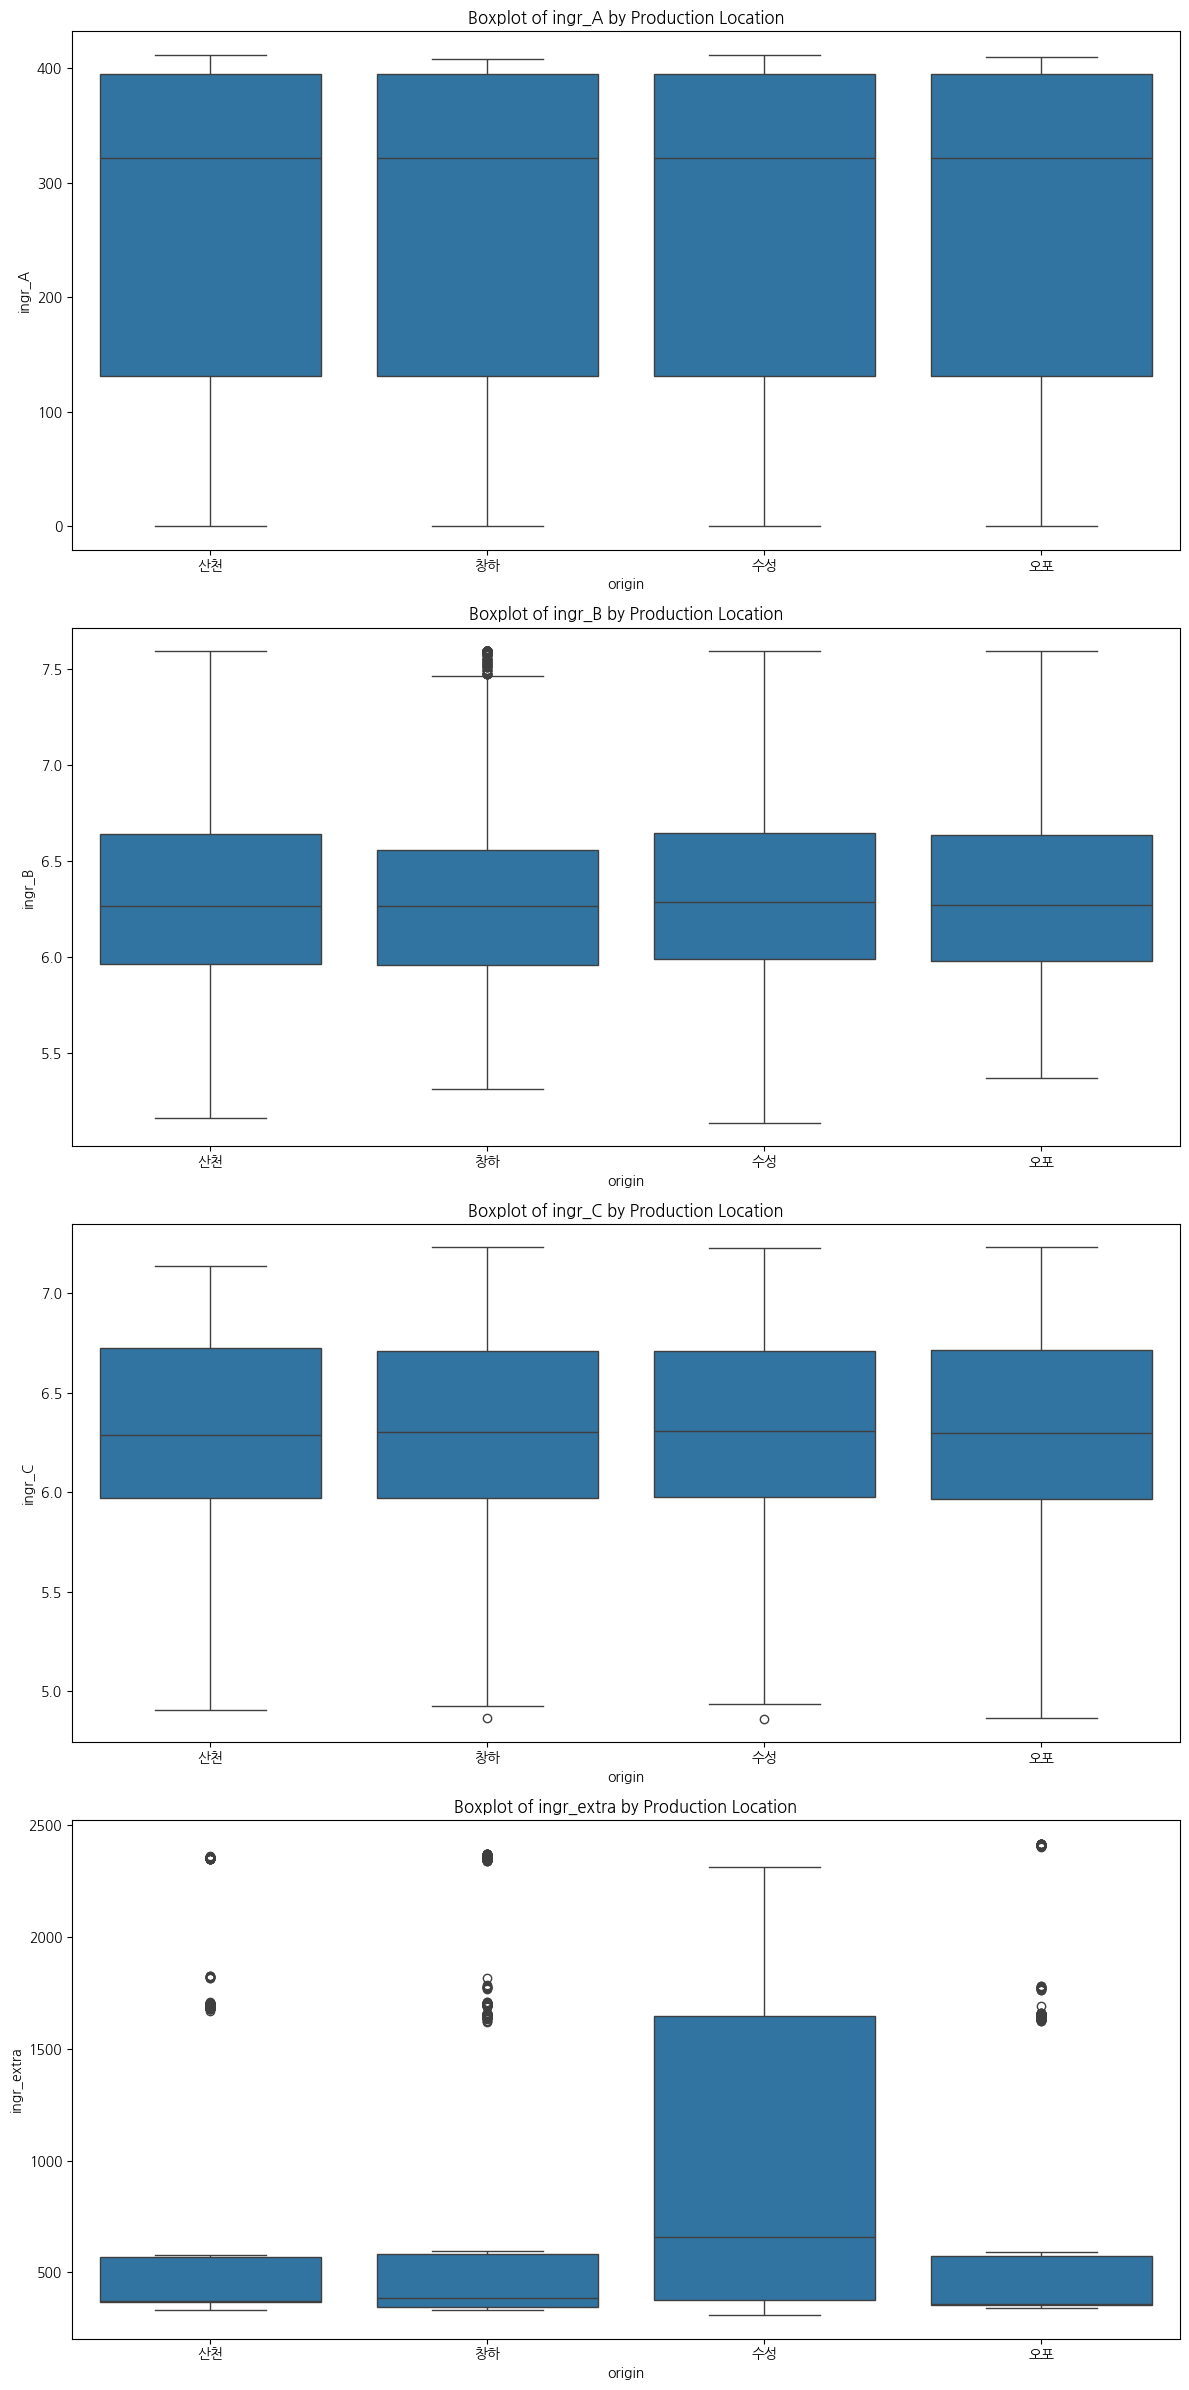

In [33]:
fig, axes = plt.subplots(4, 1, figsize=(12, 24))

# Boxplot of ingr_A by origin (Production Location)
sns.boxplot(x='origin', y='ingr_A', data=df_eda, ax=axes[0])
axes[0].set_title('Boxplot of ingr_A by Production Location')

# Boxplot of ingr_B by origin (Production Location)
sns.boxplot(x='origin', y='ingr_B', data=df_eda, ax=axes[1])
axes[1].set_title('Boxplot of ingr_B by Production Location')

# Boxplot of ingr_C by origin (Production Location)
sns.boxplot(x='origin', y='ingr_C', data=df_eda, ax=axes[2])
axes[2].set_title('Boxplot of ingr_C by Production Location')

# Boxplot of ingr_extra by origin (Production Location)
sns.boxplot(x='origin', y='ingr_extra', data=df_eda, ax=axes[3])
axes[3].set_title('Boxplot of ingr_extra by Production Location')

plt.tight_layout()


##### Except for 'ingr_extra' every ingredients have different aspects depending on the label
- We can assume that the outliers of ingr_A, B, C might have some relation with the defection

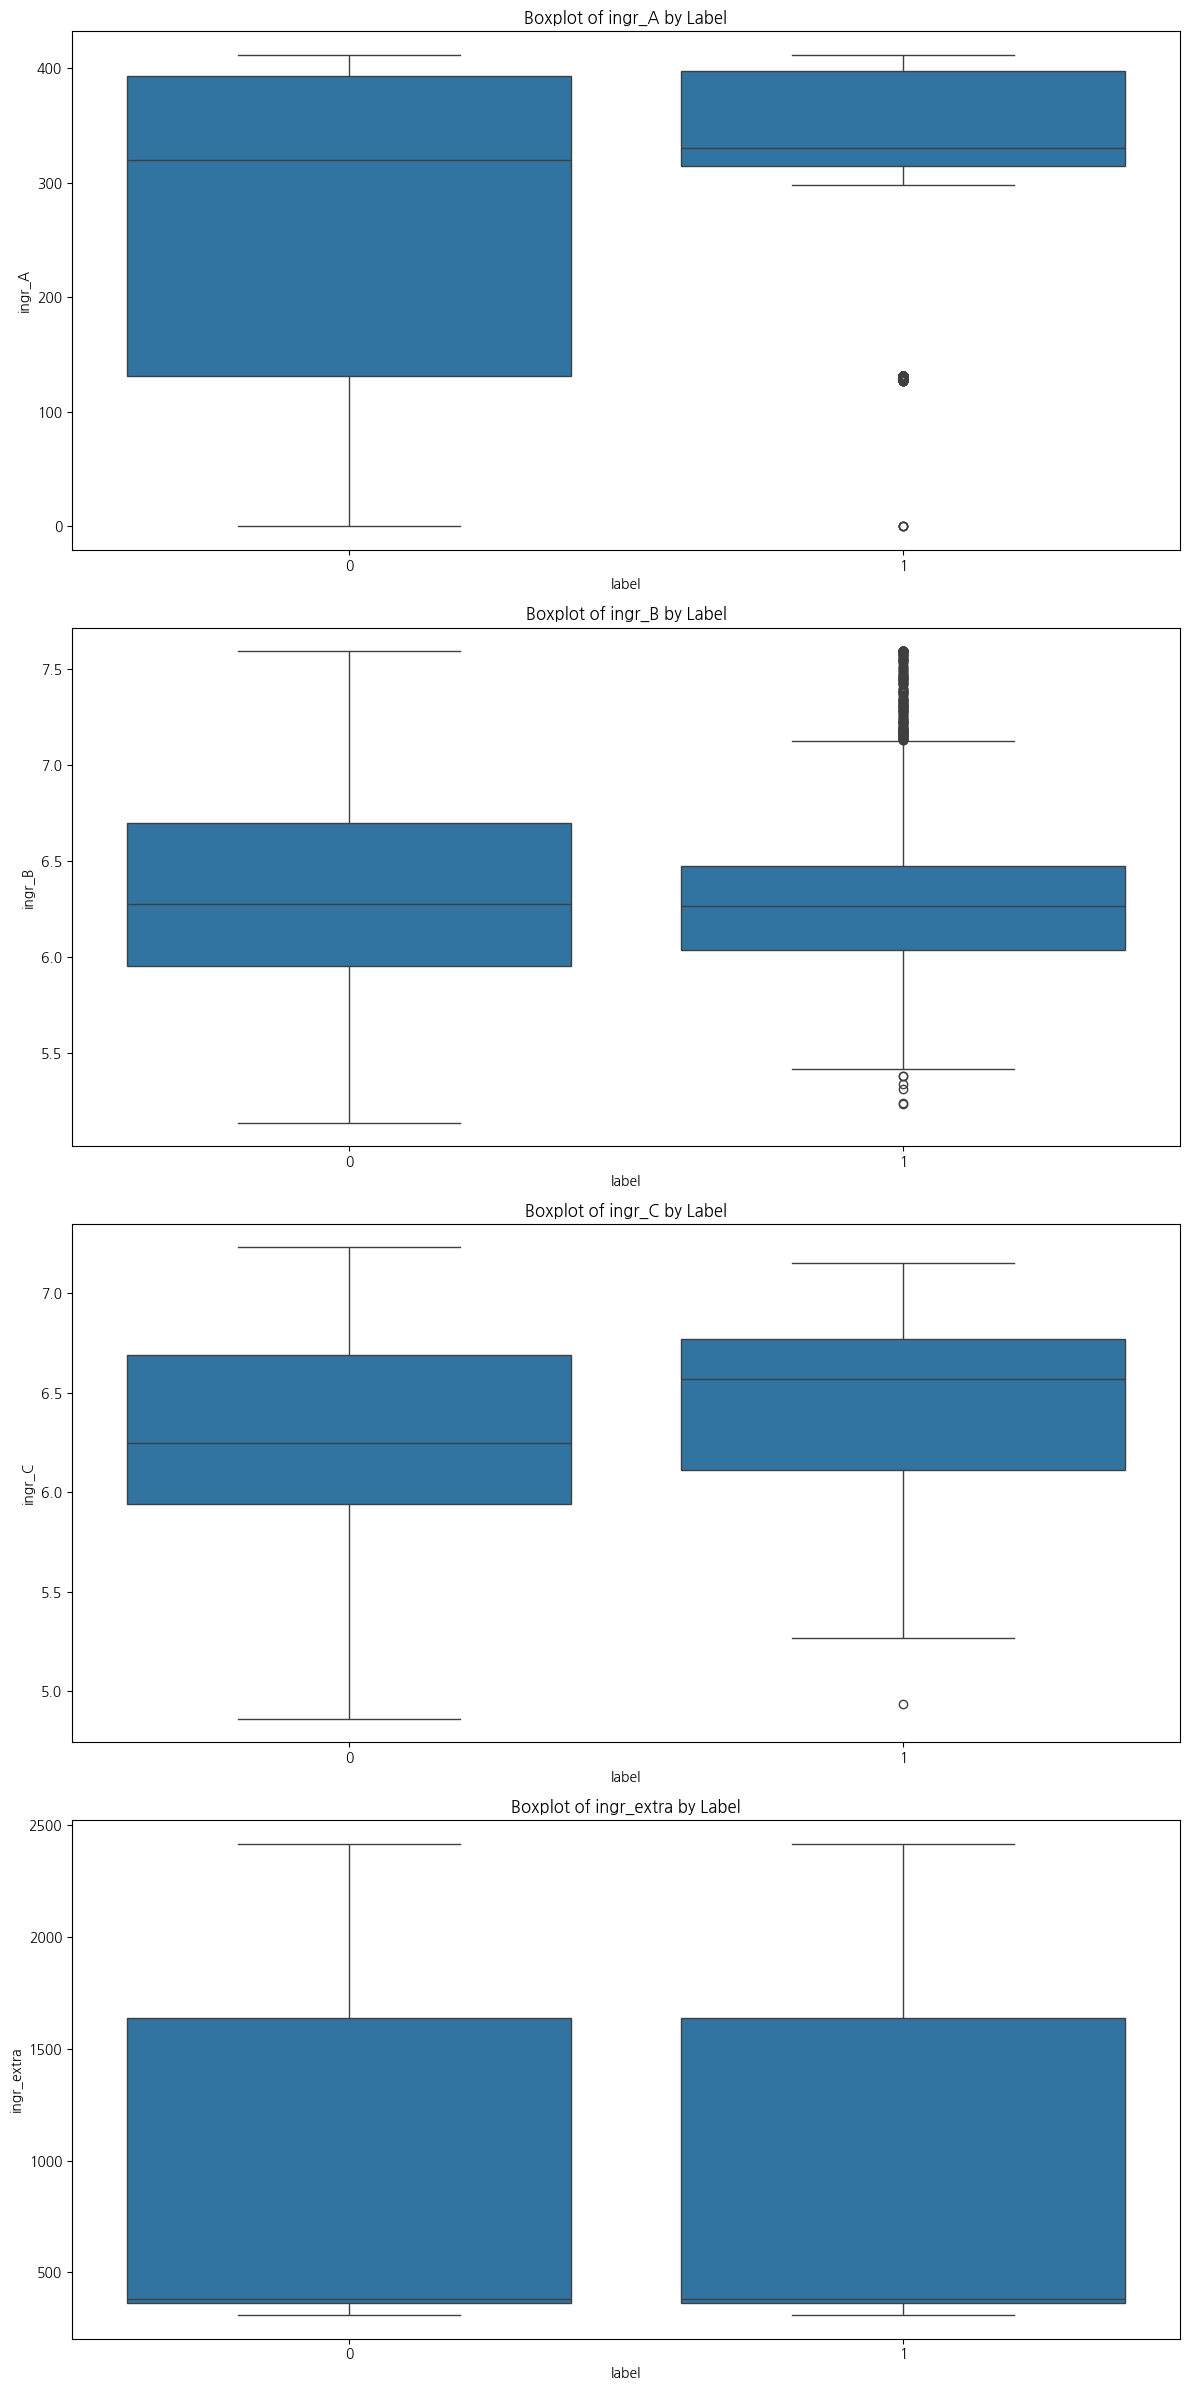

In [34]:
fig, axes = plt.subplots(4, 1, figsize=(12, 24))

# Boxplot of ingr_A by Label
sns.boxplot(x='label', y='ingr_A', data=df_eda, ax=axes[0])
axes[0].set_title('Boxplot of ingr_A by Label')

# Boxplot of ingr_B by Label
sns.boxplot(x='label', y='ingr_B', data=df_eda, ax=axes[1])
axes[1].set_title('Boxplot of ingr_B by Label')

# Boxplot of ingr_C by Label
sns.boxplot(x='label', y='ingr_C', data=df_eda, ax=axes[2])
axes[2].set_title('Boxplot of ingr_C by Label')

# Boxplot of ingr_extra by Label
sns.boxplot(x='label', y='ingr_extra', data=df_eda, ax=axes[3])
axes[3].set_title('Boxplot of ingr_extra by Label')

plt.tight_layout()

##### Misclassification Rate of each ingredients for range of ingredients

/var/folders/yg/y2p4dyr935vbz15z2bjm2m500000gn/T/ipykernel_46672/2873913312.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  misclass_rate = df_eda[df_eda['label'] == 1].groupby('bin').size() / df_eda.groupby('bin').size()
/var/folders/yg/y2p4dyr935vbz15z2bjm2m500000gn/T/ipykernel_46672/2873913312.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  misclass_rate = df_eda[df_eda['label'] == 1].groupby('bin').size() / df_eda.groupby('bin').size()
/var/folders/yg/y2p4dyr935vbz15z2bjm2m500000gn/T/ipykernel_46672/2873913312.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to 

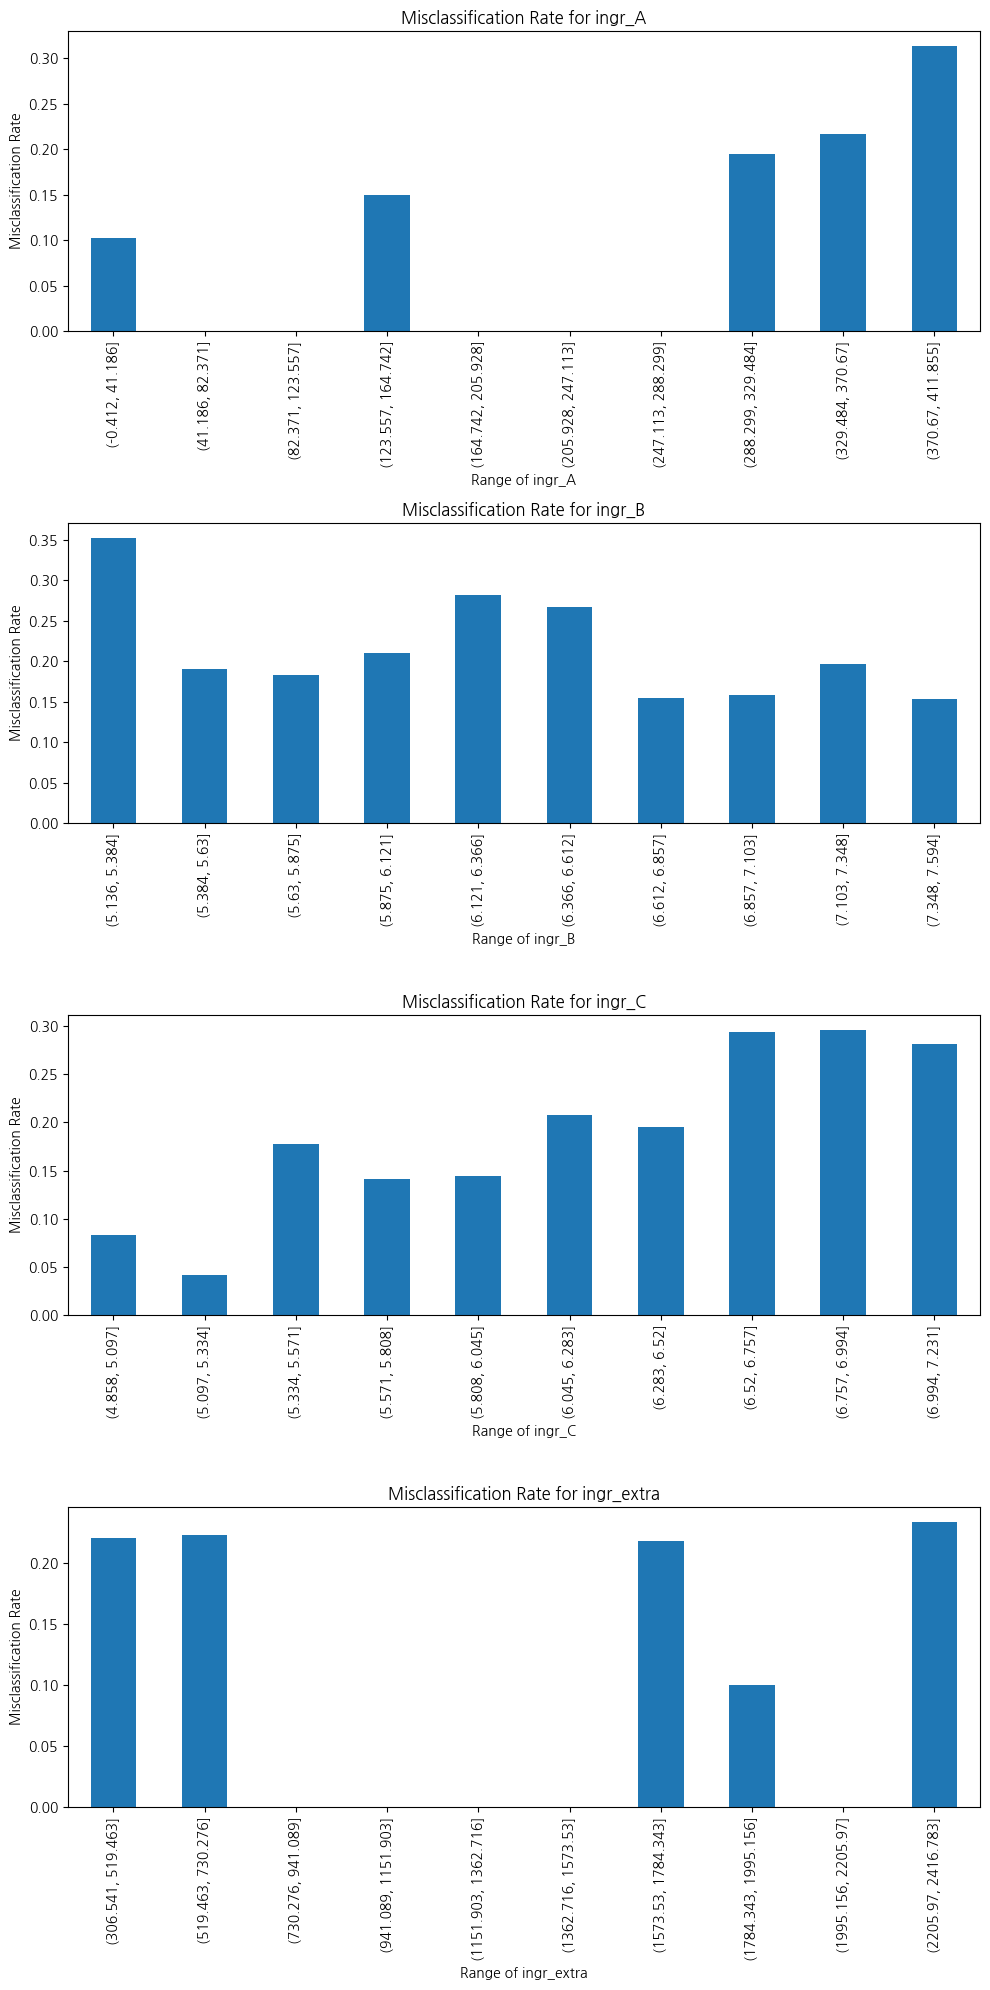

In [35]:
# Calculate and visualize misclassification rates for ingr_A, B, C, and extra
ingr_columns = ['ingr_A', 'ingr_B', 'ingr_C', 'ingr_extra']
fig, axes = plt.subplots(len(ingr_columns), 1, figsize=(10, 20))

for i, column in enumerate(ingr_columns):
    # Divide into appropriate bins and calculate misclassification rate
    df_eda['bin'] = pd.cut(df_eda[column], bins=10)
    misclass_rate = df_eda[df_eda['label'] == 1].groupby('bin').size() / df_eda.groupby('bin').size()
    misclass_rate.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Misclassification Rate for {column}')
    axes[i].set_xlabel(f'Range of {column}')
    axes[i].set_ylabel('Misclassification Rate')

plt.tight_layout()
plt.show()

##### Each ingredients by Season for label both 0 and 1

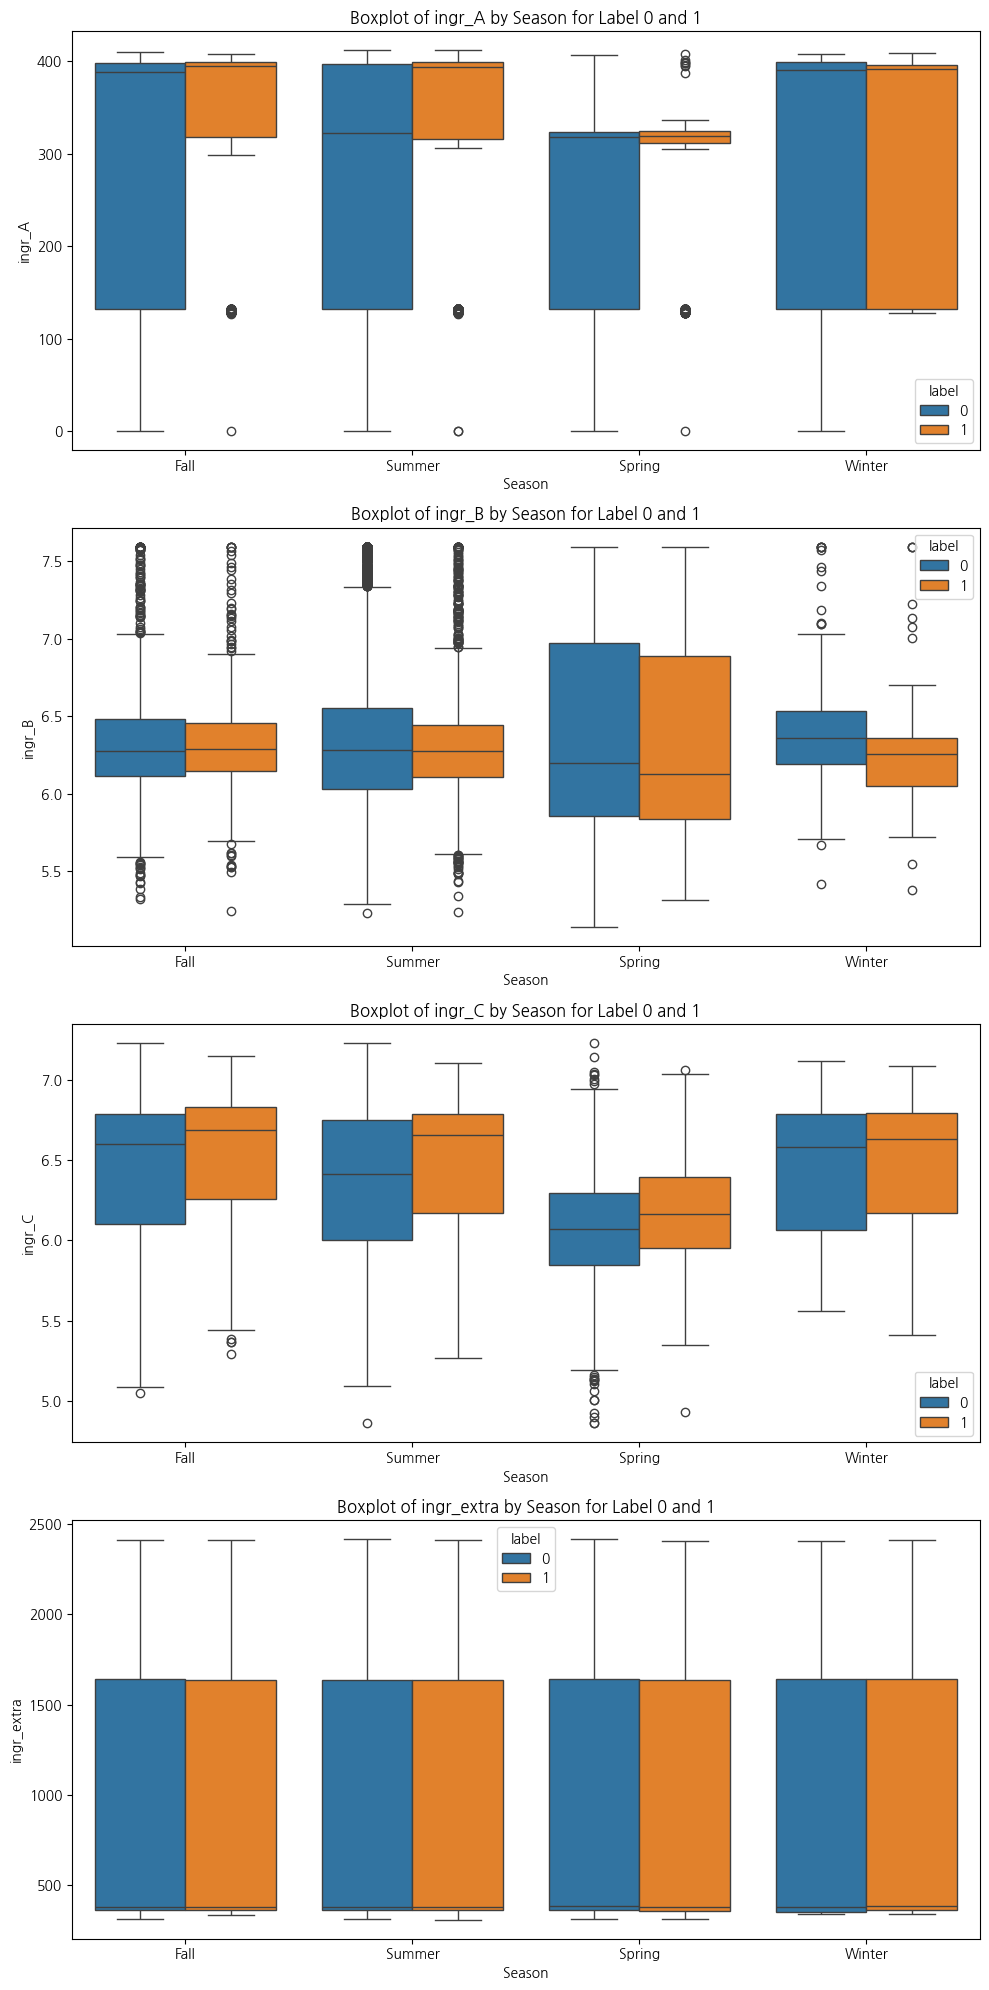

In [36]:
# Boxplot for each of ingr_A, ingr_B, ingr_C, and ingr_extra based on label 0 and 1
ingr_columns = ['ingr_A', 'ingr_B', 'ingr_C', 'ingr_extra']
fig, axes = plt.subplots(len(ingr_columns), 1, figsize=(10, 20))

for i, column in enumerate(ingr_columns):
    # Boxplot of the ingredient content for each season (for label 0 and 1)
    sns.boxplot(x='buydate_season', y=column, hue='label', data=df_eda, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} by Season for Label 0 and 1')
    axes[i].set_xlabel('Season')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

### EDA : focus on 'wtcd'

##### The misclassification happens most when wtcd is F2

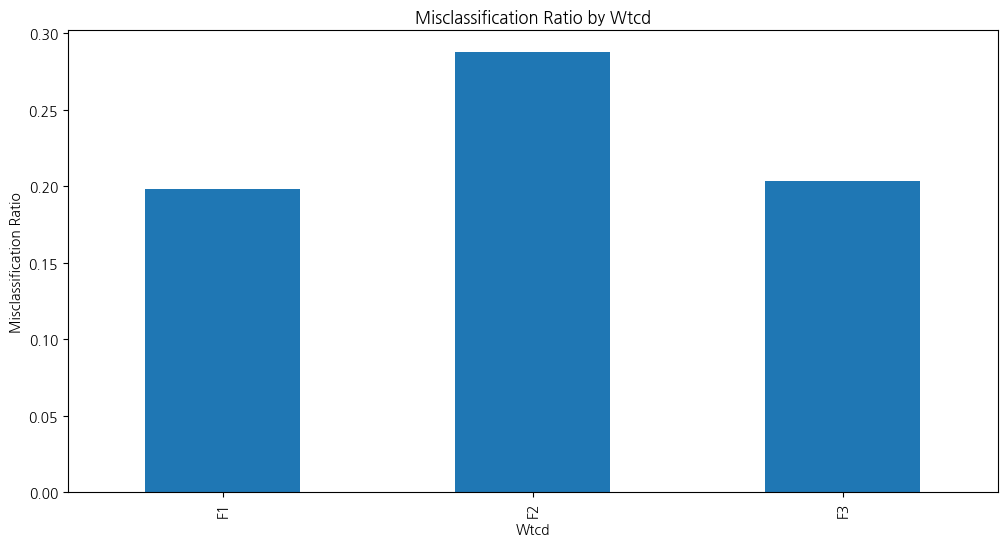

In [37]:
# Calculate misclassification rate by wtcd
label_misclass_by_wtcd = df_eda[df_eda['label'] == 1].groupby('wtcd').size() / df_eda.groupby('wtcd').size()

# Visualization
plt.figure(figsize=(12, 6))
label_misclass_by_wtcd.plot(kind='bar')
plt.title('Misclassification Ratio by Wtcd')
plt.ylabel('Misclassification Ratio')
plt.xlabel('Wtcd')
plt.show()


##### The durartion distribution differs for each wtcd per label

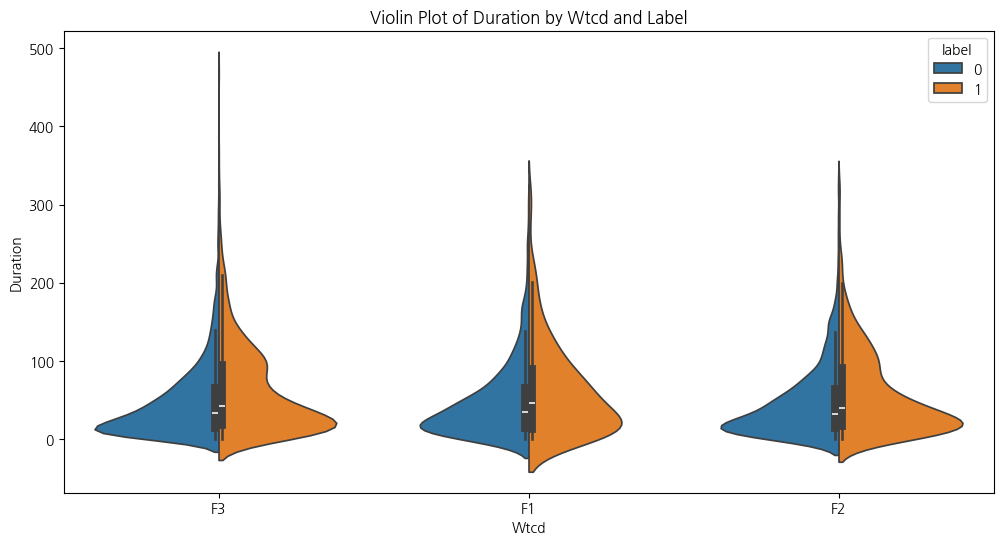

In [38]:
# Setup for visualization
plt.figure(figsize=(12, 6))

# Plot violin plot with wtcd on the x-axis, duration on the y-axis, and split by label
sns.violinplot(x='wtcd', y='duration', hue='label', data=df_eda, split=True)

# Set graph title and axis labels
plt.title('Violin Plot of Duration by Wtcd and Label')
plt.xlabel('Wtcd')
plt.ylabel('Duration')

# Display the plot
plt.show()

### EDA : focus on 'gram'

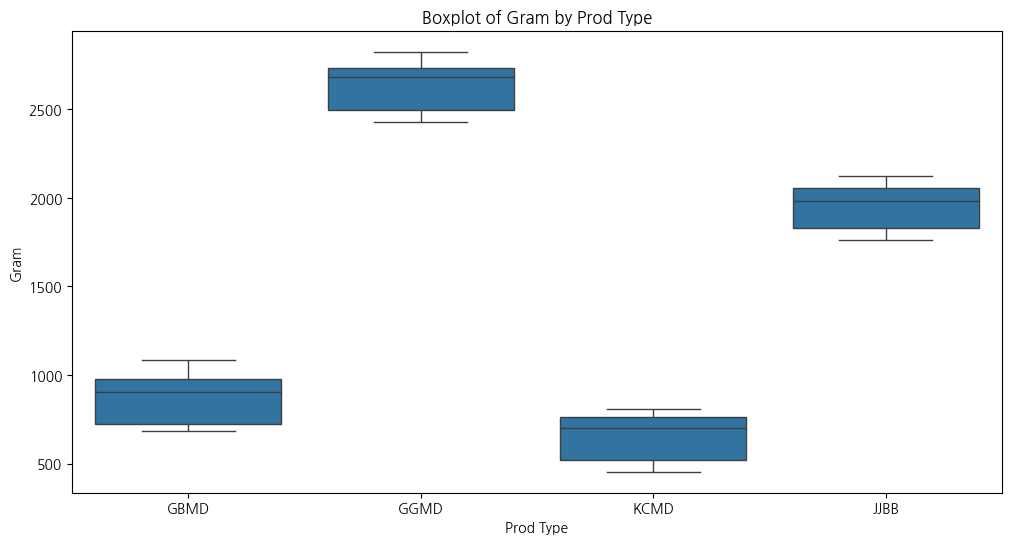

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='prod', y='gram', data=df_eda)
plt.title('Boxplot of Gram by Prod Type')
plt.xlabel('Prod Type')
plt.ylabel('Gram')
plt.show()

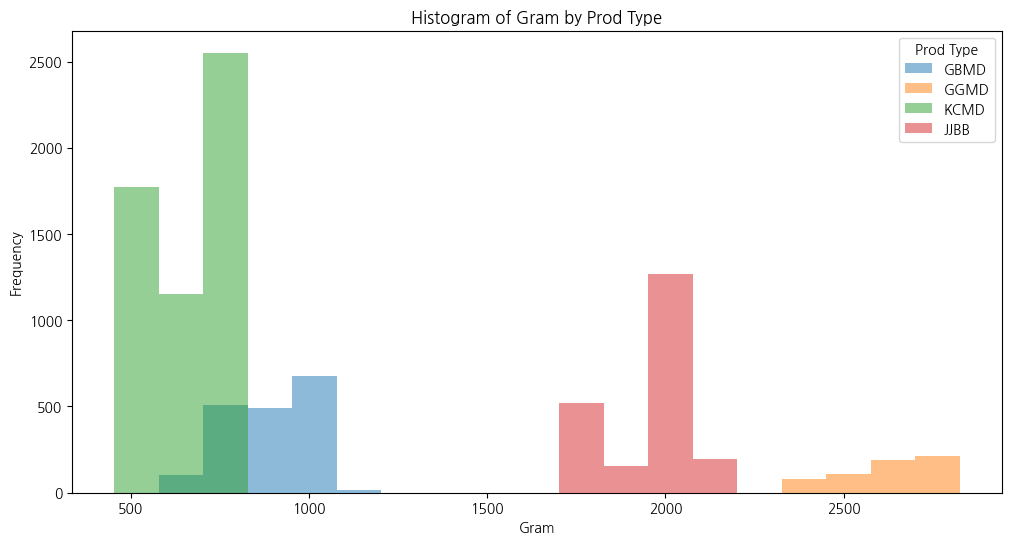

In [66]:
# Set bins to divide the data based on 'gram'
bins = np.linspace(df_eda['gram'].min(), df_eda['gram'].max(), num=20)

# Plot histograms by 'prod' type
plt.figure(figsize=(12, 6))
for prod_type in df_eda['prod'].unique():
    subset = df_eda[df_eda['prod'] == prod_type]
    plt.hist(subset['gram'], bins=bins, alpha=0.5, label=str(prod_type))

plt.title('Histogram of Gram by Prod Type')
plt.xlabel('Gram')
plt.ylabel('Frequency')
plt.legend(title='Prod Type')
plt.show()

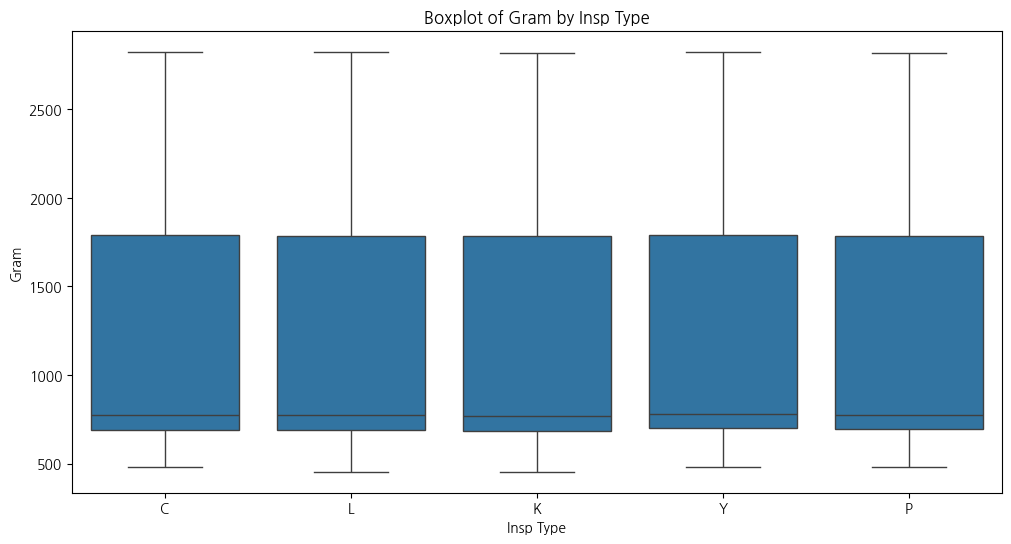

In [67]:
# Boxplot of gram by Insp type
plt.figure(figsize=(12, 6))
sns.boxplot(x='insp', y='gram', data=df_eda)
plt.title('Boxplot of Gram by Insp Type')
plt.xlabel('Insp Type')
plt.ylabel('Gram')
plt.show()

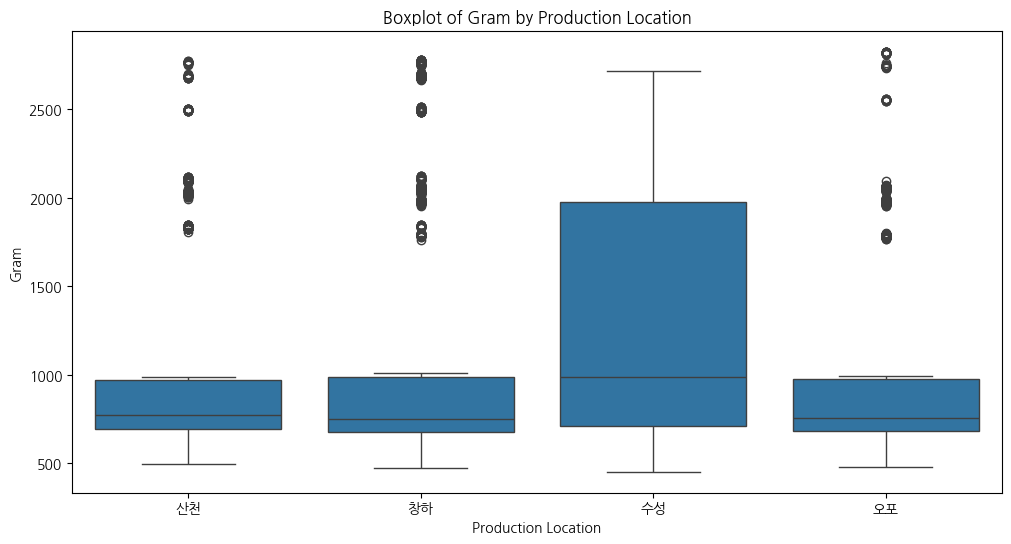

In [69]:
# Boxplot of gram by production location
plt.figure(figsize=(12, 6))
sns.boxplot(x='origin', y='gram', data=df_eda)
plt.title('Boxplot of Gram by Production Location')
plt.xlabel('Production Location')
plt.ylabel('Gram')
plt.show()


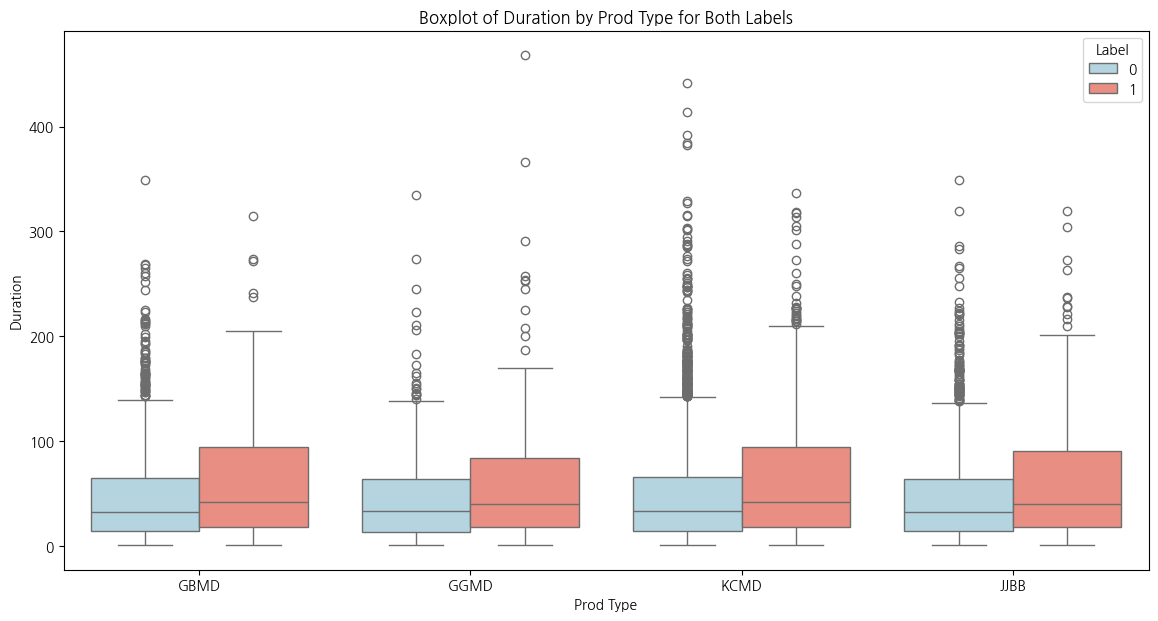

In [70]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='prod', y='duration', hue='label', data=df_eda, palette=['lightblue', 'salmon'])
plt.title('Boxplot of Duration by Prod Type for Both Labels')
plt.xlabel('Prod Type')
plt.ylabel('Duration')
plt.legend(title='Label')
plt.show()

### EDA : focus on 'origin'

##### The number of defective products is about similar in each origin

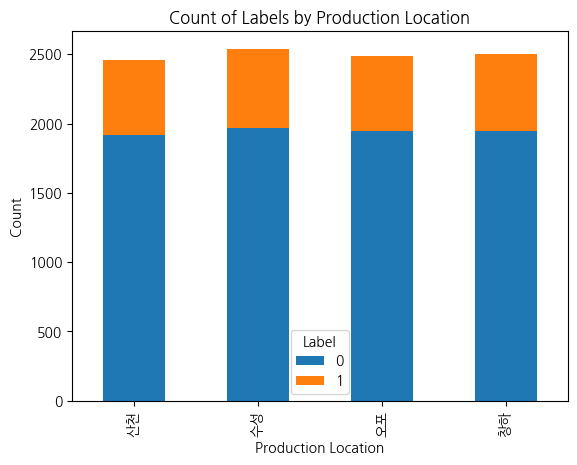

In [39]:
production_label_counts = df_eda.groupby(['origin', 'label']).size().unstack(fill_value=0)

# Plot the count of labels by production location
production_label_counts.plot(kind='bar', stacked=True)
plt.title('Count of Labels by Production Location')
plt.xlabel('Production Location')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()


### EDA : focus on 'A/B/C/extra_P'

/var/folders/yg/y2p4dyr935vbz15z2bjm2m500000gn/T/ipykernel_46672/2958039646.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  misclass_rate = df_eda[df_eda['label'] == 1].groupby('bin').size() / df_eda.groupby('bin').size()
/var/folders/yg/y2p4dyr935vbz15z2bjm2m500000gn/T/ipykernel_46672/2958039646.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  misclass_rate = df_eda[df_eda['label'] == 1].groupby('bin').size() / df_eda.groupby('bin').size()
/var/folders/yg/y2p4dyr935vbz15z2bjm2m500000gn/T/ipykernel_46672/2958039646.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to 

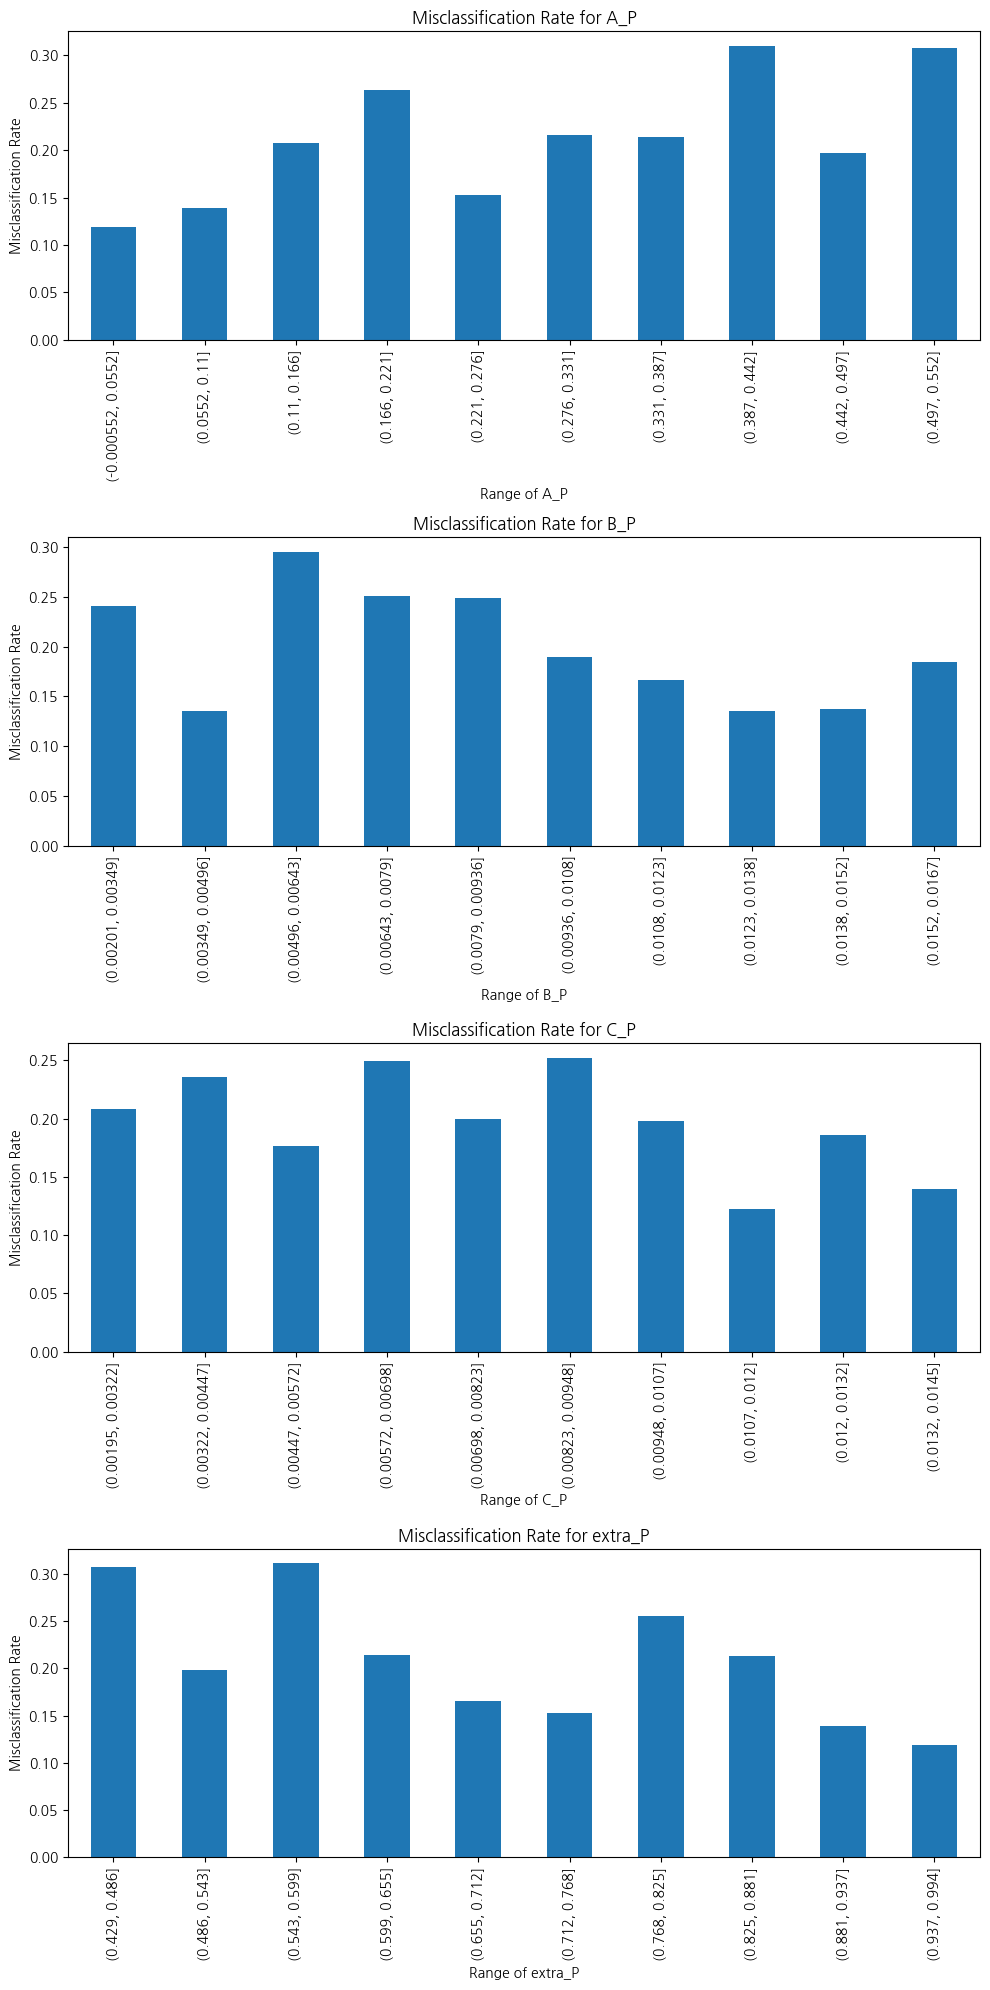

In [40]:
# Calculate and visualize misclassification rates for ingr_A, B, C, and extra
ingr_columns = ['A_P', 'B_P', 'C_P', 'extra_P']
fig, axes = plt.subplots(len(ingr_columns), 1, figsize=(10, 20))

for i, column in enumerate(ingr_columns):
    # Divide into appropriate bins and calculate misclassification rate
    df_eda['bin'] = pd.cut(df_eda[column], bins=10)
    misclass_rate = df_eda[df_eda['label'] == 1].groupby('bin').size() / df_eda.groupby('bin').size()
    misclass_rate.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Misclassification Rate for {column}')
    axes[i].set_xlabel(f'Range of {column}')
    axes[i].set_ylabel('Misclassification Rate')

plt.tight_layout()
plt.show()

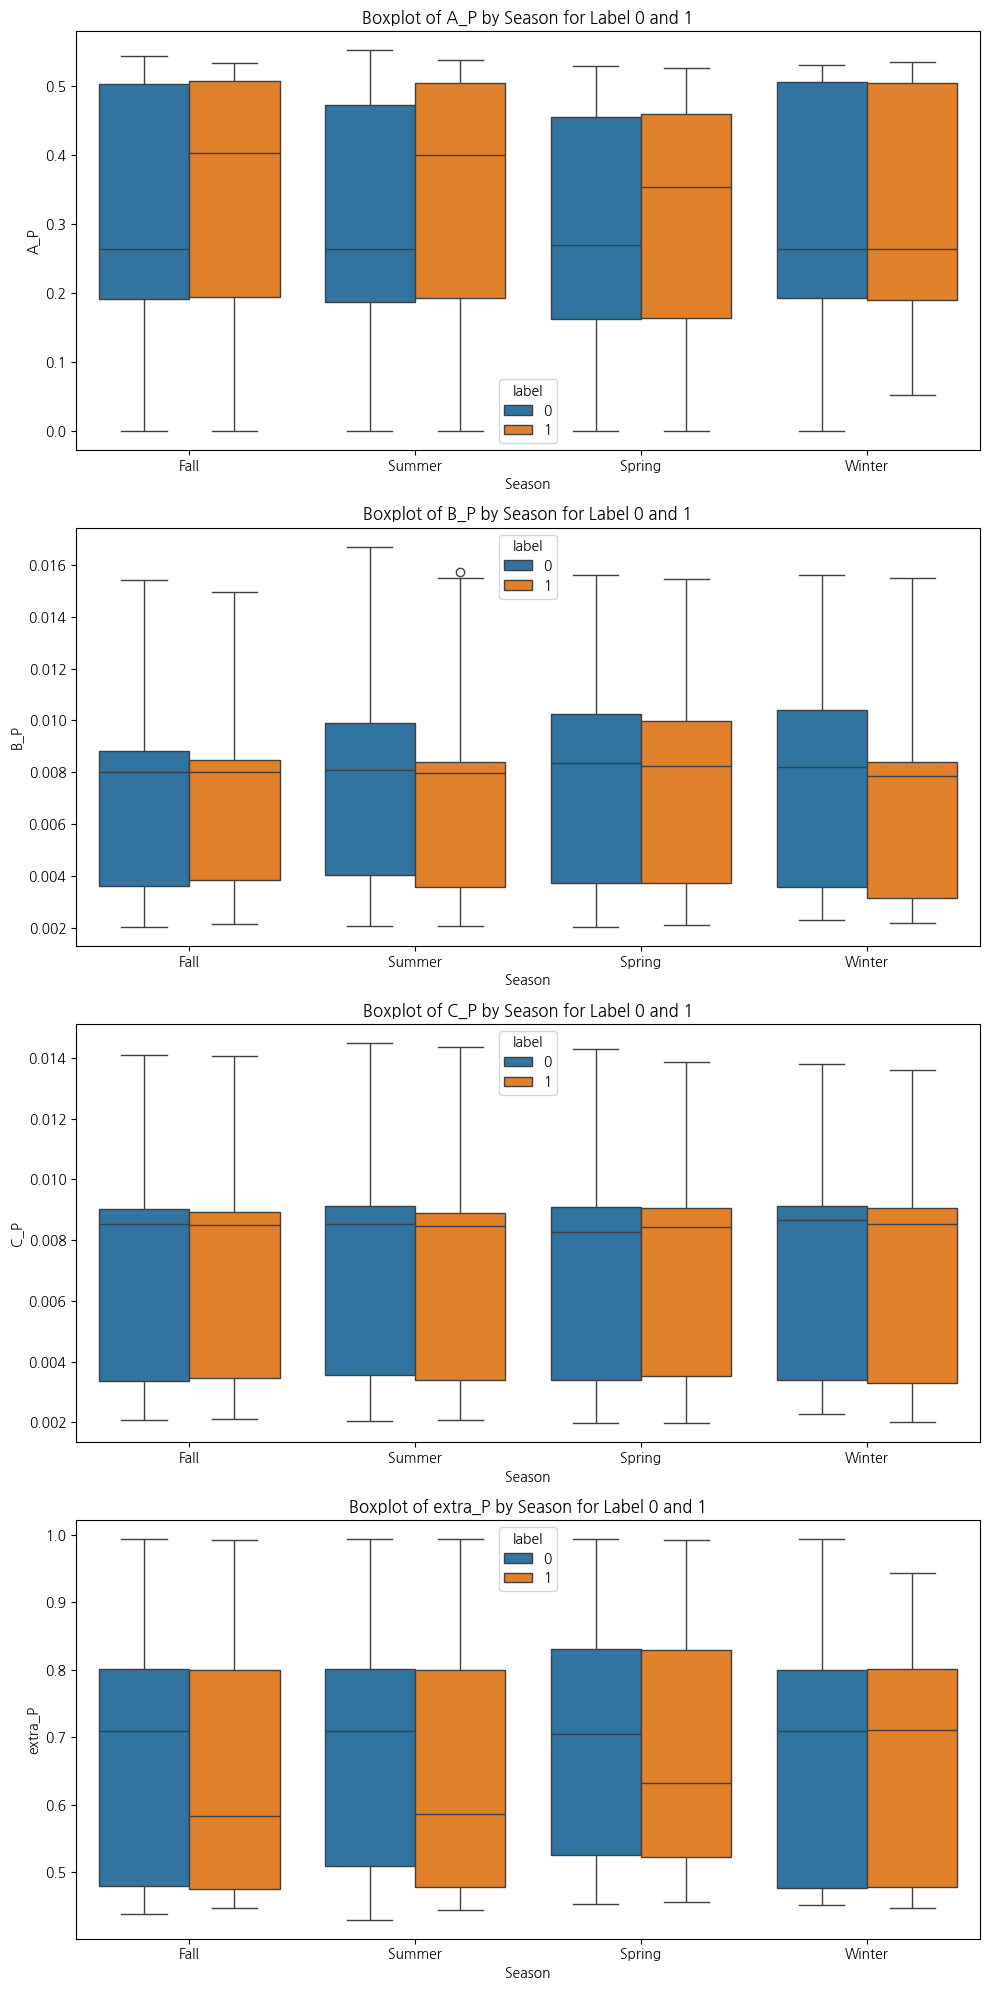

In [41]:
# Boxplot for each of A_P, B_P, C_P, and extra_P based on label 0 and 1
ingr_columns = ['A_P', 'B_P', 'C_P', 'extra_P']
fig, axes = plt.subplots(len(ingr_columns), 1, figsize=(10, 20))

for i, column in enumerate(ingr_columns):
    # Boxplot of the ingredient content for each season (for label 0 and 1)
    sns.boxplot(x='buydate_season', y=column, hue='label', data=df_eda, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} by Season for Label 0 and 1')
    axes[i].set_xlabel('Season')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

##### The content ratio of A and extra is statistically significant
- 3 %p difference

In [42]:
# Calculate the mean ratios for each label
mean_ratios = df_eda.groupby('label')[['A_P', 'B_P', 'C_P', 'extra_P']].mean()

# Print the calculated mean ratios
print(mean_ratios)

            A_P       B_P       C_P   extra_P
label                                        
0      0.312052  0.007724  0.007556  0.672667
1      0.342179  0.007261  0.007325  0.643234


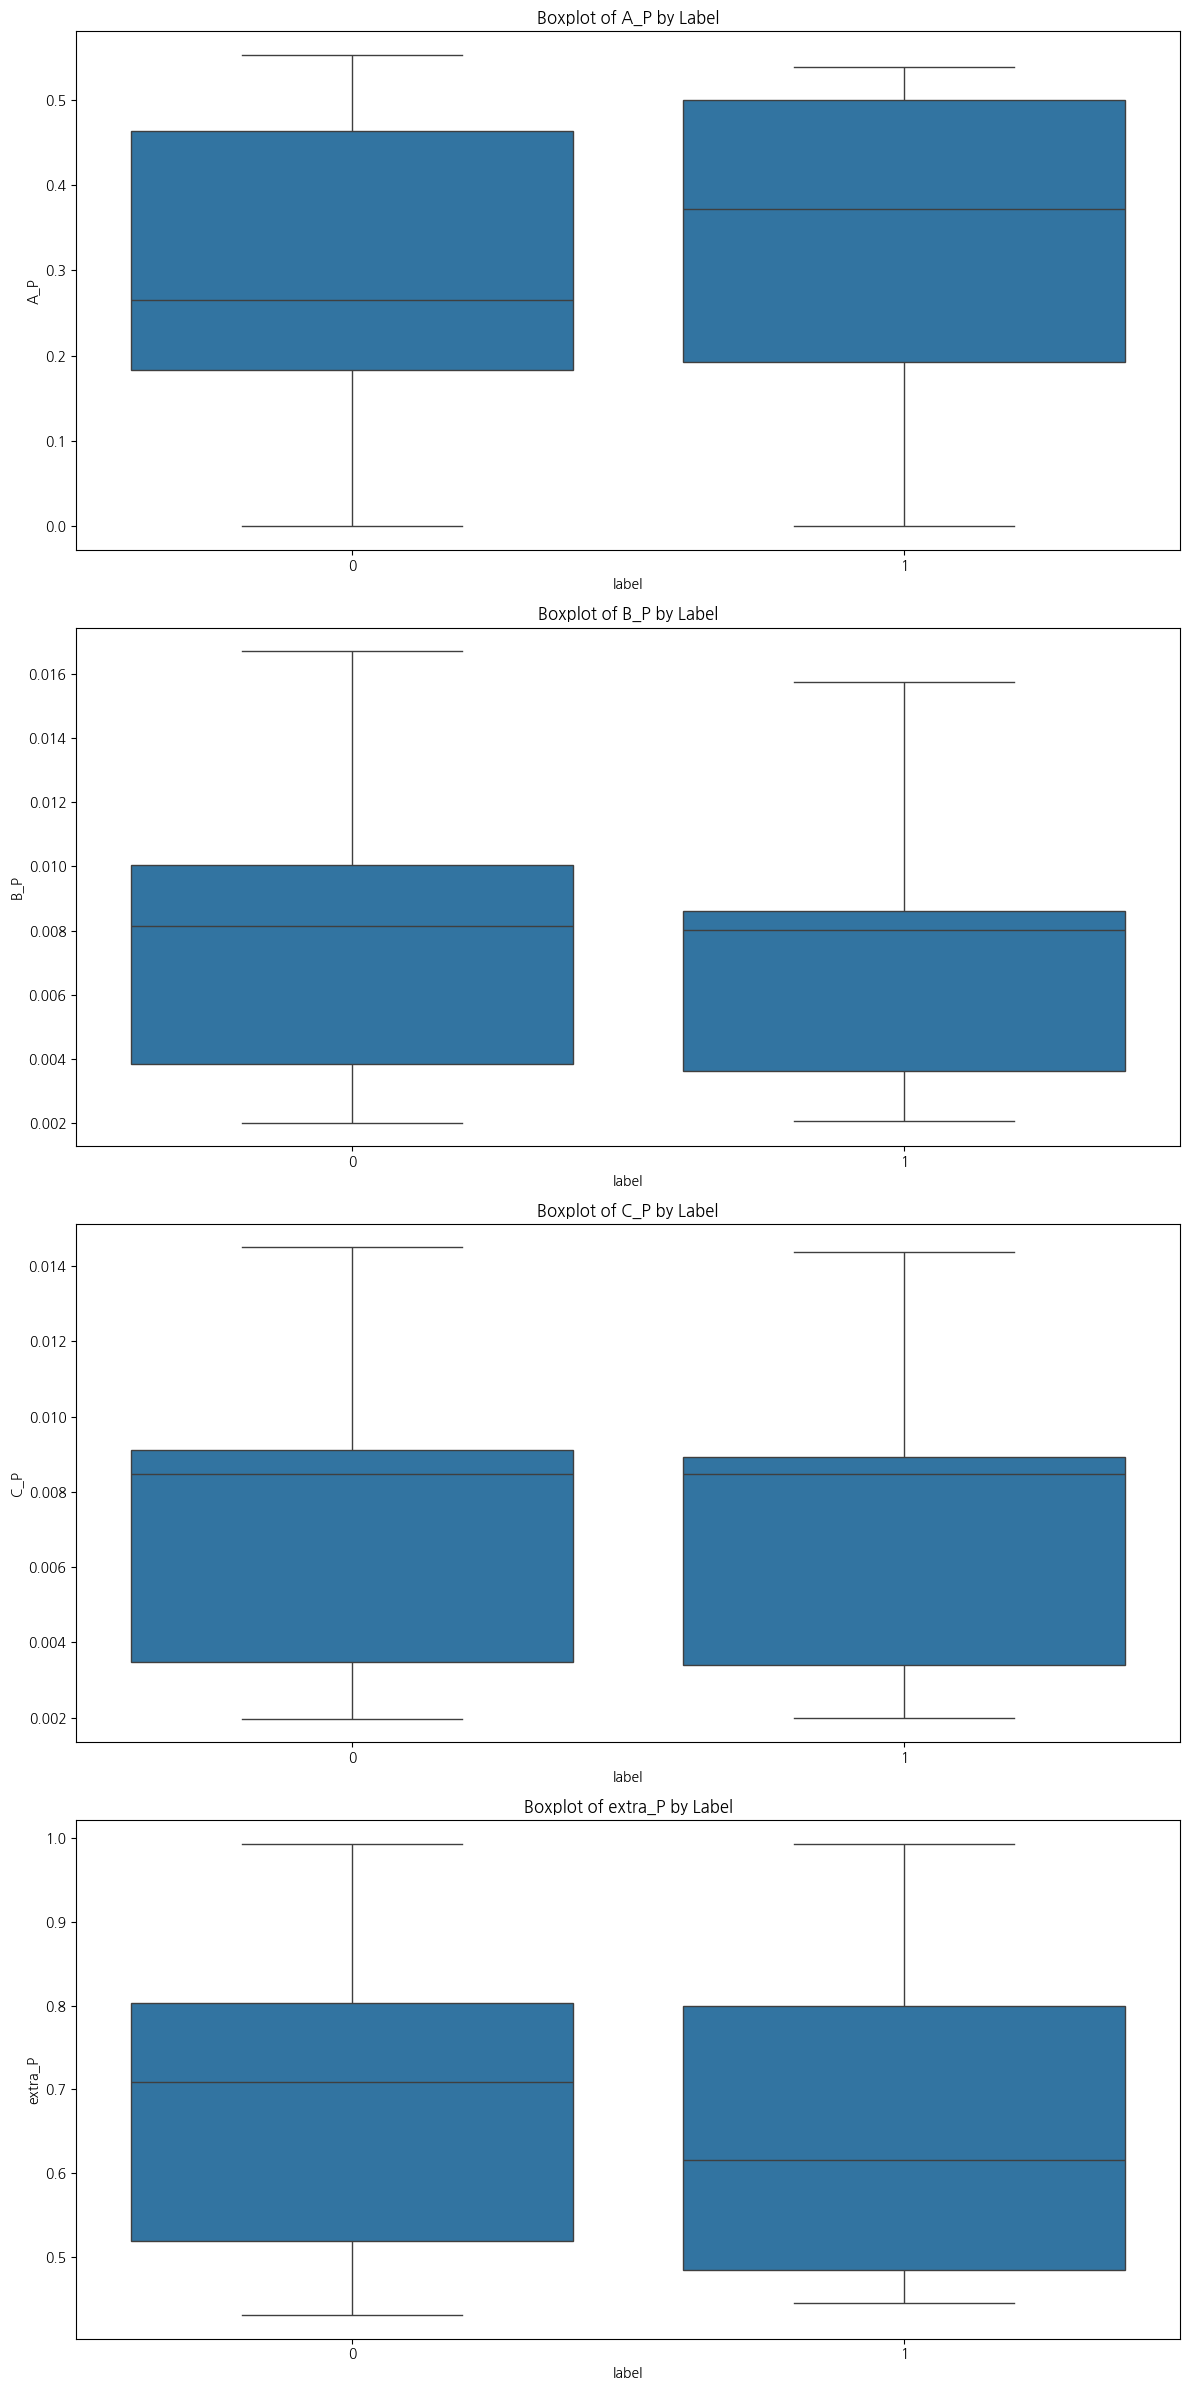

In [43]:
fig, axes = plt.subplots(4, 1, figsize=(12, 24))

# Boxplot of A_P by Label
sns.boxplot(x='label', y='A_P', data=df_eda, ax=axes[0])
axes[0].set_title('Boxplot of A_P by Label')

# Boxplot of B_P by Label
sns.boxplot(x='label', y='B_P', data=df_eda, ax=axes[1])
axes[1].set_title('Boxplot of B_P by Label')

# Boxplot of C_P by Label
sns.boxplot(x='label', y='C_P', data=df_eda, ax=axes[2])
axes[2].set_title('Boxplot of C_P by Label')

# Boxplot of extra_P by Label
sns.boxplot(x='label', y='extra_P', data=df_eda, ax=axes[3])
axes[3].set_title('Boxplot of extra_P by Label')

plt.tight_layout()

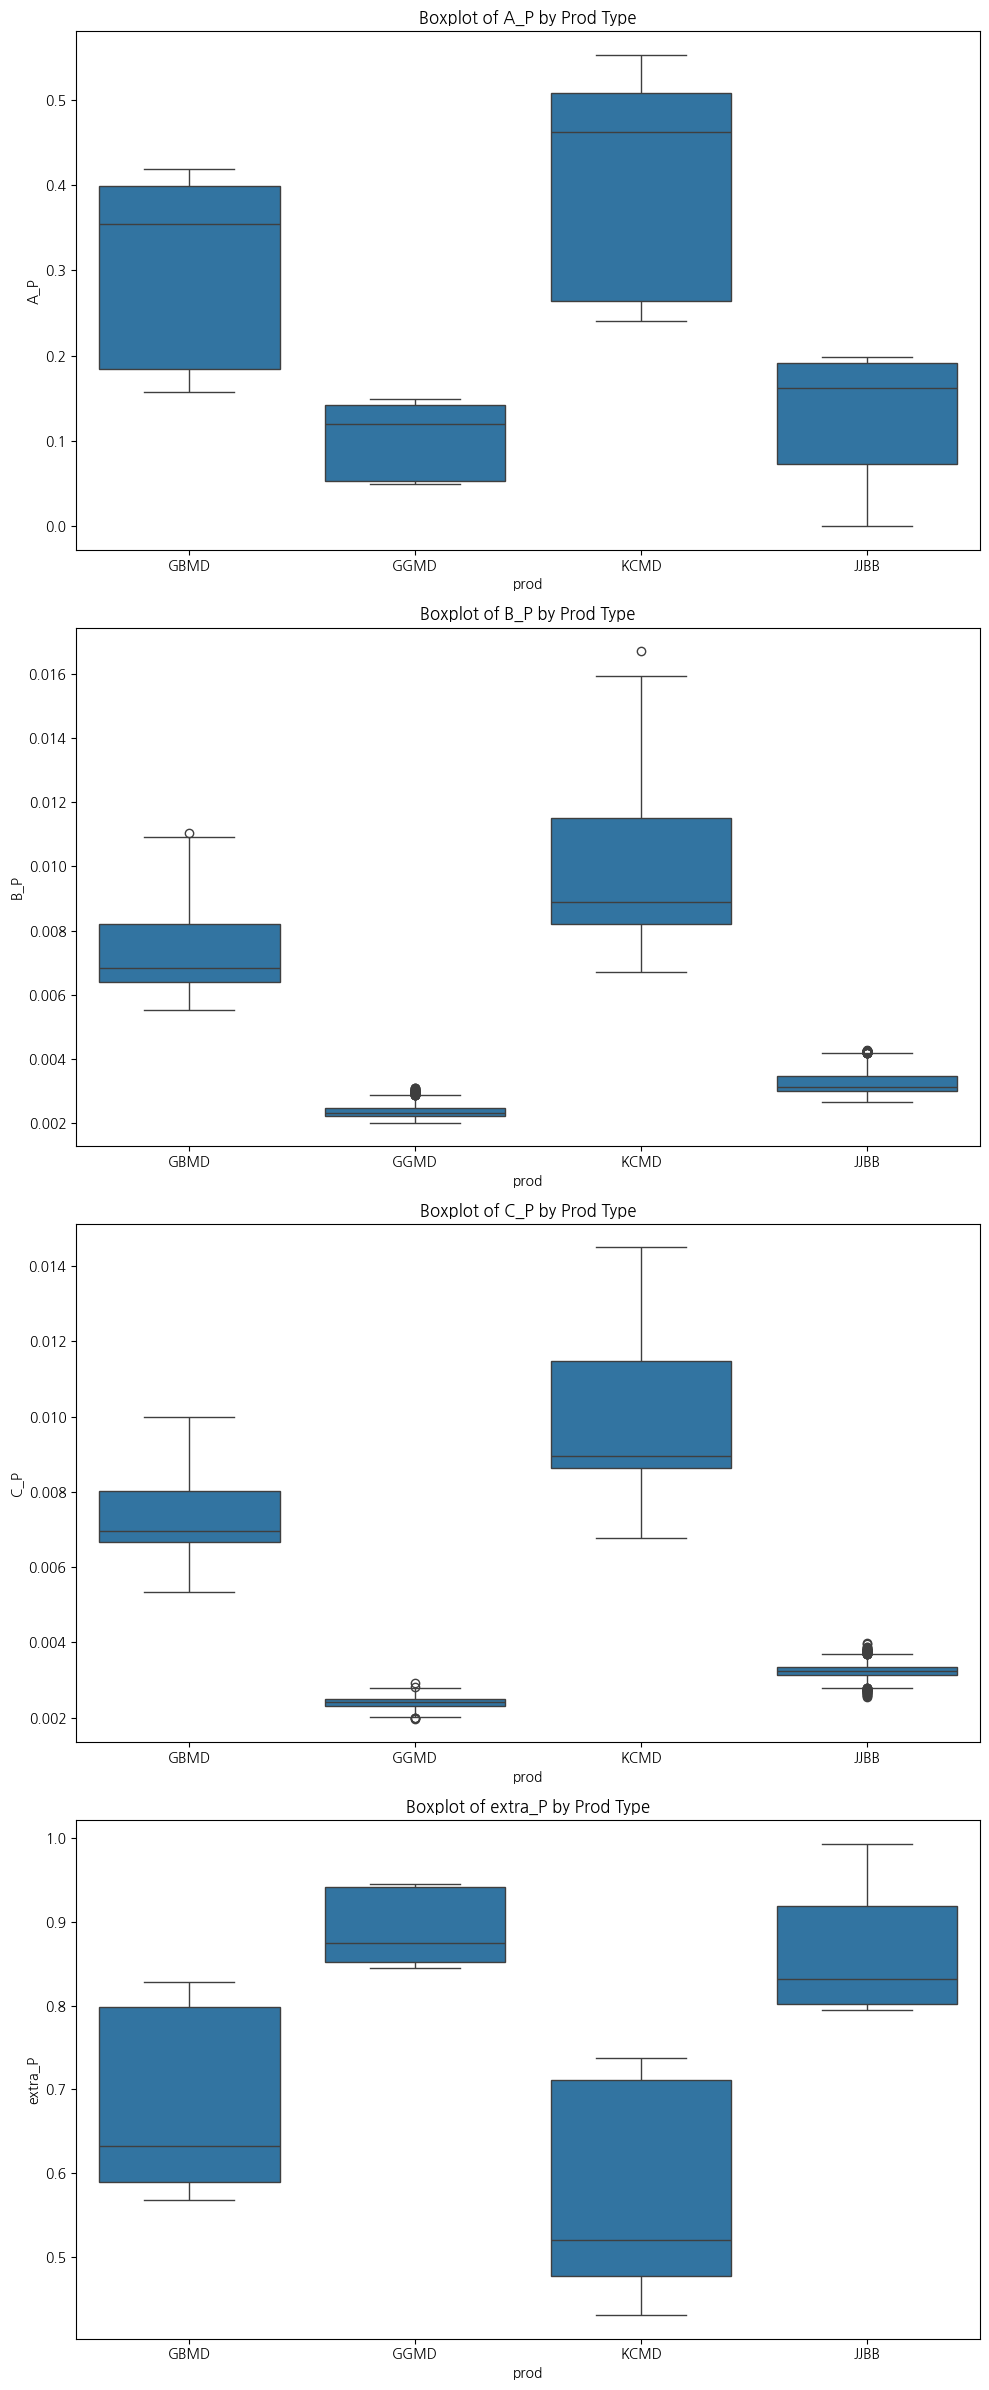

In [44]:
ingredients = ['A_P', 'B_P', 'C_P', 'extra_P']
fig, axes = plt.subplots(len(ingredients), 1, figsize=(10, 6 * len(ingredients)))

for i, ingr in enumerate(ingredients):
    sns.boxplot(x='prod', y=ingr, data=df_eda, ax=axes[i])
    axes[i].set_title(f'Boxplot of {ingr} by Prod Type')

plt.tight_layout()
plt.show()

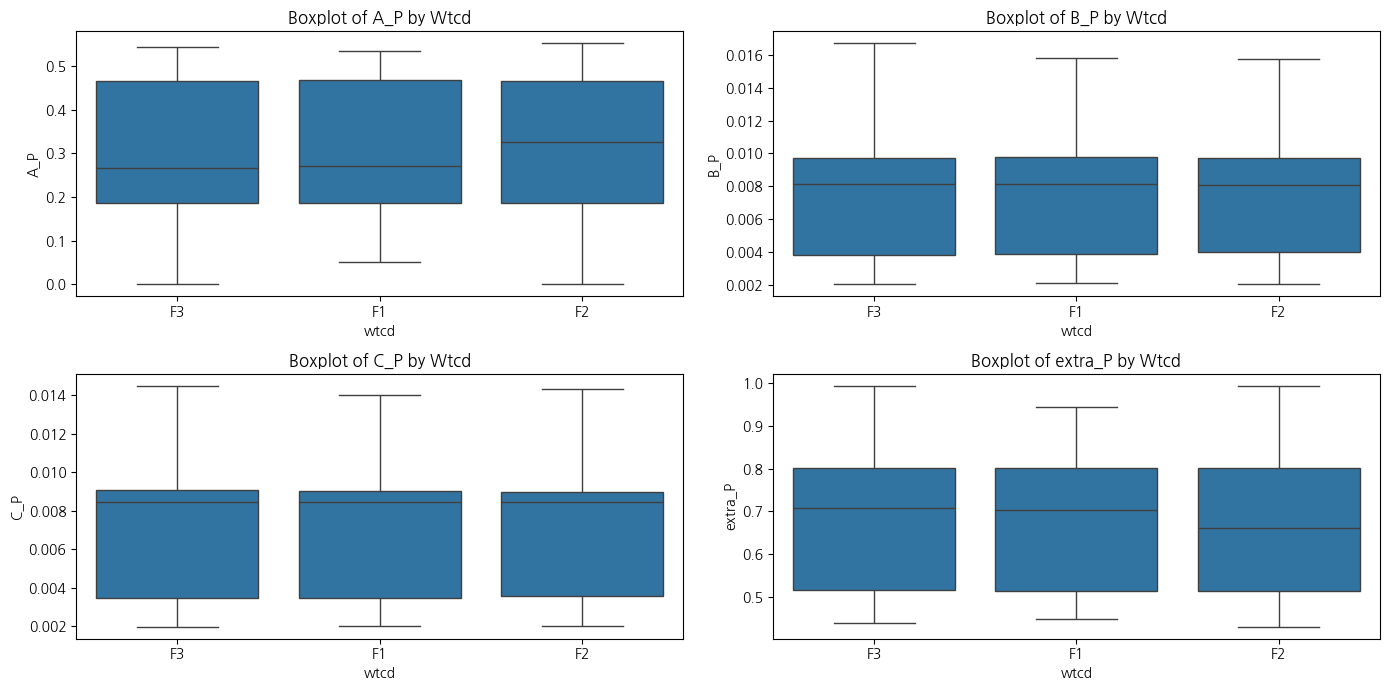

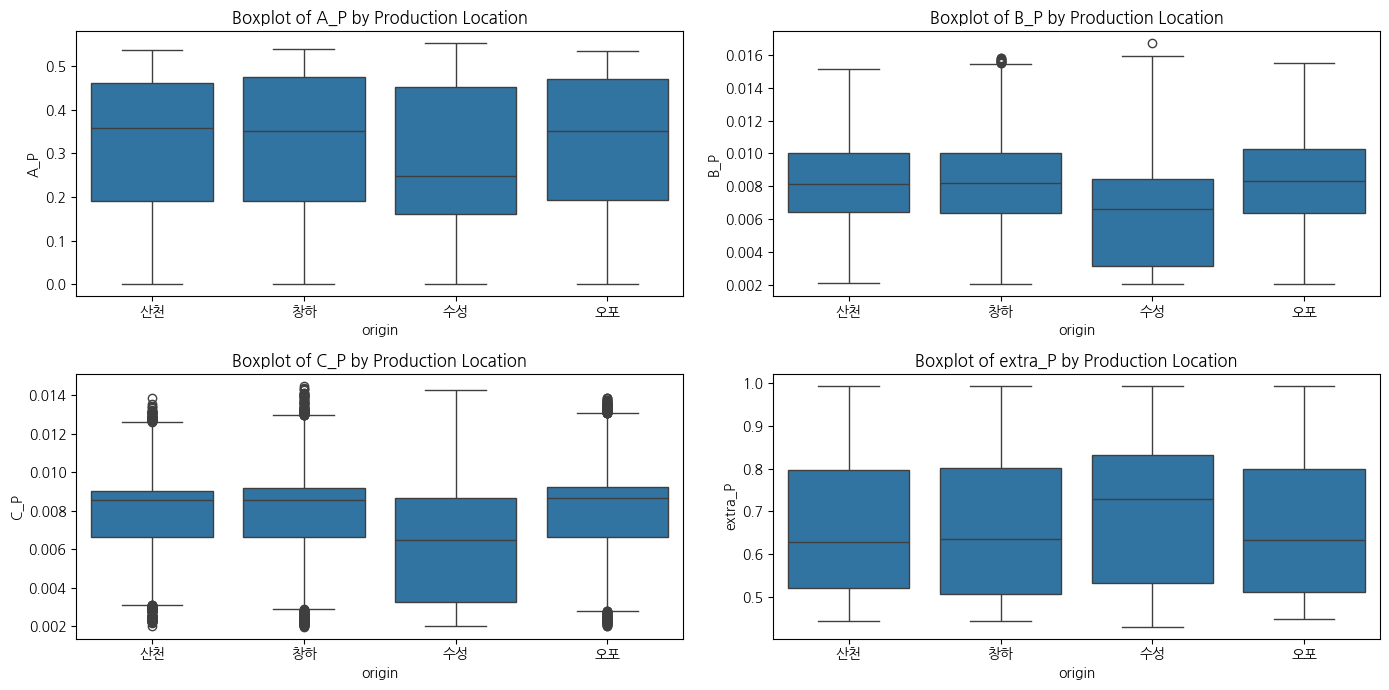

In [45]:
ingredients = ['A_P', 'B_P', 'C_P', 'extra_P']

# Boxplot of ingredient ratios by Wtcd
plt.figure(figsize=(14, 7))
for i, ingr in enumerate(ingredients):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='wtcd', y=ingr, data=df_eda)
    plt.title(f'Boxplot of {ingr} by Wtcd')
plt.tight_layout()
plt.show()

# Boxplot of ingredient ratios by Production Location
plt.figure(figsize=(14, 7))
for i, ingr in enumerate(ingredients):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='origin', y=ingr, data=df_eda)
    plt.title(f'Boxplot of {ingr} by Production Location')
plt.tight_layout()
plt.show()

### EDA : focus on 'duration'

##### Longer duration(buydate - date of inspection) for defected products

In [46]:
# Calculate the mean duration for each label (0 and 1)
mean_duration_by_label = df_eda.groupby('label')['duration'].mean()

# Display the result
print(mean_duration_by_label)

label
0    47.486441
1    61.386775
Name: duration, dtype: float64


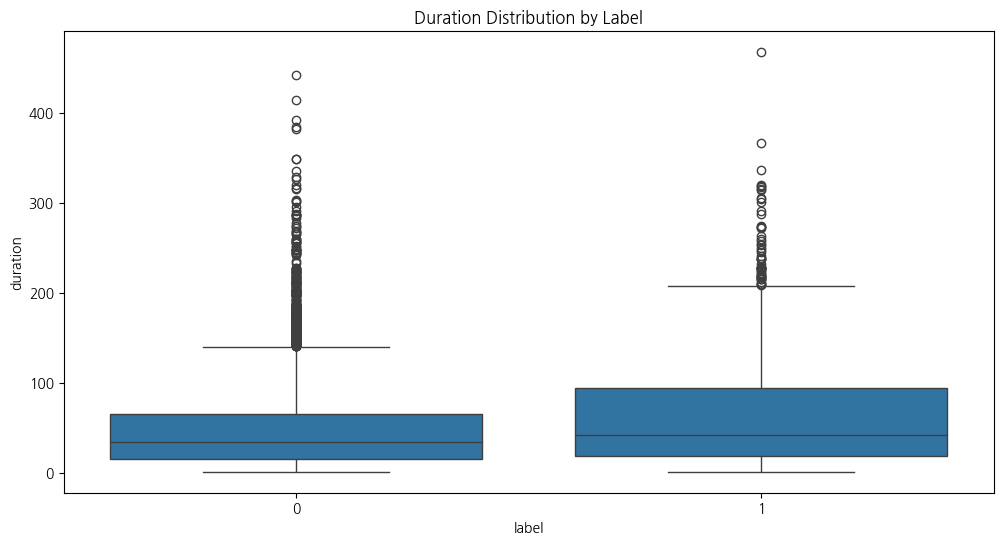

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='duration', data=df_eda)
plt.title('Duration Distribution by Label')
plt.show()

/var/folders/yg/y2p4dyr935vbz15z2bjm2m500000gn/T/ipykernel_46672/1827457526.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_label_counts = df_eda.groupby(duration_bins)['label'].agg(['sum', 'count'])


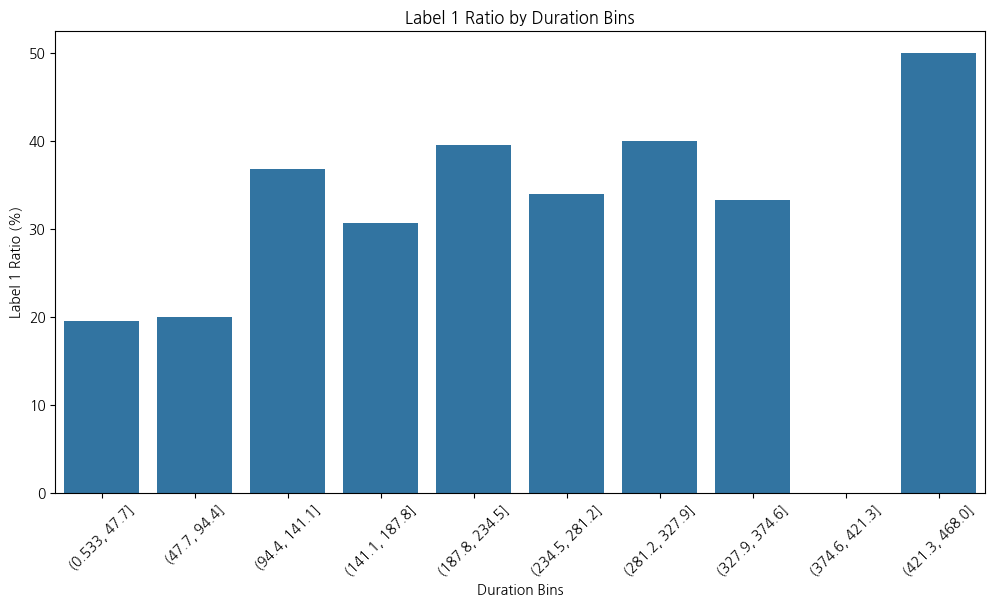

In [48]:
# Count and relative ratio of label 1 based on duration
duration_bins = pd.cut(df_eda['duration'], bins=10)
duration_label_counts = df_eda.groupby(duration_bins)['label'].agg(['sum', 'count'])
duration_label_counts['ratio'] = duration_label_counts['sum'] / duration_label_counts['count'] * 100

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=duration_label_counts.index, y='ratio', data=duration_label_counts)
plt.xticks(rotation=45)
plt.title('Label 1 Ratio by Duration Bins')
plt.xlabel('Duration Bins')
plt.ylabel('Label 1 Ratio (%)')
plt.show()


### EDA : focus on 'date_month'

In [49]:
# Total product count by month from the 'date_month' column
month_counts = df_eda['date_month'].value_counts().sort_index()
month_counts

date_month
4    3327
5    3246
6    3416
Name: count, dtype: int64

##### Big portion of defected products were inspected during June

In [50]:
# Defect product count by month from the 'date_month' column (label == 1)
defect_month_counts = df_eda[df_eda['label'] == 1]['date_month'].value_counts().sort_index()

# Display the result
print(defect_month_counts)

date_month
4     652
5     484
6    1072
Name: count, dtype: int64


##### The aspect of the total inspection was similar

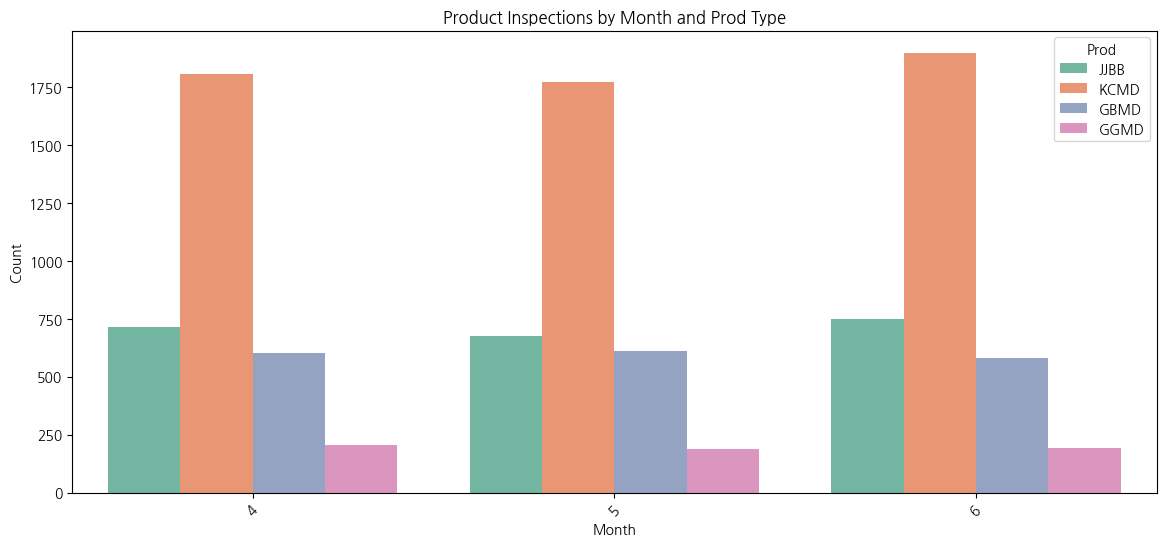

In [51]:
plt.figure(figsize=(14, 6))
sns.countplot(x='date_month', hue='prod', data=df_eda, palette='Set2')
plt.title('Product Inspections by Month and Prod Type')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Prod')
plt.xticks(rotation=45)
plt.show()

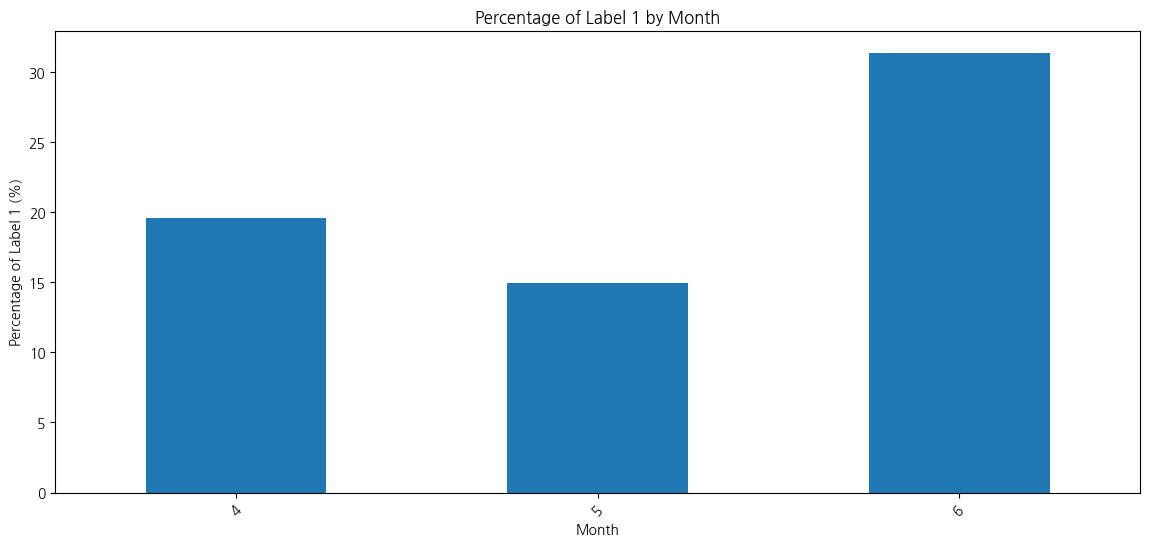

In [52]:
label_ratio_by_month = df_eda.groupby('date_month')['label'].mean() * 100

plt.figure(figsize=(14, 6))
label_ratio_by_month.plot(kind='bar')
plt.title('Percentage of Label 1 by Month')
plt.xlabel('Month')
plt.ylabel('Percentage of Label 1 (%)')
plt.xticks(rotation=45)
plt.show()

### EDA : focus on 'buydate_month'

##### The defective ratio keeps on increasing throughout the month

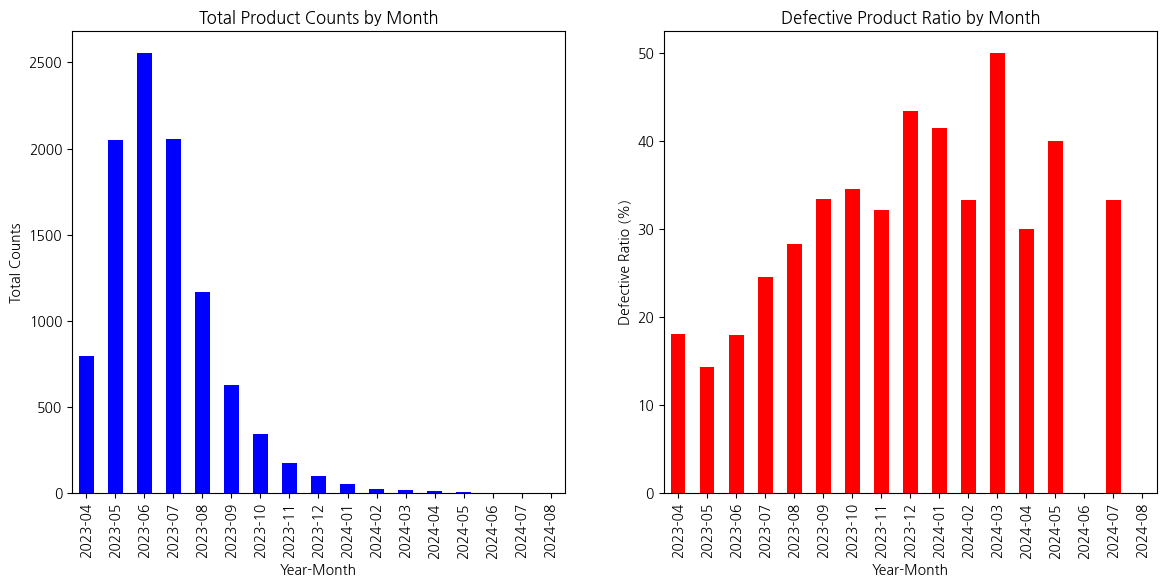

In [54]:
df_eda['year_month'] = pd.to_datetime(df_eda['buydate']).dt.to_period('M')

# Visualize the total product count and defective product (label=1) ratio by month
# Calculate total product count by month
total_counts_by_month = df_eda['year_month'].value_counts().sort_index()

# Calculate defective product count (label=1) by month
defective_counts_by_month = df_eda[df_eda['label'] == 1]['year_month'].value_counts().sort_index()

# Calculate defective product ratio by month
defective_ratio_by_month = defective_counts_by_month / total_counts_by_month * 100

# Visualization
plt.figure(figsize=(14, 6))

# Plot total product counts by month
plt.subplot(1, 2, 1)
total_counts_by_month.plot(kind='bar', color='blue')
plt.title('Total Product Counts by Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Counts')

# Plot defective product ratio by month
plt.subplot(1, 2, 2)
defective_ratio_by_month.plot(kind='bar', color='red')
plt.title('Defective Product Ratio by Month')
plt.xlabel('Year-Month')
plt.ylabel('Defective Ratio (%)')

plt.show()

##### Filter by purchase dates where defective ratio was on rise.
##### Revealed an increase in the frequency of defective items based on insepction dates

/var/folders/yg/y2p4dyr935vbz15z2bjm2m500000gn/T/ipykernel_46672/1165872937.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'])


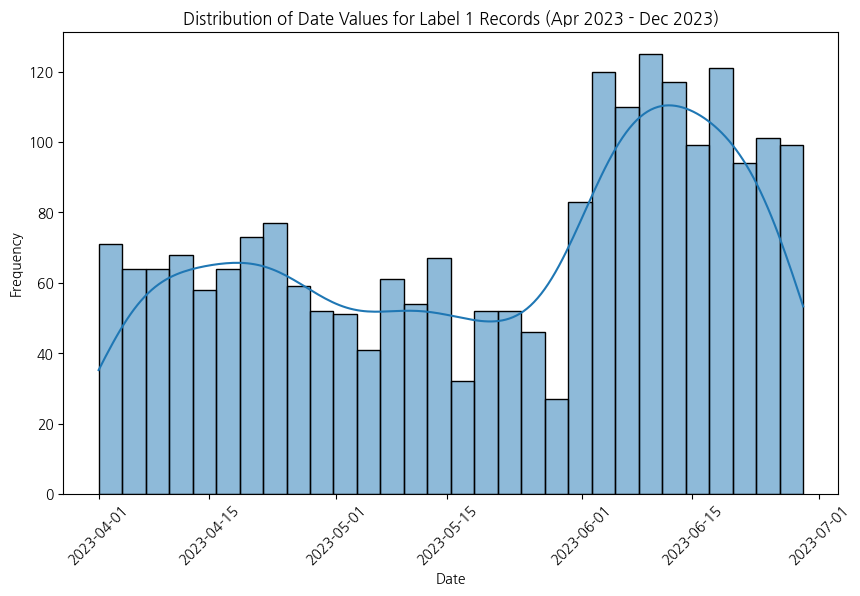

In [55]:
# Filter records based on the given conditions
filtered_data = df_eda[(df_eda['year_month'] >= '2023-04') &
                       (df_eda['year_month'] <= '2024-03') &
                       (df_eda['label'] == 1)]

# Convert the 'date' column to datetime format
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Visualize the distribution of 'date' values
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['date'], bins=30, kde=True)
plt.title('Distribution of Date Values for Label 1 Records (Apr 2023 - Dec 2023)')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### EDA : focus on 'buydate_season'

In [56]:
df_eda['buydate'] = pd.to_datetime(df_eda['buydate'])

# Create a new column combining season and year based on buydate
df_eda['buydate_season_year'] = df_eda['buydate'].dt.year.astype(str) + ' ' + \
                                df_eda['buydate'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                                                 'Spring' if x in [3, 4, 5] else
                                                                 'Summer' if x in [6, 7, 8] else
                                                                 'Fall' if x in [9, 10, 11] else
                                                                 'X')

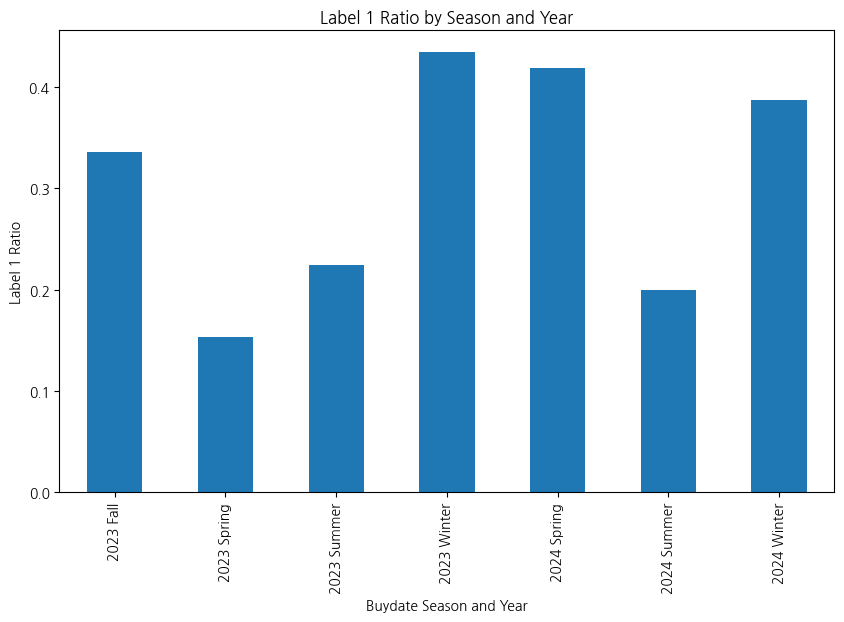

In [57]:
# Calculate and visualize the ratio of label 1 by season
label_season_ratio = df_eda[df_eda['label'] == 1].groupby('buydate_season_year').size() / \
                    df_eda.groupby('buydate_season_year').size()

plt.figure(figsize=(10, 6))
label_season_ratio.plot(kind='bar')
plt.title('Label 1 Ratio by Season and Year')
plt.xlabel('Buydate Season and Year')
plt.ylabel('Label 1 Ratio')
plt.show()


##### The inspection dates for products bought in specific season
- Can observe that as the season goes, the defection increases
- Also, as the season goes, most the inspections are done during the month of June.
- It is possible that we make assumption that the inspections done at June have very low accuracy

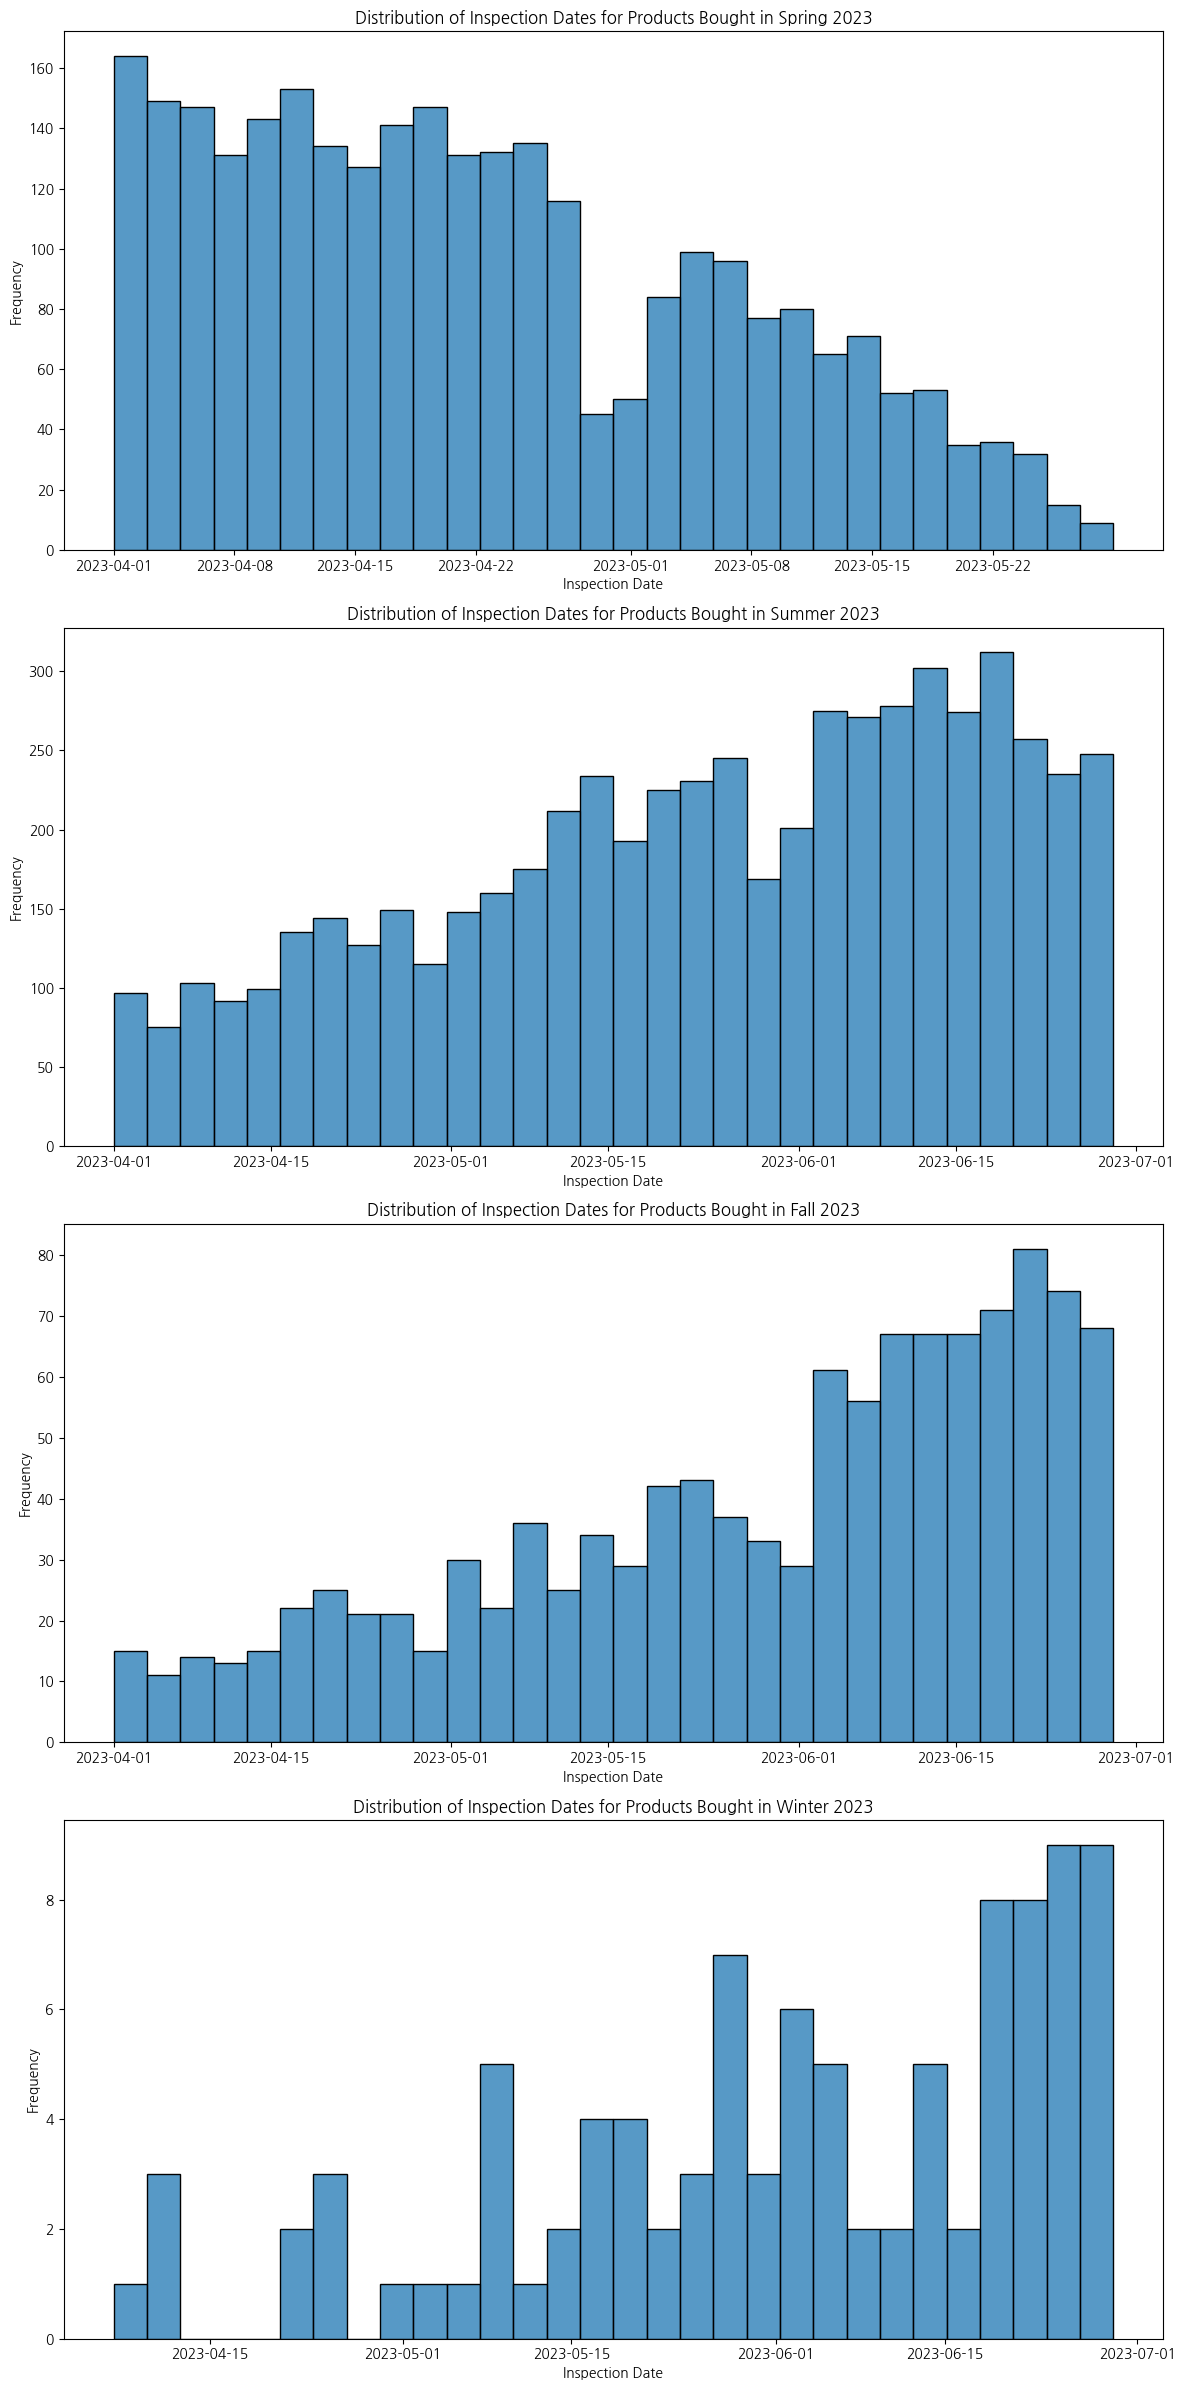

In [58]:
# Calculate and visualize the distribution of inspection dates (date) for products purchased in each season of 2023
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
fig, axes = plt.subplots(4, 1, figsize=(12, 24))

for i, season in enumerate(seasons):
    season_data = df_eda[df_eda['buydate_season_year'] == f'2023 {season}']
    sns.histplot(season_data['date'], bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of Inspection Dates for Products Bought in {season} 2023')
    axes[i].set_xlabel('Inspection Date')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

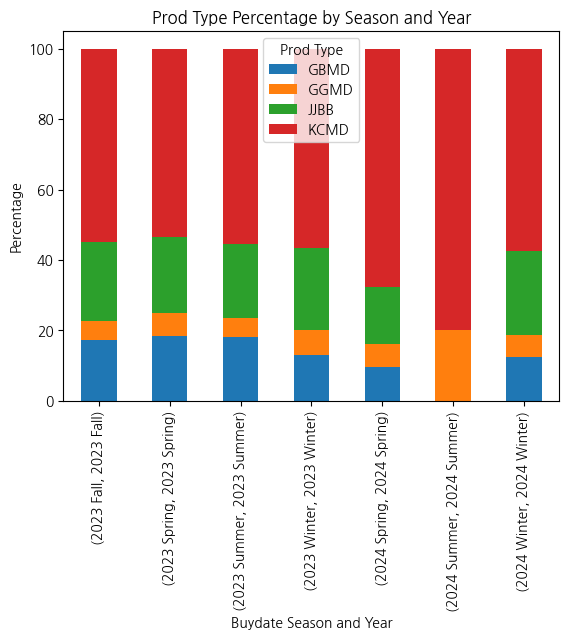

In [59]:
# Percentage of each product type by buydate_season_year
prod_season_ratio = df_eda.groupby(['buydate_season_year', 'prod']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

plt.figure(figsize=(10, 6))
prod_season_ratio.plot(kind='bar', stacked=True)
plt.title('Prod Type Percentage by Season and Year')
plt.xlabel('Buydate Season and Year')
plt.ylabel('Percentage')
plt.legend(title='Prod Type')
plt.show()

<Figure size 1000x600 with 0 Axes>

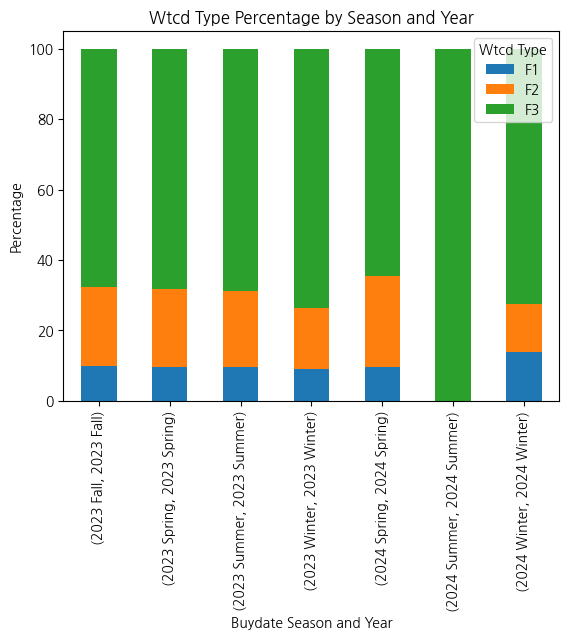

In [60]:
# Percentage of each wtcd type by buydate_season_year
wtcd_season_ratio = df_eda.groupby(['buydate_season_year', 'wtcd']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

plt.figure(figsize=(10, 6))
wtcd_season_ratio.plot(kind='bar', stacked=True)
plt.title('Wtcd Type Percentage by Season and Year')
plt.xlabel('Buydate Season and Year')
plt.ylabel('Percentage')
plt.legend(title='Wtcd Type')
plt.show()


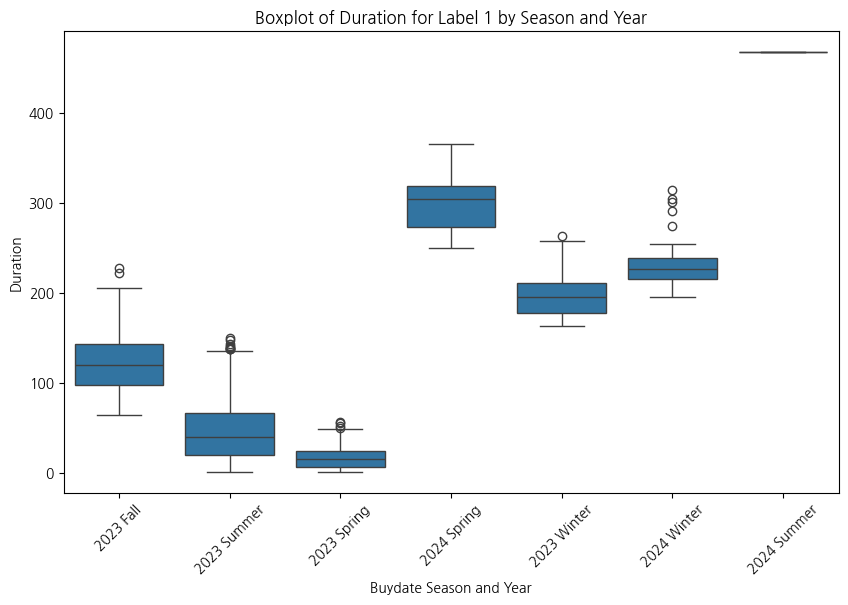

In [61]:
# Boxplot of duration for label 1 by buydate_season_year
plt.figure(figsize=(10, 6))
sns.boxplot(x='buydate_season_year', y='duration', data=df_eda[df_eda['label'] == 1])
plt.title('Boxplot of Duration for Label 1 by Season and Year')
plt.xlabel('Buydate Season and Year')
plt.ylabel('Duration')
plt.xticks(rotation=45)
plt.show()


In [62]:
df_eda['duration'].mean()

np.float64(50.559014916408046)

### EDA : focus on 'buydate_year'

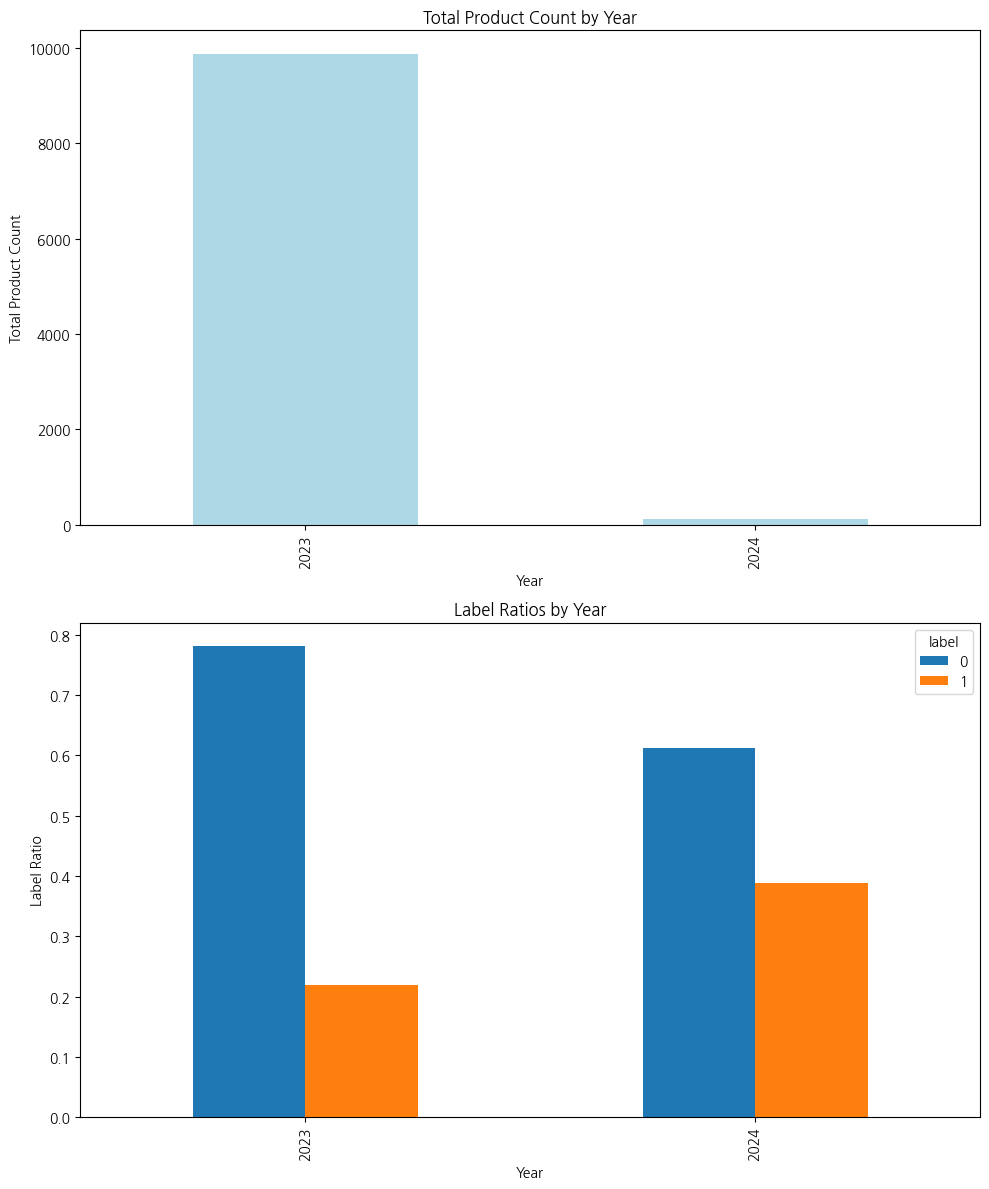

In [63]:
# Calculate the total product count and the ratio of label 0 and 1 for each year
yearly_counts = df_eda.groupby('buydate_year')['label'].value_counts().unstack(fill_value=0)
yearly_totals = yearly_counts.sum(axis=1)
yearly_ratios = yearly_counts.div(yearly_totals, axis=0)

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# First subplot - Total product count by year
yearly_totals.plot(kind='bar', ax=axes[0], color='lightblue')
axes[0].set_title('Total Product Count by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Product Count')

# Second subplot - Label 0 and 1 ratios by year
yearly_ratios.plot(kind='bar', ax=axes[1])
axes[1].set_title('Label Ratios by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Label Ratio')

plt.tight_layout()
plt.show()

##### Assumed that for each year, the mean of duration would be higher in defective products
- For 2023 it was, but for 2024 it was quite opposite

In [64]:
# Calculate the mean duration for each buydate_year based on label (defective and non-defective)
duration_means_defect = df_eda[df_eda['label'] == 1].groupby('buydate_year')['duration'].mean()
duration_means_nondefect = df_eda[df_eda['label'] == 0].groupby('buydate_year')['duration'].mean()

# Print the results
print('Defective products:', duration_means_defect)
print('Non-defective products:', duration_means_nondefect)

Defective products: buydate_year
2023     57.285714
2024    258.511111
Name: duration, dtype: float64
Non-defective products: buydate_year
2023     45.426719
2024    271.154930
Name: duration, dtype: float64


##### Most of the products bought in 2024 were insepcted in June

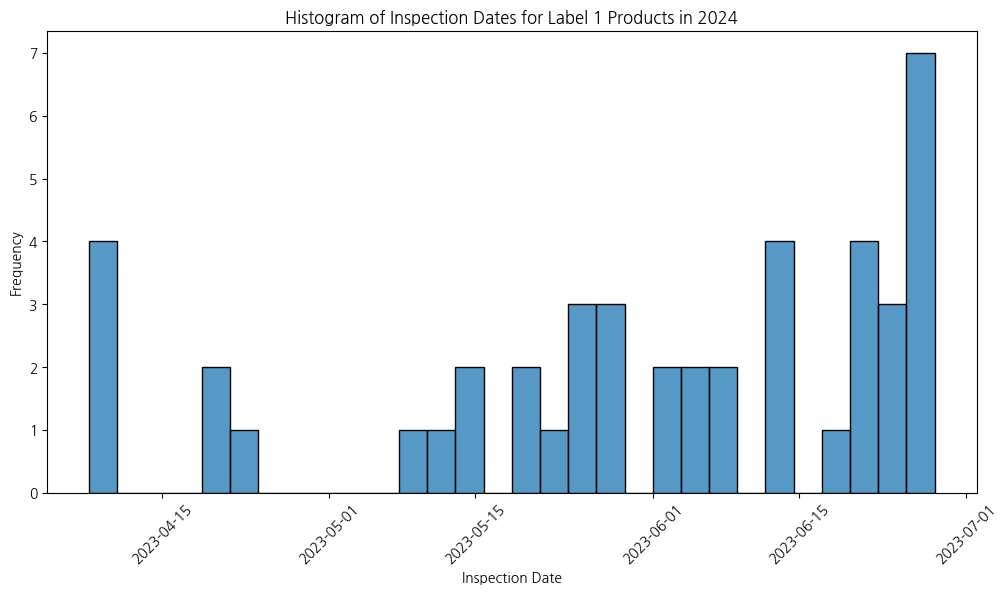

In [65]:
# Filter data for the year 2024 and label 1
df_2024_label1 = df_eda[(df_eda['buydate_year'] == 2024) & (df_eda['label'] == 1)]

# Plot a histogram for the 'date' column of the filtered data
plt.figure(figsize=(12, 6))
sns.histplot(df_2024_label1['date'], bins=30)
plt.title('Histogram of Inspection Dates for Label 1 Products in 2024')
plt.xlabel('Inspection Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

##### Percentage of inspections by inspector K, L has changed significantly over the year

##### The percentage of the product types has also changed over the year especially GBMD and KCMD

In [66]:
# Calculate the percentage of each product type by buydate_year
prod_ratios_by_year = df_eda.groupby(['buydate_year', 'prod']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

# Calculate the percentage of inspections by inspector (insp) for each buydate_year
insp_ratios_by_year = df_eda.groupby(['buydate_year', 'insp']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

print('Percentage of Prod Types by Year:')
print(prod_ratios_by_year)
print('\nPercentage of Inspections by Inspector (Insp) by Year:')
print(insp_ratios_by_year)


Percentage of Prod Types by Year:
prod                            GBMD      GGMD       JJBB       KCMD
buydate_year buydate_year                                           
2023         2023          18.018839  5.854350  21.401803  54.725008
2024         2024          11.206897  6.896552  20.689655  61.206897

Percentage of Inspections by Inspector (Insp) by Year:
insp                               C          K          L         P  \
buydate_year buydate_year                                              
2023         2023          24.946825  24.491036  30.193457  4.993416   
2024         2024          24.137931  18.965517  34.482759  5.172414   

insp                               Y  
buydate_year buydate_year             
2023         2023          15.375266  
2024         2024          17.241379  


### Finalize EDA

In [67]:
df_eda.columns

Index(['prod', 'insp', 'date', 'buydate', 'ingr_A', 'ingr_B', 'ingr_C', 'wtcd',
       'gram', 'origin', 'label', 'A_P', 'B_P', 'C_P', 'ingr_extra', 'extra_P',
       'duration', 'date_month', 'buydate_month', 'buydate_season',
       'buydate_year', 'bin', 'year_month', 'buydate_season_year'],
      dtype='object')

In [68]:
len(df_eda.columns)

24

In [69]:
df_eda.head()

prod insp       date    buydate    ingr_A  ingr_B  ingr_C wtcd     gram  \
0  GBMD    C 2023-06-18 2023-09-18  399.4063  6.4035  6.9409   F3   970.32   
1  GGMD    L 2023-05-18 2023-07-08  130.0951  5.8245  6.2857   F1  2490.08   
2  KCMD    C 2023-05-05 2023-07-02  131.5192  5.8040  6.0607   F3   487.37   
3  GBMD    K 2023-05-05 2023-06-04  128.5978  6.8720  6.1705   F3   707.94   
4  JJBB    K 2023-04-09 2023-04-14  320.6915  5.7474  6.3695   F3  1978.66   

  origin  ...  ingr_extra   extra_P  duration  date_month  buydate_month  \
0     산천  ...    557.5693  0.574624        92           6              9   
1     창하  ...   2347.8747  0.942891        51           5              7   
2     창하  ...    343.9861  0.705801        58           5              7   
3     산천  ...    566.2997  0.799926        30           5              6   
4     수성  ...   1645.8516  0.831801         5           4              4   

   buydate_season  buydate_year             bin  year_month  \
0            Fall          2023  (0.543, 0.599]     2023-09   
1          Summer          2023  (0.937, 0.994]     2023-07   
2          Summer          2023  (0.655, 0.712]     2023-07   
3          Summer          2023  (0.768, 0.825]     2023-06   
4          Spring          2023  (0.825, 0.881]     2023-04   

  buydate_season_year  
0           2023 Fall  
1         2023 Summer  
2         2023 Summer  
3         2023 Summer  
4         2023 Spring  

[5 rows x 24 columns]

##### Feature extraction for Training dataset

In [70]:
df = df_eda.copy()

In [71]:
selected_columns_train_1 = ['prod', 'insp', 'wtcd', 'origin', 'ingr_C', 'ingr_extra', 'A_P', 'extra_P', 'duration', 'date_month', 'label']

In [73]:
train_df_1 = df[selected_columns_train_1]

In [76]:
len(train_df_1.columns)

11

In [82]:
train_df_1.head()

prod insp wtcd origin  ingr_C  ingr_extra       A_P   extra_P  duration  \
0  GBMD    C   F3     산천  6.9409    557.5693  0.411623  0.574624        92   
1  GGMD    L   F1     창하  6.2857   2347.8747  0.052245  0.942891        51   
2  KCMD    C   F3     창하  6.0607    343.9861  0.269855  0.705801        58   
3  GBMD    K   F3     산천  6.1705    566.2997  0.181651  0.799926        30   
4  JJBB    K   F3     수성  6.3695   1645.8516  0.162075  0.831801         5   

   date_month  label  
0           6      1  
1           5      0  
2           5      0  
3           5      1  
4           4      0

##### Save it as a csv file to train it

In [84]:
train_df_1.to_csv('train_data_1.csv', encoding = 'utf-8', index = False)